In [1]:
%load_ext memory_profiler
import numpy as np
import os
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import h5py
from scipy import integrate
import pandas as pd
import random
from scipy.signal import find_peaks
import qetpy as qp
# import sys
# sys.path.append("./")
from functions import *

In [2]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9

templateEM_Tl,  TemplateEM_Tl = create_template(np.load(r'templates/Tl_template_pulses.npy'))
templateHAD_Tl,  TemplateHAD_Tl = create_template(np.load(r'templates/Tl_template_pulses_neutron.npy'))

templateEM_p,  TemplateEM_p = create_template(np.load(r'templates/pure_template_pulses.npy'))
templateHAD_p,  TemplateHAD_p = create_template(np.load(r'templates/pure_template_pulses_neutron.npy'))

fs =1/2e-9
# energy in [ADC] / energyfactor = energy in [MeV]
'''energyfactor_pure 6243
energyfactor_Tl 118252

longtime_pure 250
shorttime_pure 24

longtime_Tl 11000
shorttime_Tl 600'''
def Ecalibration (amp, ctype):
    if ctype == 'Tl':
        return amp/118252
    if ctype == 'pure':
        return amp/6243



/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
len_all_identifiers = 1159
len_identifiers_15min_beamOFF = 89
len_identifiers_15min_beamON = 1046
len_identifiers_2hours_beamOFF = 6
len_identifiers_2hours_beamON =18
len_all_identifiers_cosmics = 20

In [4]:
     
        
class variables():
    def var(self, File, ctype, examine):
        file = h5py.File(File)

        deltachi2 = file['Delta_chi2'][:]
        chi2_EM = file['chi2_withdelay_EM'][:]
        amppil_EM = file['amp_pileup_EM'][:]
        self.t0pil_EM = file['t0_pileup_EM'][:]
        chi2pil_EM = file['chi2_pileup_EM'][:]
        chi2_Had = file['chi2_withdelay_Had'][:]
        amppil_Had = file['amp_pileup_Had'][:]
        self.t0pil_Had = file['t0_pileup_Had'][:]
        chi2pil_Had = file['chi2_pileup_Had'][:]
        self.deltachi2 = file ['Delta_chi2'][:]

        gli= np.where(file['glitch'][:]==True)[0]
        clip= np.where(file['clipped'][:]==True)[0]
        pileup= np.where(file['pileup'][:]==True)[0]
        noisy= np.where(file['noisypulse'][:]==True)[0]
        self.select = np.unique(np.concatenate((gli,clip,pileup,noisy),0))
        if examine: 
            self.amp_EM_PS_removed = np.take(file ['amp_withdelay_EM'][:],self.select)
            self.t0_EM_PS_removed = np.take(file ['t0_withdelay_EM'][:],self.select)
        #     self.chi2_EM_PS_removed = np.take(file ['chi2_withdelay_EM'][:],self.select)
            self.amppil_EM_PS_removed = np.take(file['amp_pileup_EM'][:], self.select)
            self.t0pil_EM_PS_removed = np.take(file['t0_pileup_EM'][:], self.select)
        #     self.chi2pil_EM_PS_removed = np.take(file['chi2_pileup_EM'][:], self.select)    
            self.amp_Had_PS_removed = np.take(file ['amp_withdelay_Had'][:],self.select)
            self.t0_Had_PS_removed = np.take(file ['t0_withdelay_Had'][:],self.select)
            self.chi2_Had_PS_removed = np.take(file ['chi2_withdelay_Had'][:],self.select)
            self.amppil_Had_PS_removed = np.take(file['amp_pileup_Had'][:], self.select)
            self.t0pil_Had_PS_removed = np.take(file['t0_pileup_Had'][:], self.select)
            self.chi2pil_Had_PS_removed = np.take(file['chi2_pileup_Had'][:], self.select)
            self.integrated_raw_PS_removed = np.take(np.array(file ['integrated_raw_amp']), self.select)
            self.Energy_MK_PS_removed = np.take(np.array(file ['Energy_MK']), self.select)    
            self.deltachi2_PS_removed = np.take(np.array(file ['Delta_chi2']), self.select)
            self.CR_PS_removed = np.take(np.array(file ['charge_ratio']), self.select)
            self.CR100_PS_removed = np.take(np.array(file ['charge_ratio100']), self.select)
            self.rundata_PS_removed = np.take(file['rundata'][:],self.select)
            self.waveform_number_PS_removed = np.take(file['waveform_number'][:],self.select)
            self.data_min_PS_removed = np.take(file['data_amp_min'][:],self.select)

        self.amp_EM_PS = np.delete(file ['amp_withdelay_EM'][:],self.select)
        self.t0_EM_PS = np.delete(file ['t0_withdelay_EM'][:],self.select)
        self.chi2_EM_PS = np.delete(file ['chi2_withdelay_EM'][:],self.select)
        self.amppil_EM_PS = np.delete(file['amp_pileup_EM'][:], self.select)
        self.t0pil_EM_PS = np.delete(file['t0_pileup_EM'][:], self.select)
        self.chi2pil_EM_PS = np.delete(file['chi2_pileup_EM'][:], self.select)    
        self.amp_Had_PS = np.delete(file ['amp_withdelay_Had'][:],self.select)
        self.t0_Had_PS = np.delete(file ['t0_withdelay_Had'][:],self.select)
        self.chi2_Had_PS = np.delete(file ['chi2_withdelay_Had'][:],self.select)
        self.amppil_Had_PS = np.delete(file['amp_pileup_Had'][:], self.select)
        self.t0pil_Had_PS = np.delete(file['t0_pileup_Had'][:], self.select)
        self.chi2pil_Had_PS = np.delete(file['chi2_pileup_Had'][:], self.select)
        self.integrated_raw_PS = np.delete(np.array(file ['integrated_raw_amp']), self.select)    
        self.Energy_MK_PS = np.delete(np.array(file ['Energy_MK']), self.select)   
        self.Energy_MK_500_PS = np.delete(np.array(file ['energy500_SK_pure']), self.select) 
        self.deltachi2_PS = np.delete(np.array(file ['Delta_chi2']), self.select)
        self.CR_PS = np.delete(np.array(file ['charge_ratio']), self.select)
        self.CR100_PS = np.delete(np.array(file ['charge_ratio100']), self.select)
        self.rundata_PS = np.delete(file['rundata'][:],self.select)
        self.waveform_number_PS = np.delete(file['waveform_number'][:],self.select)
        self.data_min_PS = np.delete(file['data_amp_min'][:],self.select)

        if ctype == 'Tl' :            
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i] )>1000 and abs(self.t0pil_EM[i]*fs )>100 ) or (abs(amppil_EM[i] )>200 and abs(self.t0pil_EM[i]*fs )>1800 )]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>700 and abs(self.t0pil_Had[i]*fs )>700 ) or (abs(amppil_Had[i] )>200 and abs(self.t0pil_Had[i]*fs )>1800 )]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and abs(amppil_EM[i] )>20 and self.t0pil_EM[i]*fs <0]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and abs(amppil_Had[i] )>20 and self.t0pil_Had[i]*fs <0]
            select8 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (chi2pil_EM[i] > 3.5e7 or chi2_EM[i]/15000>3000) ]
            select9 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (chi2pil_Had[i] > 3.5e7 or chi2_Had[i]/15000>3000) ]
            self.select_FT = list(set(list(self.select)+ select2+select3+select8+select9+ select6+select7))

        if ctype == 'pure':
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (amppil_EM[i] > 150 and  abs(self.t0pil_EM[i]*fs) > 180)]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (amppil_Had[i] > 150 and abs(self.t0pil_Had[i]*fs) > 180)]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and ((amppil_EM[i] >30 and self.t0pil_EM[i]*fs <-20) or (amppil_EM[i] >50 and self.t0pil_EM[i]*fs <-10))]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and ((amppil_Had[i] >30 and self.t0pil_Had[i]*fs <-20) or (amppil_Had[i] >50 and self.t0pil_Had[i]*fs <-10))]
            self.select_FT = list(set(list(self.select)+ select2+select3+ select6+select7))

        if examine: 
            self.amp_EM_PS_FT_removed = np.take(file ['amp_withdelay_EM'][:],self.select_FT)
            self.t0_EM_PS_FT_removed = np.take(file ['t0_withdelay_EM'][:],self.select_FT)
            self.chi2_EM_PS_FT_removed = np.take(file ['chi2_withdelay_EM'][:],self.select_FT)
            self.amppil_EM_PS_FT_removed = np.take(file['amp_pileup_EM'][:], self.select_FT)
            self.t0pil_EM_PS_FT_removed = np.take(file['t0_pileup_EM'][:], self.select_FT)
            self.chi2pil_EM_PS_FT_removed = np.take(file['chi2_pileup_EM'][:], self.select_FT)    
            self.amp_Had_PS_FT_removed = np.take(file ['amp_withdelay_Had'][:],self.select_FT)
            self.t0_Had_PS_FT_removed = np.take(file ['t0_withdelay_Had'][:],self.select_FT)
            self.chi2_Had_PS_FT_removed = np.take(file ['chi2_withdelay_Had'][:],self.select_FT)
            self.amppil_Had_PS_FT_removed = np.take(file['amp_pileup_Had'][:], self.select_FT)
            self.t0pil_Had_PS_FT_removed = np.take(file['t0_pileup_Had'][:], self.select_FT)
            self.chi2pil_Had_PS_FT_removed = np.take(file['chi2_pileup_Had'][:], self.select_FT)
            self.integrated_raw_PS_FT_removed = np.take(np.array(file ['integrated_raw_amp']), self.select_FT)
            self.Energy_MK_PS_FT_removed = np.take(np.array(file ['Energy_MK']), self.select_FT)    
            self.deltachi2_PS_FT_removed = np.take(np.array(file ['Delta_chi2']), self.select_FT)
            self.CR_PS_FT_removed = np.take(np.array(file ['charge_ratio']), self.select_FT)
            self.CR100_PS_FT_removed = np.take(np.array(file ['charge_ratio100']), self.select_FT)
            self.rundata_PS_FT_removed = np.take(file['rundata'][:],self.select_FT)
            self.waveform_number_PS_FT_removed = np.take(file['waveform_number'][:],self.select_FT)
            self.data_min_PS_FT_removed = np.take(file['data_amp_min'][:],self.select_FT)

        self.amp_EM_PS_FT = np.delete(file ['amp_withdelay_EM'][:],self.select_FT)
        self.t0_EM_PS_FT = np.delete(file ['t0_withdelay_EM'][:],self.select_FT)
        self.chi2_EM_PS_FT = np.delete(file ['chi2_withdelay_EM'][:],self.select_FT)
        self.amppil_EM_PS_FT = np.delete(file['amp_pileup_EM'][:], self.select_FT)
        self.t0pil_EM_PS_FT = np.delete(file['t0_pileup_EM'][:], self.select_FT)
        self.chi2pil_EM_PS_FT = np.delete(file['chi2_pileup_EM'][:], self.select_FT)    
        self.amp_Had_PS_FT = np.delete(file ['amp_withdelay_Had'][:],self.select_FT)
        self.t0_Had_PS_FT = np.delete(file ['t0_withdelay_Had'][:],self.select_FT)
        self.chi2_Had_PS_FT = np.delete(file ['chi2_withdelay_Had'][:],self.select_FT)
        self.amppil_Had_PS_FT = np.delete(file['amp_pileup_Had'][:], self.select_FT)
        self.t0pil_Had_PS_FT = np.delete(file['t0_pileup_Had'][:], self.select_FT)
        self.chi2pil_Had_PS_FT = np.delete(file['chi2_pileup_Had'][:], self.select_FT)
        self.integrated_raw_PS_FT = np.delete(np.array(file ['integrated_raw_amp']), self.select_FT)  
        self.Energy_MK_PS_FT = np.delete(np.array(file ['Energy_MK']), self.select_FT)     
        self.Energy_MK_500_PS_FT = np.delete(np.array(file ['energy500_SK_pure']), self.select_FT)    
        self.deltachi2_PS_FT = np.delete(np.array(file ['Delta_chi2']), self.select_FT)
        self.CR_PS_FT = np.delete(np.array(file ['charge_ratio']), self.select_FT)
        self.CR100_PS_FT = np.delete(np.array(file ['charge_ratio100']), self.select_FT)
        self.rundata_PS_FT = np.delete(file['rundata'][:],self.select_FT)
        self.waveform_number_PS_FT = np.delete(file['waveform_number'][:],self.select_FT)
        self.data_min_PS_FT = np.delete(file['data_amp_min'][:],self.select_FT)

        select2 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and  (self.amppil_EM_PS[i] > 150 and  abs(self.t0pil_EM_PS[i]*fs) > 180)]
        select3 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and (self.amppil_Had_PS[i]  > 150 and abs(self.t0pil_Had_PS[i]*fs) > 180)]
        select6 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and ((self.amppil_EM_PS[i] >30 and self.t0pil_EM_PS[i]*fs <-20) or (self.amppil_EM_PS[i] >50 and self.t0pil_EM_PS[i]*fs <-10))]
        select7 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and ((self.amppil_Had_PS[i] >30 and self.t0pil_Had_PS[i]*fs <-20) or (self.amppil_Had_PS[i] >50 and self.t0pil_Had_PS[i]*fs <-10))]
        self.select_FTonly = list(set(select2+select3+ select6+select7))
        print(len(select2), len(select3), len(select6), len(select7))
        print(len(list(set(select2+ select6))), len(list(set(select3+select7))))

        self.deltachi2_FT_removed = np.take(self.deltachi2_PS, self.select_FTonly)
        self.t0pil_Had_FT_removed = np.take(self.t0pil_Had_PS, self.select_FTonly)
        self.CR_FT_removed = np.take(self.CR_PS, self.select_FTonly)
        self.CR100_FT_removed = np.take(self.CR100_PS, self.select_FTonly)
        self.chi2pil_EM_FT_removed = np.take(self.chi2pil_EM_PS, self.select_FTonly)
        self.chi2_EM_FT_removed = np.take(self.chi2_EM_PS, self.select_FTonly)
        self.t0pil_EM_FT_removed = np.take(self.t0pil_EM_PS, self.select_FTonly)
        self.amppil_Had_FT_removed = np.take(self.amppil_Had_PS, self.select_FTonly)
        self.amppil_EM_FT_removed = np.take(self.amppil_EM_PS, self.select_FTonly)
        self.chi2pil_Had_FT_removed = np.take(self.chi2pil_Had_PS, self.select_FTonly)
        self.chi2_Had_FT_removed = np.take(self.chi2_Had_PS, self.select_FTonly)
        self.waveform_number_FT_removed = np.take(self.waveform_number_PS, self.select_FTonly)
        self.rundata_FT_removed = np.take(self.rundata_PS, self.select_FTonly)
        self.amp_Had_FT_removed = np.take(self.amp_Had_PS, self.select_FTonly)
        self.amp_EM_FT_removed = np.take(self.amp_EM_PS, self.select_FTonly)
        self.t0_Had_FT_removed = np.take(self.t0_Had_PS, self.select_FTonly)
        self.t0_EM_FT_removed = np.take(self.t0_EM_PS, self.select_FTonly)
        self.Energy_MK_500_FT_removed = np.take(self.Energy_MK_500_PS, self.select_FTonly)
        self.CR100_FT_removed = np.take(self.CR100_PS, self.select_FTonly)

In [14]:
%%time
file = 'saved_outputs/pure_XFEL_beamON_XFELte.hdf5'
pure =variables()
pure.var(File = file, ctype = 'pure', examine = True)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6619 15583 12832 10789
16530 19273
CPU times: user 5.03 s, sys: 371 ms, total: 5.4 s
Wall time: 5.72 s


In [6]:
print('all', 7163151)
print(len(pure.select) )
print(len(pure.select_FT) )
print(len(pure.select_FTonly) )
print(len(pure.amp_EM_PS_FT) )

all 7163151
1778996
2194594
415598
4968557


In [30]:
print('all', 7163151)
print(len(pure.select) )
print(len(pure.select_FT) )
print(len(pure.select_FTonly) )


all 7163151
1778996
2185183
406187
4977968


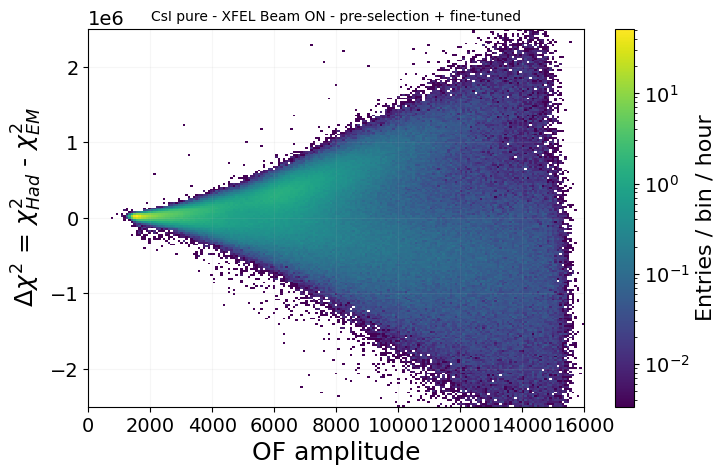

peak memory: 938.05 MiB, increment: 27.76 MiB


In [6]:
%%memit

plt.figure(figsize=(8, 5))
w = np.ones_like(pure.deltachi2_PS_FT)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(pure.amp_EM_PS_FT , pure.deltachi2_PS_FT ,bins=(np.linspace(0,16000,200),np.linspace(-0.25e7, 0.25e7, 200)), weights = w, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI pure - XFEL Beam ON - pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()

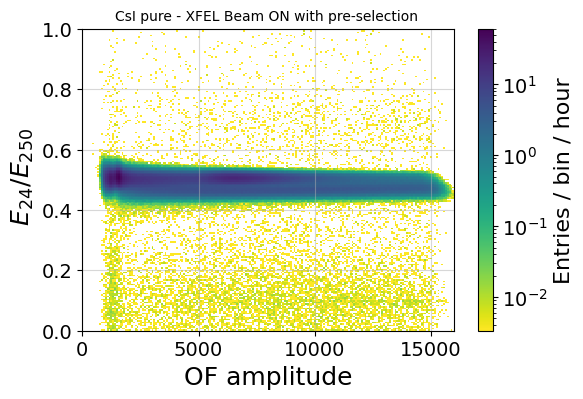

peak memory: 4601.46 MiB, increment: 153.27 MiB


In [14]:
%%memit
# plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR_PS)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(pure.amp_EM_PS , pure.CR_PS ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmap='viridis_r', weights =w, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()
'''
# plt.figure(figsize=(8, 5))
plt.hist2d(pure.amp_EM_PS_FT , pure.CR_PS_FT ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

# plt.figure(figsize=(8, 5))
plt.hist2d(pure.amp_EM_FT_removed , pure.CR_FT_removed ,bins=(np.linspace(0,16000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{24}/E_{250}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON - removed pileups ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()
'''

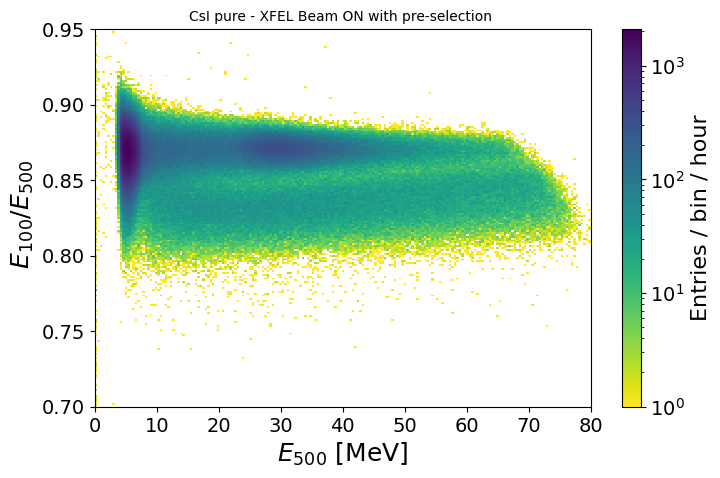

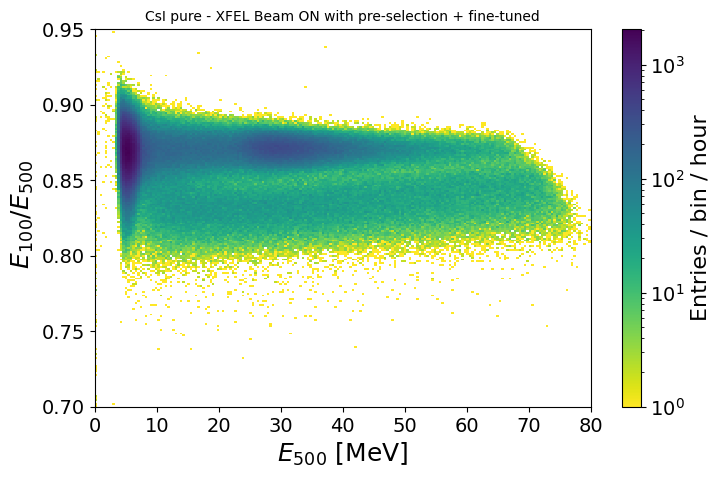

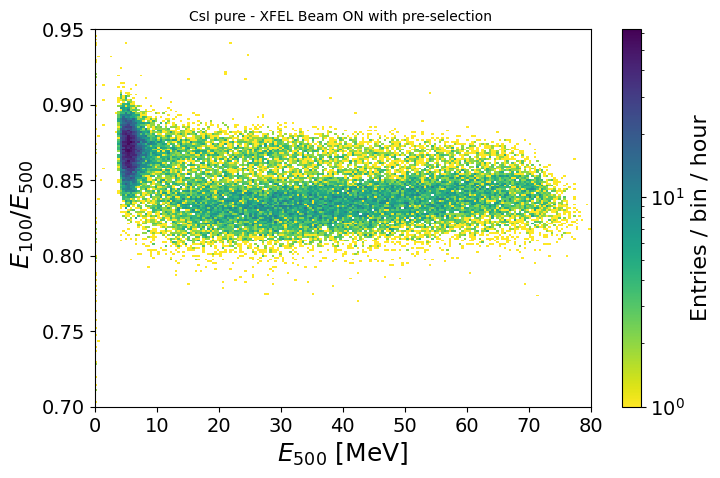

In [15]:


E_ = Ecalibration(pure.Energy_MK_500_PS, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR100_PS)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_ , pure.CR100_PS ,bins=(np.linspace(0,80,200), np.linspace(0.7,0.95,200)), cmap='viridis_r', cmin=1, norm=LogNorm())
plt.xlabel(r'$E_{500}$ [MeV]',fontsize=18)
plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()




E_ = Ecalibration(pure.Energy_MK_500_PS_FT, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR100_PS_FT)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_ , pure.CR100_PS_FT ,bins=(np.linspace(0,80,200), np.linspace(0.7,0.95,200)), cmap='viridis_r', cmin=1, norm=LogNorm())
plt.xlabel(r'$E_{500}$ [MeV]',fontsize=18)
plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()




E_ = Ecalibration(pure.Energy_MK_500_FT_removed, 'pure')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.CR100_FT_removed)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_ , pure.CR100_FT_removed ,bins=(np.linspace(0,80,200), np.linspace(0.7,0.95,200)), cmap='viridis_r', cmin=1, norm=LogNorm())
plt.xlabel(r'$E_{500}$ [MeV]',fontsize=18)
plt.ylabel(r' $E_{100}/E_{500}$',fontsize=18)
# plt.grid(alpha=0.5)
plt.title('CsI pure - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.show()


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


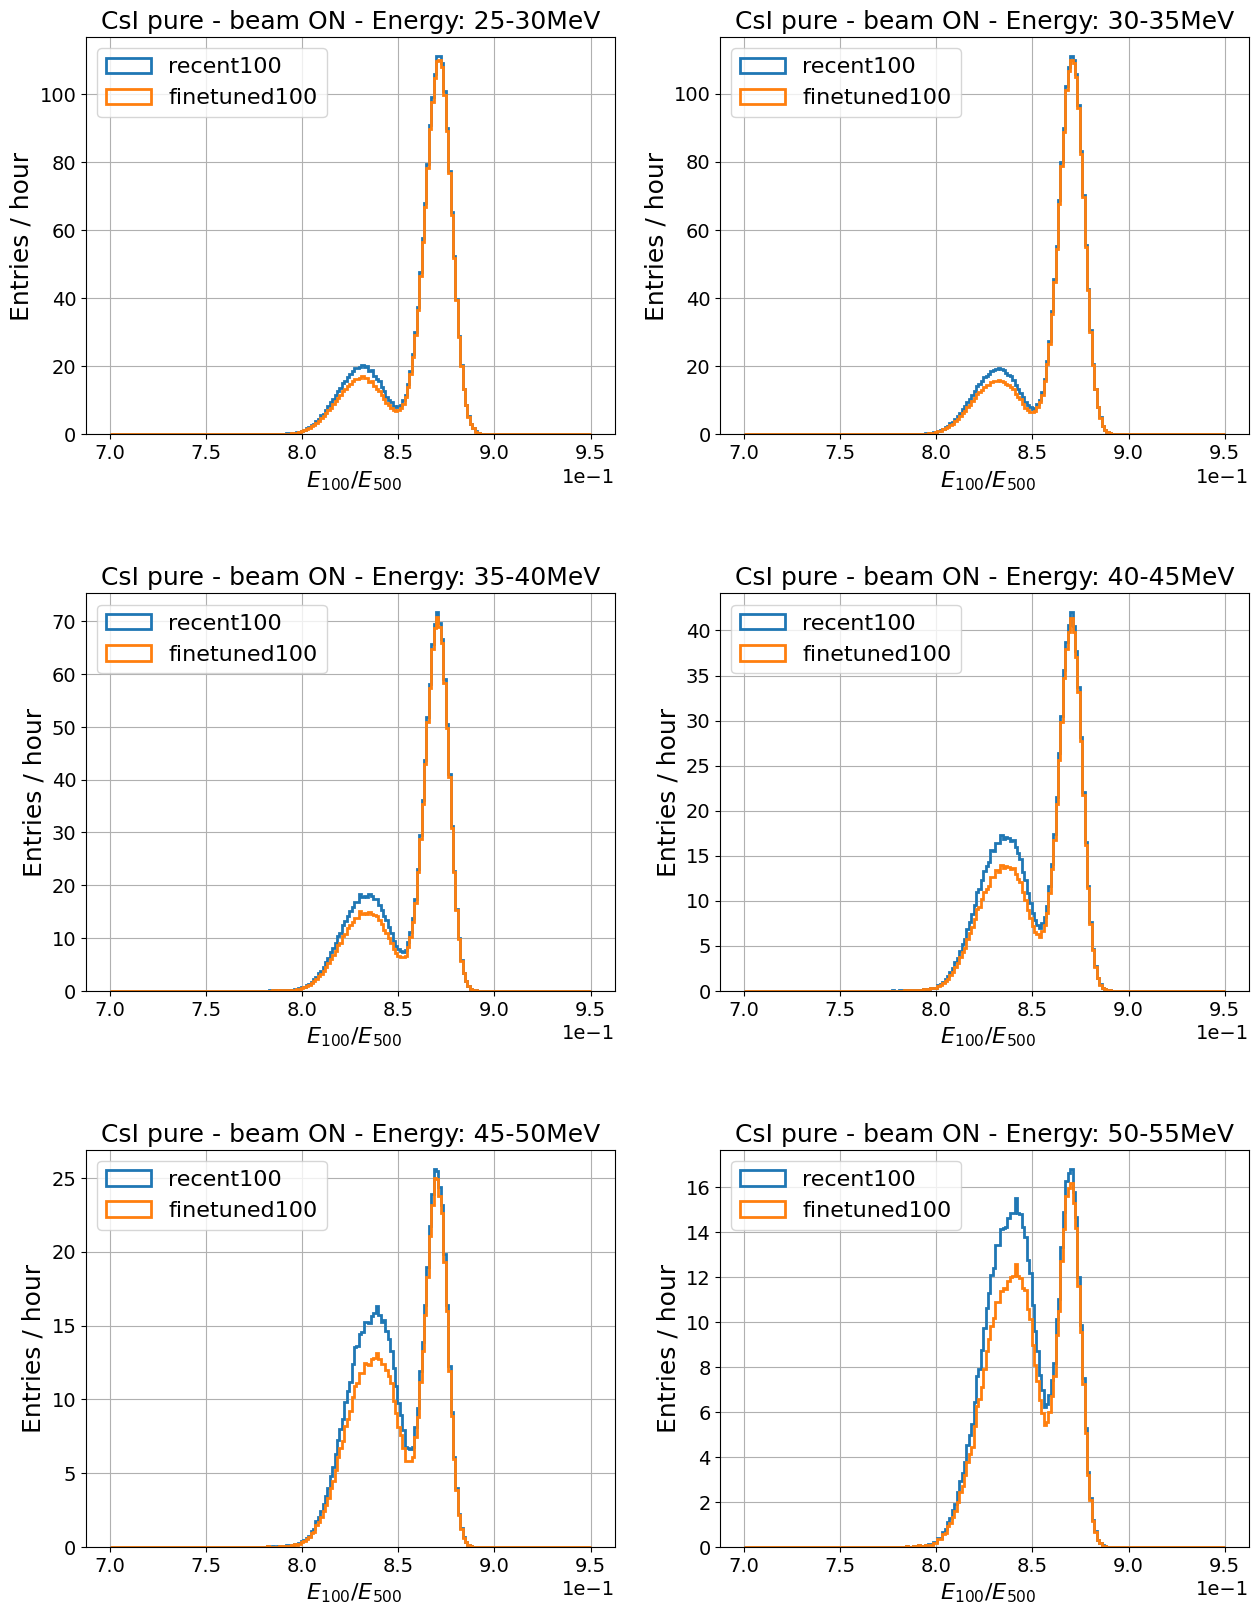

In [8]:

E_PS = Ecalibration(pure.Energy_MK_500_PS, 'pure')
E_PS_FT = Ecalibration(pure.Energy_MK_500_PS_FT, 'pure')

slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
for i, s in enumerate(slices):
    if i != 6:
        bins = np.linspace(0.7, 0.95,200)
        sl = [i for i, x in enumerate(E_PS)  if x>s and x<s+5]
        w = np.ones_like(np.take(pure.CR100_PS,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.CR100_PS,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'recent100')
        sl = [i for i, x in enumerate(E_PS_FT)  if x>s and x<s+5]
        w = np.ones_like(np.take(pure.CR100_PS_FT,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.CR100_PS_FT,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'finetuned100')
        ax[i].set_title('CsI pure - beam ON - Energy: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
        ax[i].set_xlabel(r' $E_{100}/E_{500}$')        
        ax[i].set_ylabel('Entries / hour',fontsize =18)
        ax[i].grid()
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[i].legend(loc = 'upper left')

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


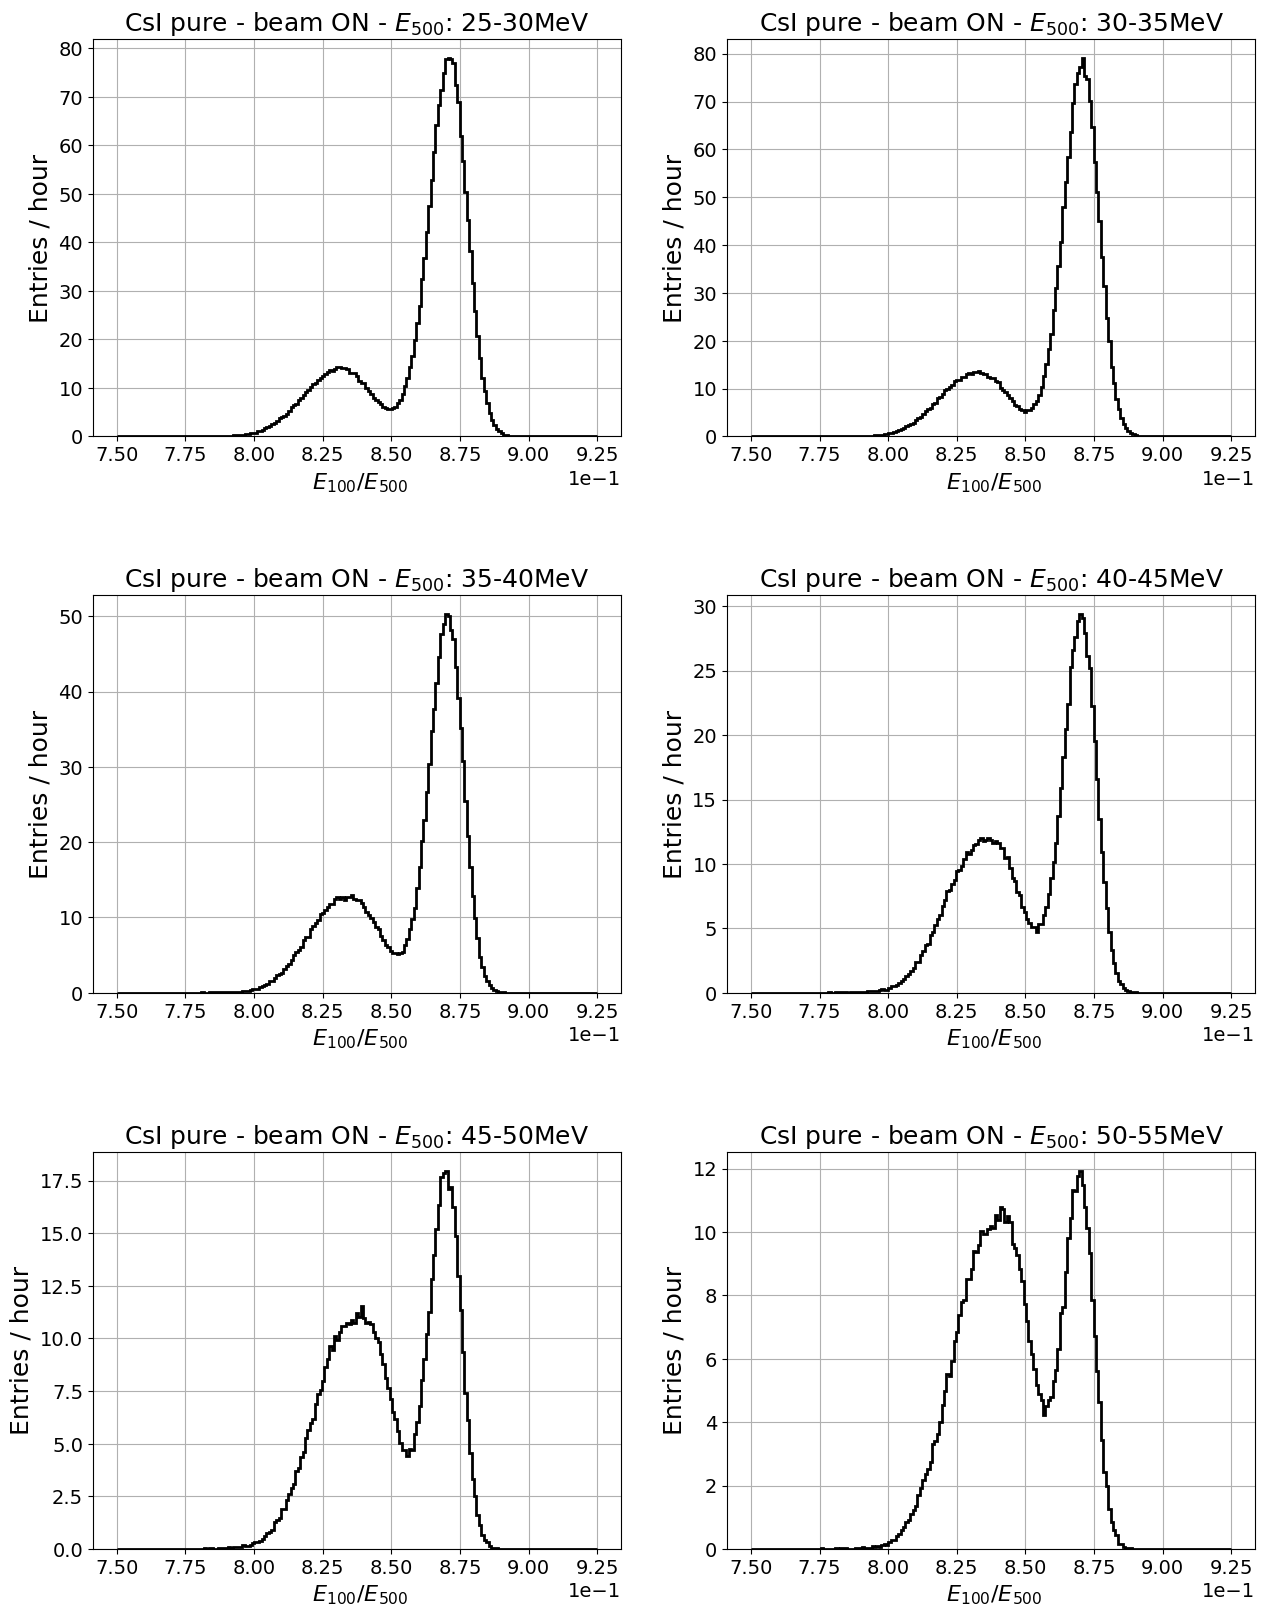

In [9]:

E500_PS = Ecalibration(pure.Energy_MK_500_PS, 'pure')
E500_PS_FT = Ecalibration(pure.Energy_MK_500_PS_FT, 'pure')

# slices=np.arange(25,60,5)
# fig, ax = plt.subplots(3, 2, figsize=(15,20))
# ax = ax.flatten()
# for i, s in enumerate(slices):
#     if i != 6:
#         bins = np.linspace(0.75, 0.925,200)
#         sl = [i for i, x in enumerate(E500_PS)  if x>s and x<s+5]
#         w = np.ones_like(np.take(pure.CR100_PS,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
#         ax[i].hist(np.take(pure.CR100_PS,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'recent100')
#         sl = [i for i, x in enumerate(E500_PS_FT)  if x>s and x<s+5]
#         w = np.ones_like(np.take(pure.CR100_PS_FT,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
#         ax[i].hist(np.take(pure.CR100_PS_FT,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, label = 'finetuned100')
#         ax[i].set_title('CsI pure - beam ON - $E_{500}$: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
#         ax[i].set_xlabel(r' $E_{100}/E_{500}$')        
#         ax[i].set_ylabel('Entries / hour',fontsize =18)
#         ax[i].grid()
#         ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#         ax[i].legend(loc = 'upper left')

        
        
slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
for i, s in enumerate(slices):
    if i != 6:
        bins = np.linspace(0.75, 0.925,200)
        sl = [i for i, x in enumerate(E500_PS)  if x>s and x<s+5]
        w = np.ones_like(np.take(pure.CR100_PS,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.CR100_PS,sl), bins =bins, weights = w , histtype = 'step', linewidth = 2, color = 'black')
        ax[i].set_title('CsI pure - beam ON - $E_{500}$: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
        ax[i].set_xlabel(r' $E_{100}/E_{500}$')        
        ax[i].set_ylabel('Entries / hour',fontsize =18)
        ax[i].grid()
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#         ax[i].legend(loc = 'upper left')


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


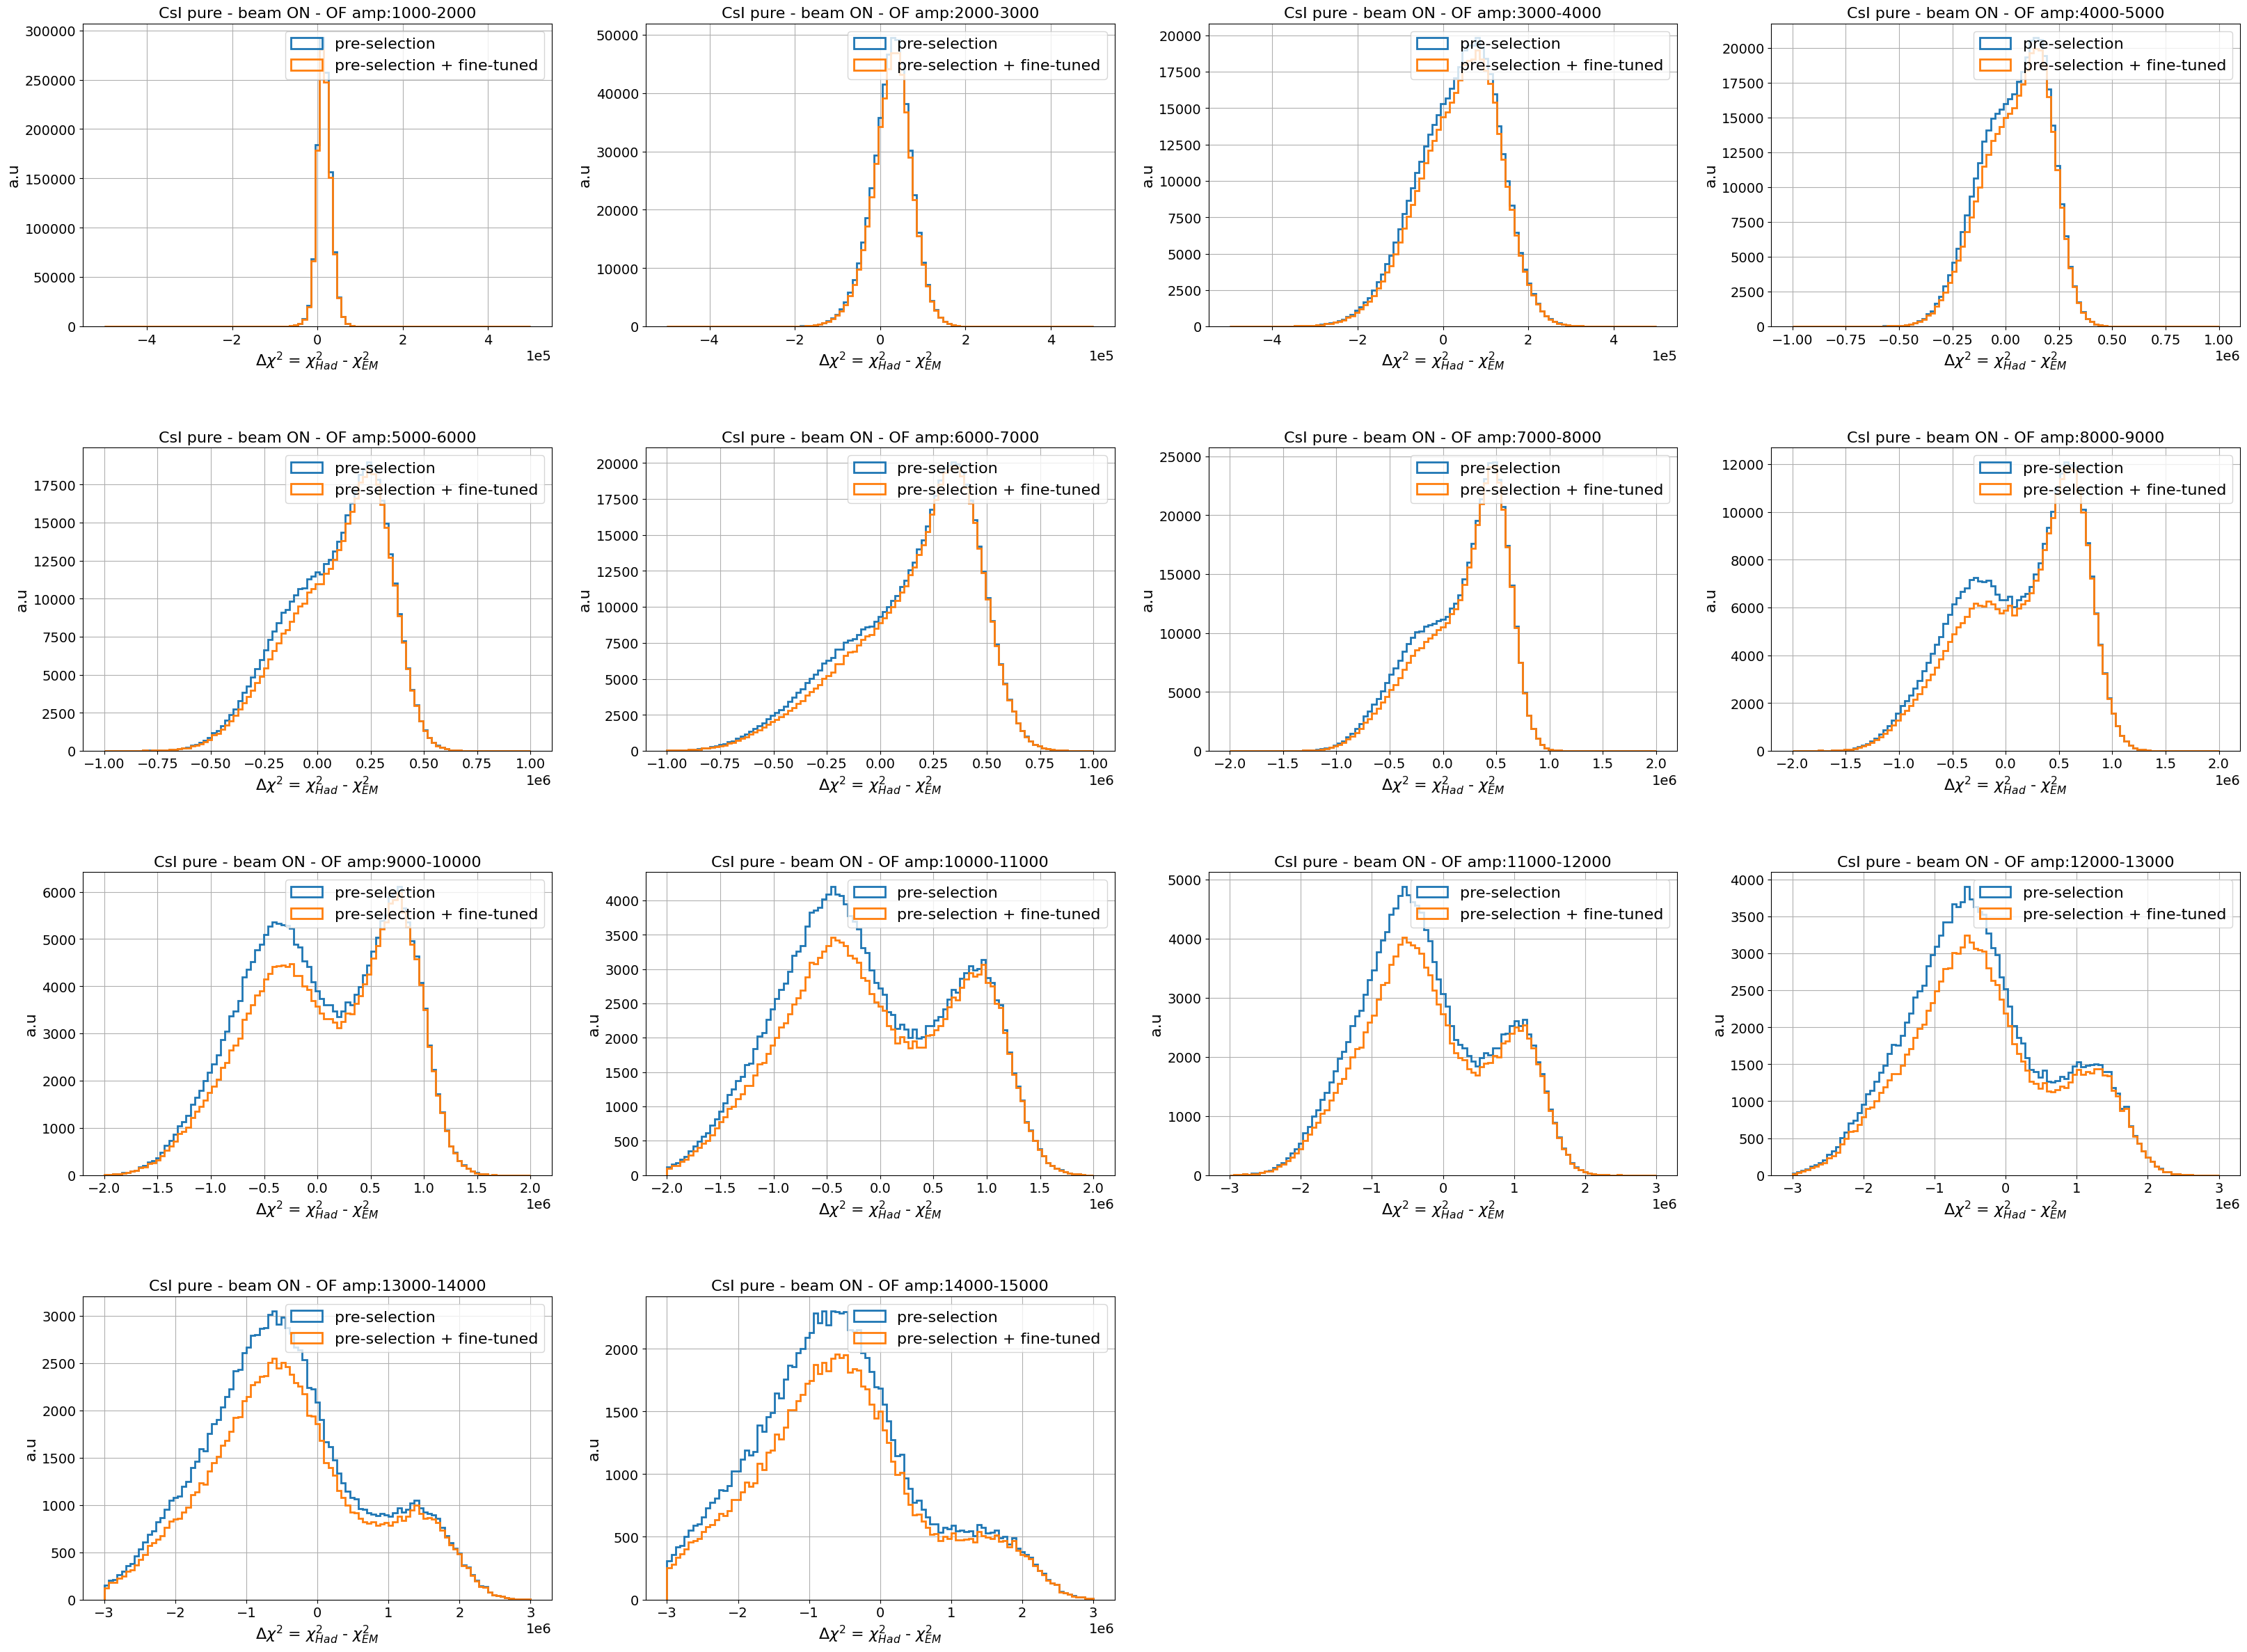

In [69]:



slices=np.arange(1000,15000,1000)
fig, ax = plt.subplots(4, 4, figsize=(40,30))
ax = ax.flatten()
ax[-1].axis('off'); ax[-2].axis('off')
for i, s in enumerate(slices):
    sl = [i for i, x in enumerate(pure.amp_EM_PS) if x>s and x<s+1000]
    if s  < 4000: bins = np.linspace(-0.5e6,0.5e6,100)
    elif s  < 7000: bins = np.linspace(-1e6,1e6,100)
    elif s  < 11000: bins = np.linspace(-2e6,2e6,100)
    else: bins = np.linspace(-3e6,3e6,100)
    weights = np.ones_like(np.take(pure.deltachi2_PS,sl))/len(np.take(pure.deltachi2_PS,sl))
    ax[i].hist(np.take(pure.deltachi2_PS,sl), bins =bins, histtype = 'step', linewidth =2, label = 'pre-selection')
    sl = [i for i, x in enumerate(pure.amp_EM_PS_FT) if x>s and x<s+1000]
    if s  < 4000: bins = np.linspace(-0.5e6,0.5e6,100)
    elif s  < 7000: bins = np.linspace(-1e6,1e6,100)
    elif s  < 11000: bins = np.linspace(-2e6,2e6,100)
    else: bins = np.linspace(-3e6,3e6,100)
    weights = np.ones_like(np.take(pure.deltachi2_PS_FT,sl))/len(np.take(pure.deltachi2_PS_FT,sl))
    ax[i].hist(np.take(pure.deltachi2_PS_FT,sl), bins =bins, histtype = 'step' , linewidth =2, label = 'pre-selection + fine-tuned')
    ax[i].set_title('CsI pure - beam ON - OF amp:'+str(s)+'-'+str(s+1000))
    ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$')
    ax[i].set_ylabel('a.u')
    ax[i].grid()
    ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[i].legend()
plt.show()

peak memory: 956.88 MiB, increment: 41.52 MiB


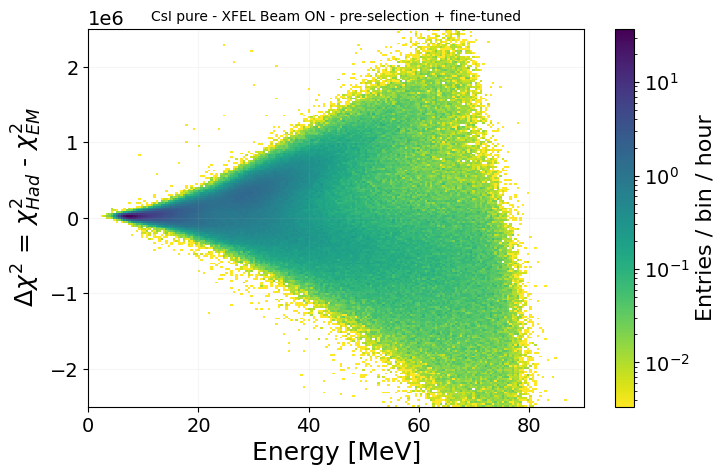

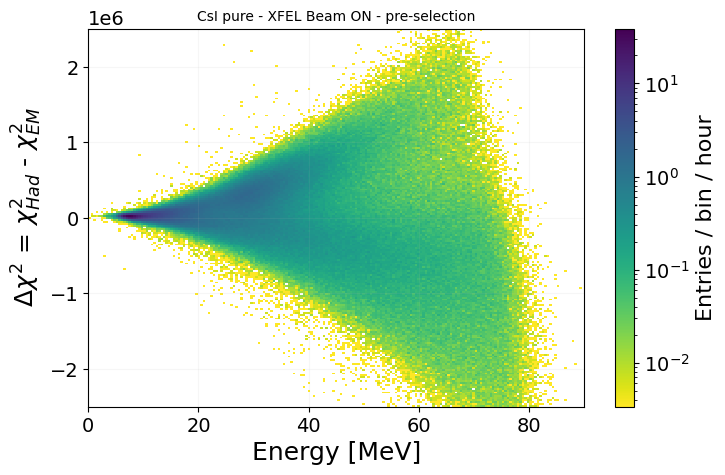

In [8]:
%%memit
E = Ecalibration(pure.integrated_raw_PS_FT, 'pure')
E = Ecalibration(pure.Energy_MK_PS_FT, 'pure')
E_ = Ecalibration(pure.Energy_MK_PS, 'pure')

plt.figure(figsize=(8, 5))
w = np.ones_like(pure.deltachi2_PS_FT)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E , pure.deltachi2_PS_FT ,bins=(np.linspace(0,90,200),np.linspace(-0.25e7, 0.25e7, 200)), cmap='viridis_r',weights=w, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI pure - XFEL Beam ON - pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')
plt.figure(figsize=(8, 5))
w = np.ones_like(pure.deltachi2_PS)/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
plt.hist2d(E_ , pure.deltachi2_PS ,bins=(np.linspace(0,90,200),np.linspace(-0.25e7, 0.25e7, 200)), cmap='viridis_r',weights=w, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI pure - XFEL Beam ON - pre-selection',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries / bin / hour')


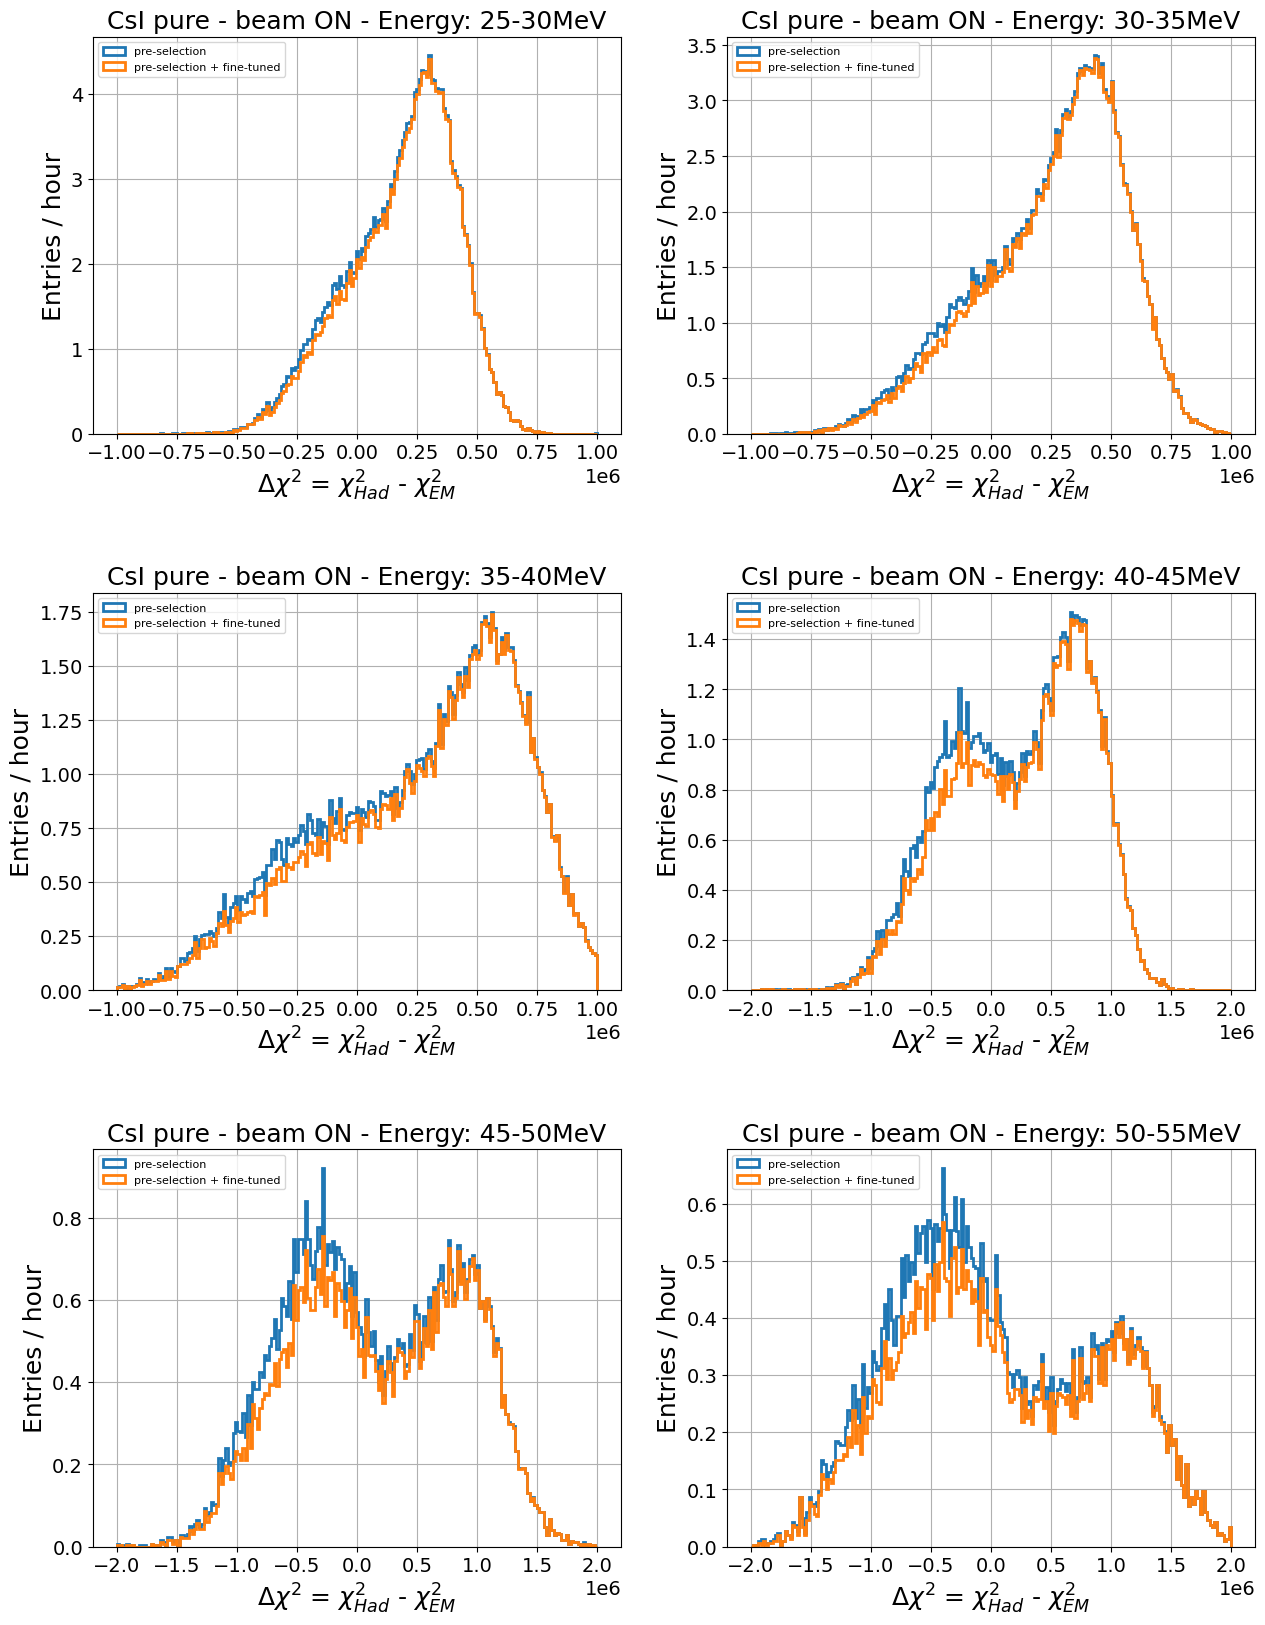

In [16]:

E = Ecalibration(pure.integrated_raw_PS_FT, 'pure')
E = Ecalibration(pure.Energy_MK_PS_FT, 'pure')
E_ = Ecalibration(pure.Energy_MK_PS, 'pure')



slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
# ax[-1].axis('off'); ax[-2].axis('off')
for i, s in enumerate(slices):
    if i != 6:
        sl = [i for i, x in enumerate(E) if x>s and x<s+5]
        sl_ = [i for i, x in enumerate(E_) if x>s and x<s+5]
        if s  < 20: bins = np.linspace(-0.5e6,0.5e6,200)
        elif s  < 40: bins = np.linspace(-1e6,1e6,200)
        elif s  < 60: bins = np.linspace(-2e6,2e6,200)
        else: bins = np.linspace(-3e6,3e6,200)
        w = np.ones_like(np.take(pure.deltachi2_PS,sl_))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.deltachi2_PS,sl_), bins =bins, histtype = 'step' ,weights = w,  linewidth =2, label = 'pre-selection ')
        w = np.ones_like(np.take(pure.deltachi2_PS_FT,sl))/(len_identifiers_15min_beamON*0.25 +  len_identifiers_2hours_beamON*2  )
        ax[i].hist(np.take(pure.deltachi2_PS_FT,sl), bins =bins, histtype = 'step' ,weights = w,  linewidth =2, label = 'pre-selection + fine-tuned')
        ax[i].set_title('CsI pure - beam ON - Energy: '+str(s)+'-'+str(s+5)+'MeV',fontsize =18)
        ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize =18)
        ax[i].set_ylabel('Entries / hour',fontsize =18)
        ax[i].grid()
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[i].legend(loc = 'upper left', fontsize = 8)

In [17]:
l , m = [], []


for i in range (len (pure.deltachi2_PS_FT)):
    if pure.deltachi2_PS_FT[i]>-0.2e6 and pure.deltachi2_PS_FT[i]<0.2e6:
        l.append(i)
print(len(l))

        
for i in l:        
    if pure.amp_EM_PS_FT[i]>6500:
        m.append(i)
print(len(l), len(m))


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


550270
550270 35846


--------- 0 ---------------
-13185.90111111111
48786
delchi2 -0.1969221087128818 chi2_EM 2.1522620844344496 chi2_Had 1.955339975721568
wavedump_pure_XFELtesting_21-07-10_03-26-40


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-26_07-12-01.txt' mode='r' encoding='utf-8'>


-13185.90111111111 407982.9999999946


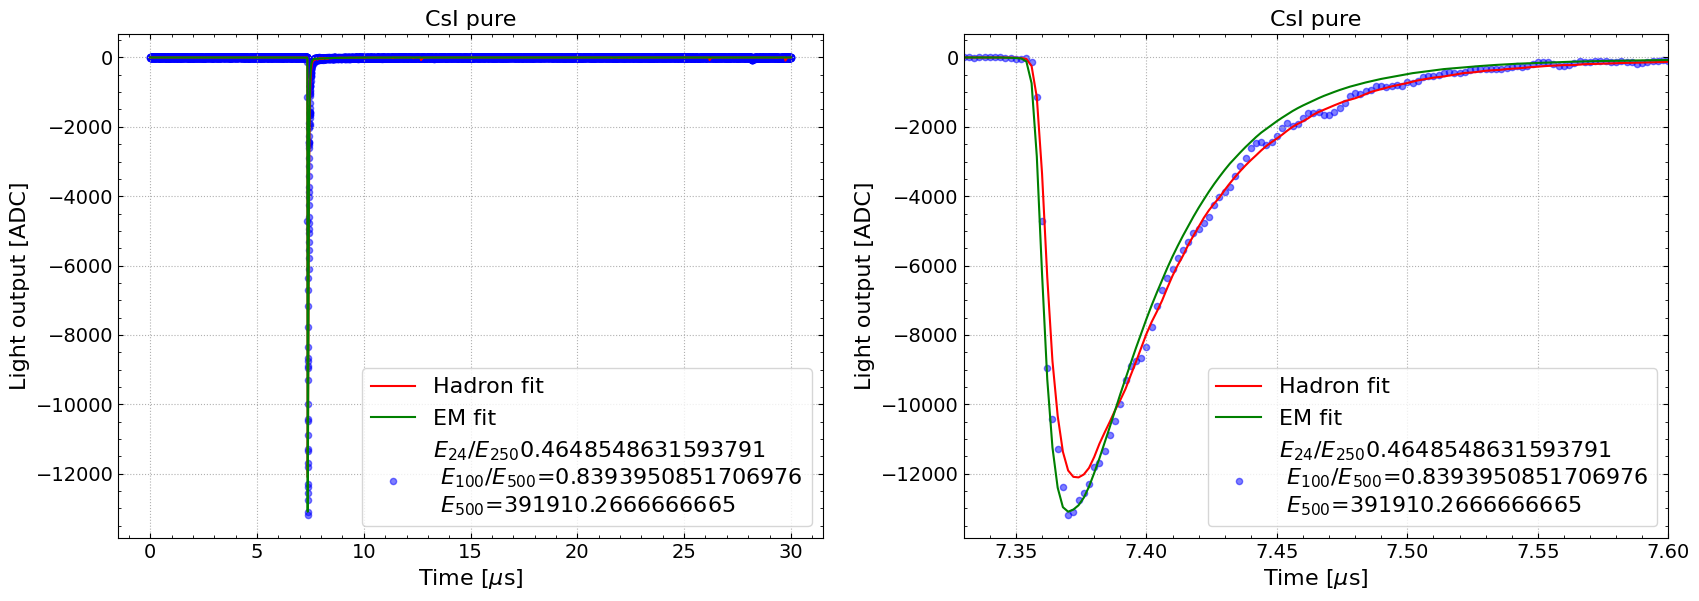

--------- 1 ---------------
-7185.112222222222
30542
delchi2 -0.11645953951257468 chi2_EM 0.4283134822974354 chi2_Had 0.3118539427848607
wavedump_pure_XFELtesting_21-07-09_23-26-22


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_03-26-40.txt' mode='r' encoding='utf-8'>


-7185.112222222222 218024.9999999901


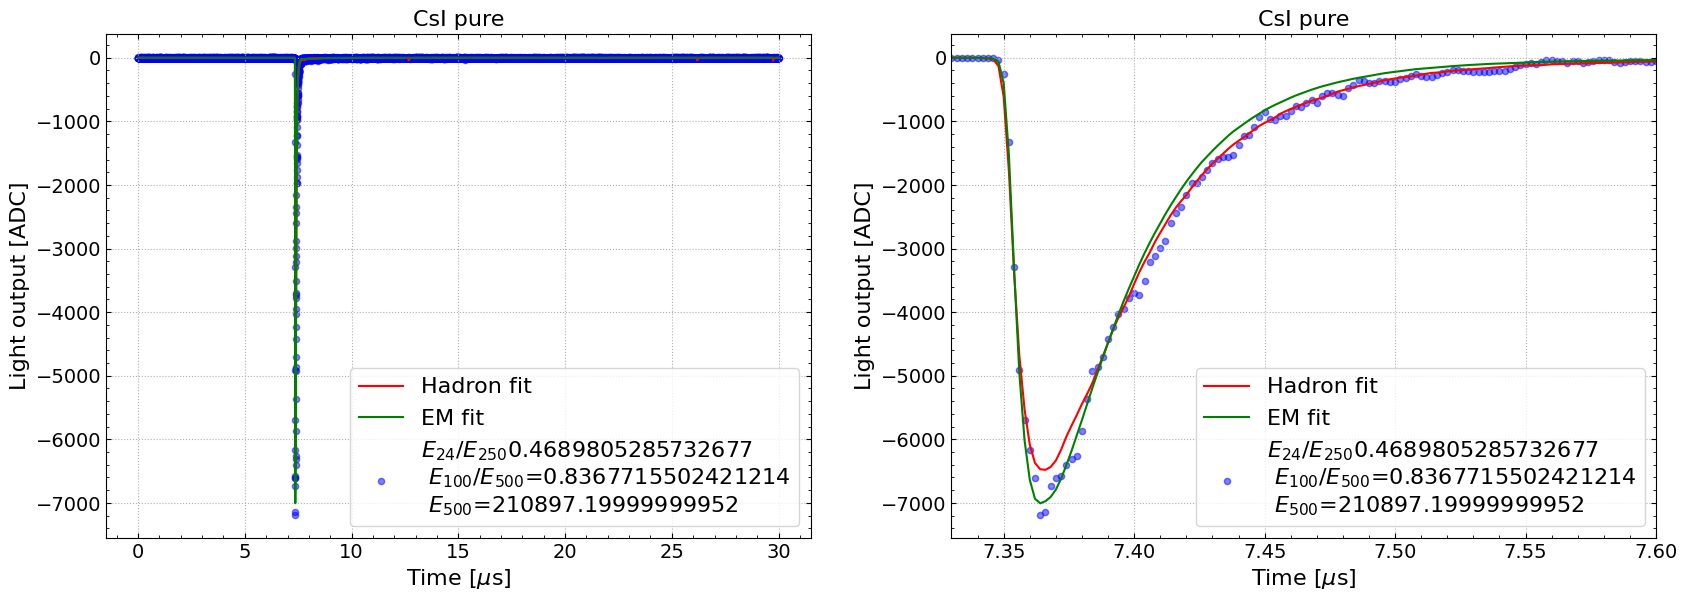

--------- 2 ---------------
-8615.58
21850
delchi2 -0.1009048434329778 chi2_EM 0.6228500695083141 chi2_Had 0.5219452260753363
wavedump_pure_XFELtesting_21-07-10_01-26-31


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>


-8615.58 266295.000000008


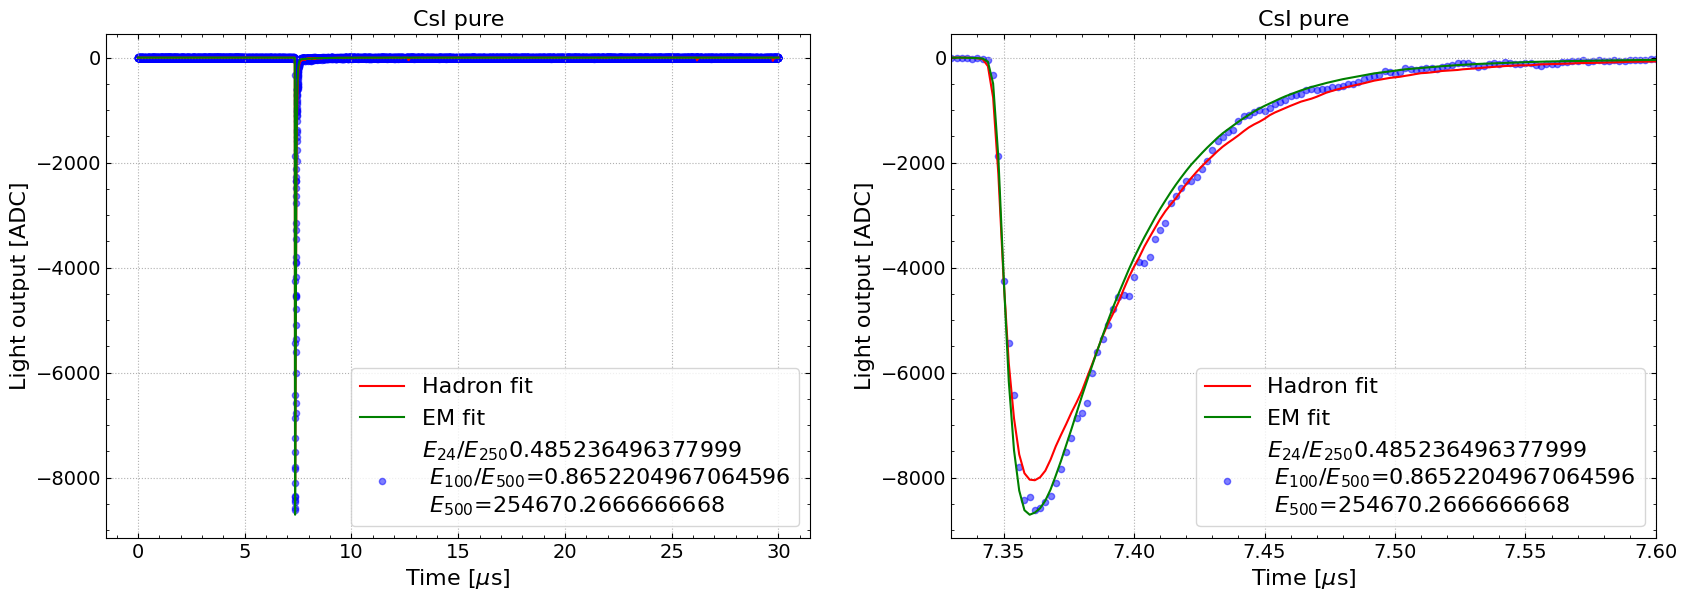

--------- 3 ---------------
-12086.34888888889
56550
delchi2 -0.08896102001580596 chi2_EM 1.1721497209928036 chi2_Had 1.0831887009769976
wavedump_pure_XFELtesting_21-07-10_03-26-40


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_01-26-31.txt' mode='r' encoding='utf-8'>


-12086.34888888889 357708.9999999992


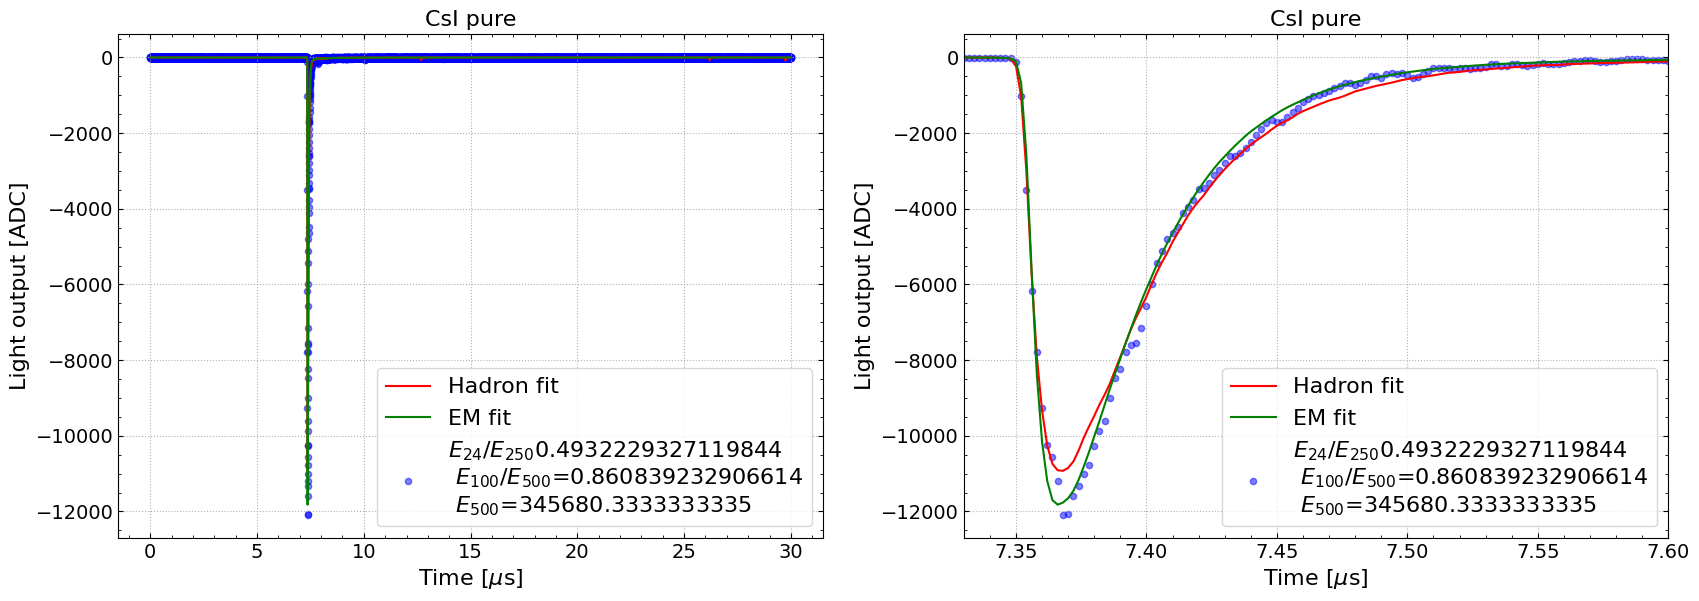

--------- 4 ---------------
-6874.91
12944
delchi2 0.10157624764712155 chi2_EM 0.36884406168922784 chi2_Had 0.4704203093363494
wavedump_pure_XFELtesting_21-07-10_07-26-58


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_03-26-40.txt' mode='r' encoding='utf-8'>


-6874.91 195549.00000001243


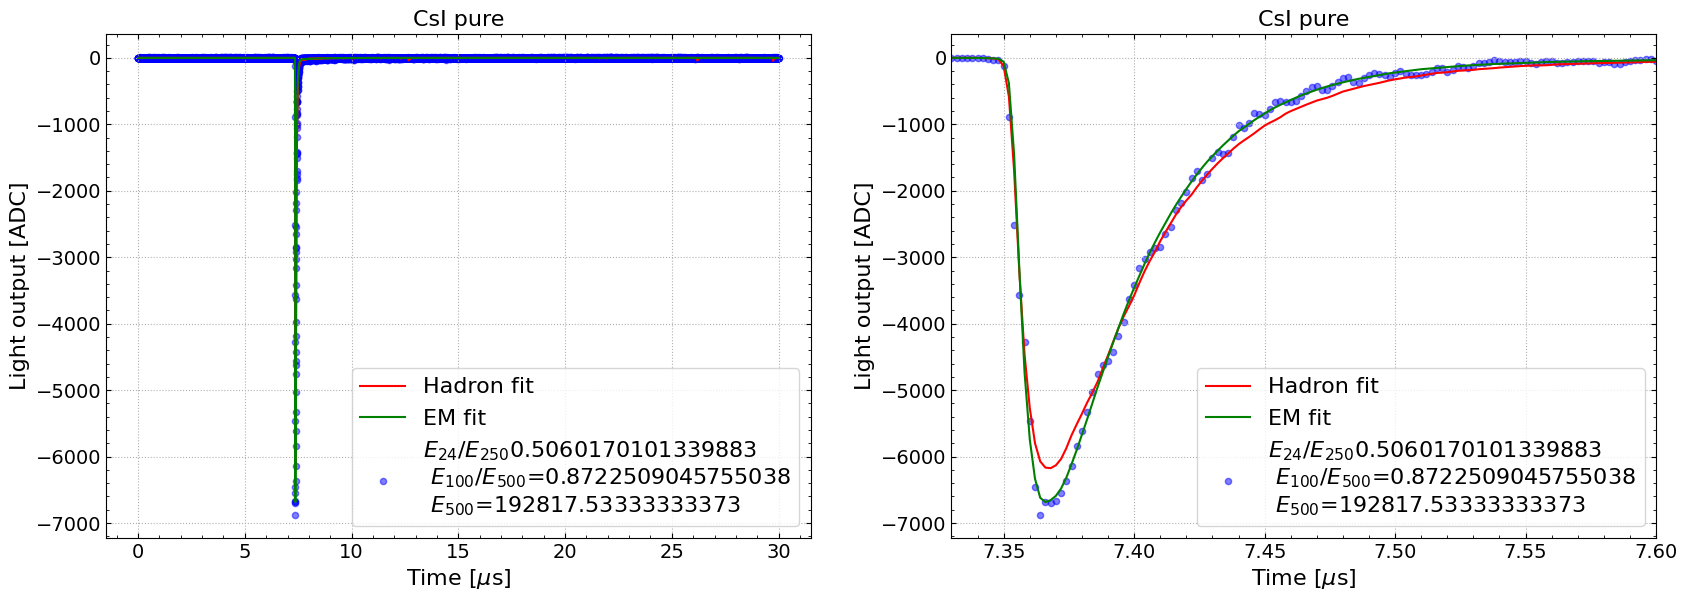

--------- 5 ---------------
-6693.292222222222
218
delchi2 0.10927652417022735 chi2_EM 0.3855647694317177 chi2_Had 0.49484129360194506
wavedump_pure_XFELtesting_21-07-09_15-25-46


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_07-26-58.txt' mode='r' encoding='utf-8'>


-6693.292222222222 190683.9999999907


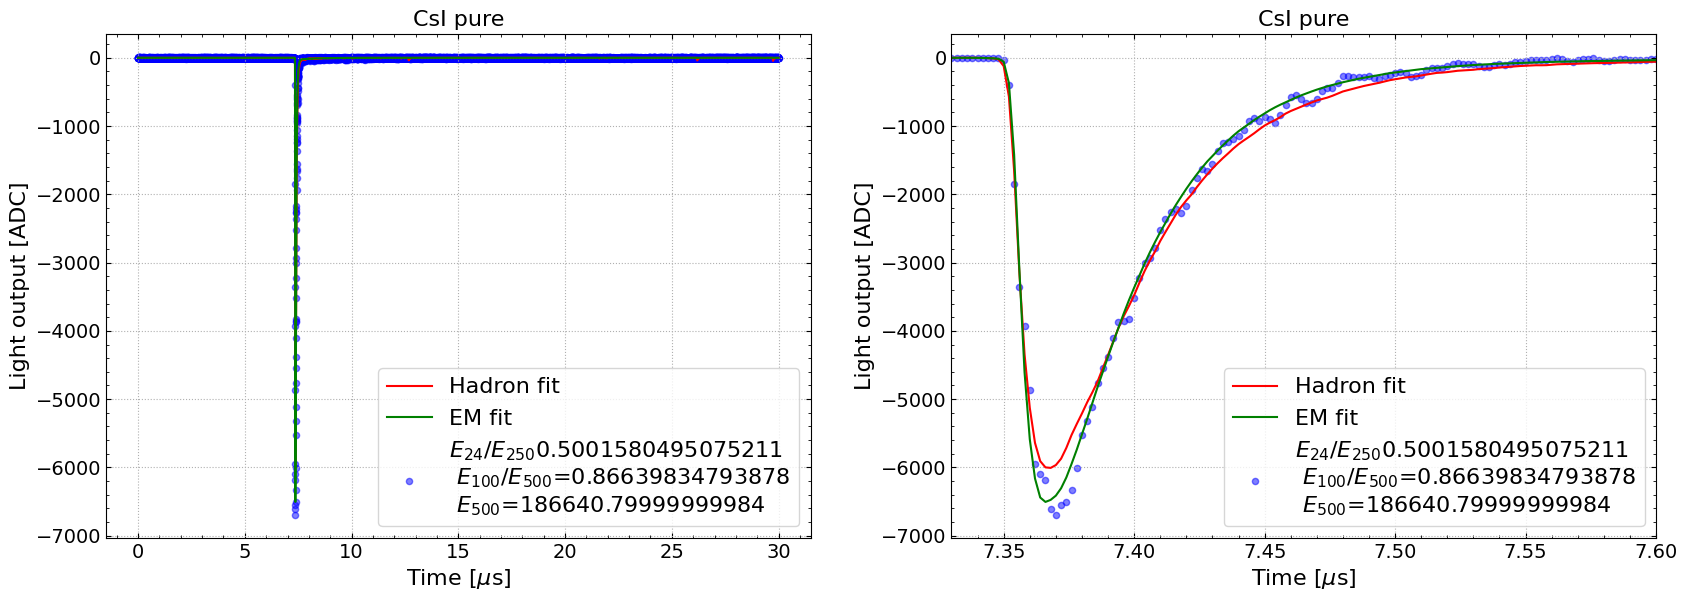

--------- 6 ---------------
-6997.722222222223
37970
delchi2 0.05316225686597824 chi2_EM 0.4817352384047508 chi2_Had 0.534897495270729
wavedump_pure_XFELtesting_21-07-10_19-27-53


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_15-25-46.txt' mode='r' encoding='utf-8'>


-6997.722222222223 205468.00000000765


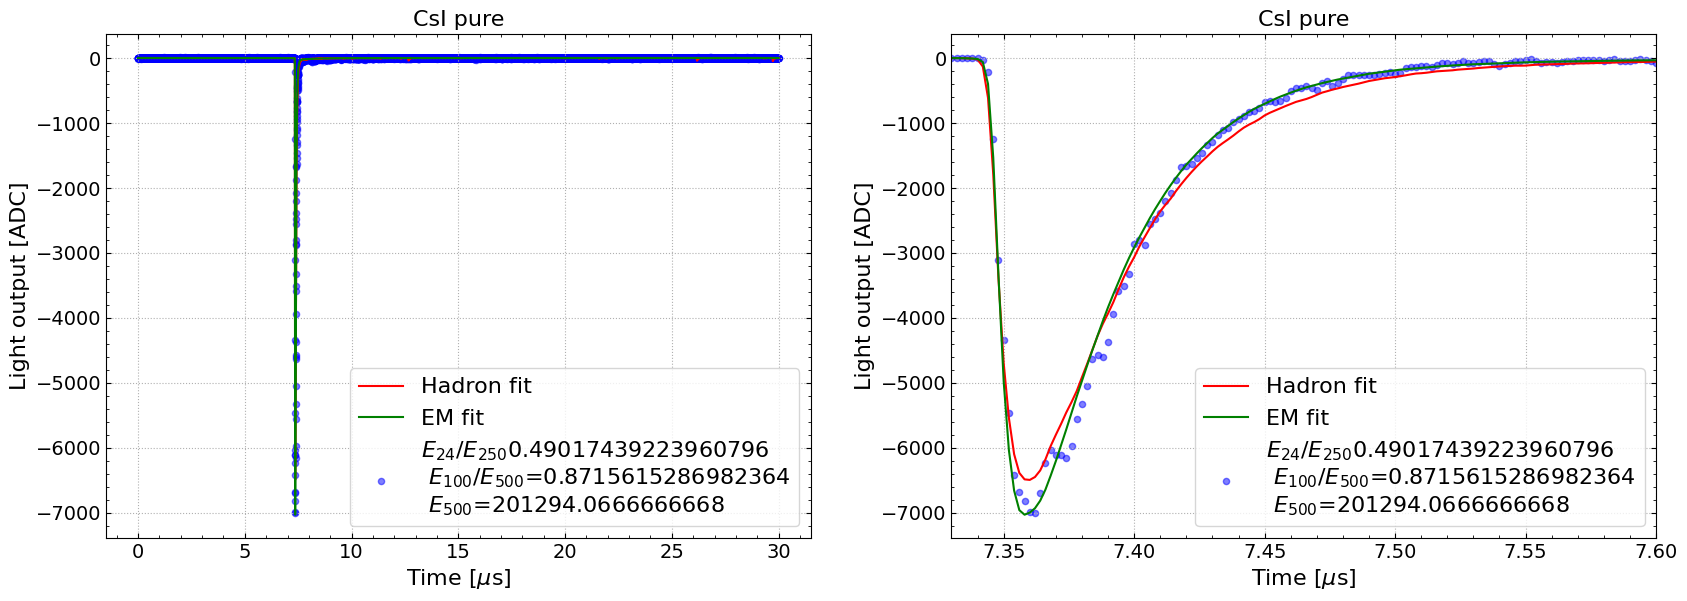

--------- 7 ---------------
-6805.565555555555
35124
delchi2 -0.10509707901960612 chi2_EM 0.647014791923374 chi2_Had 0.5419177129037678
wavedump_pure_XFELtesting_21-07-10_19-27-53


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_19-27-53.txt' mode='r' encoding='utf-8'>


-6805.565555555555 214612.99999999872


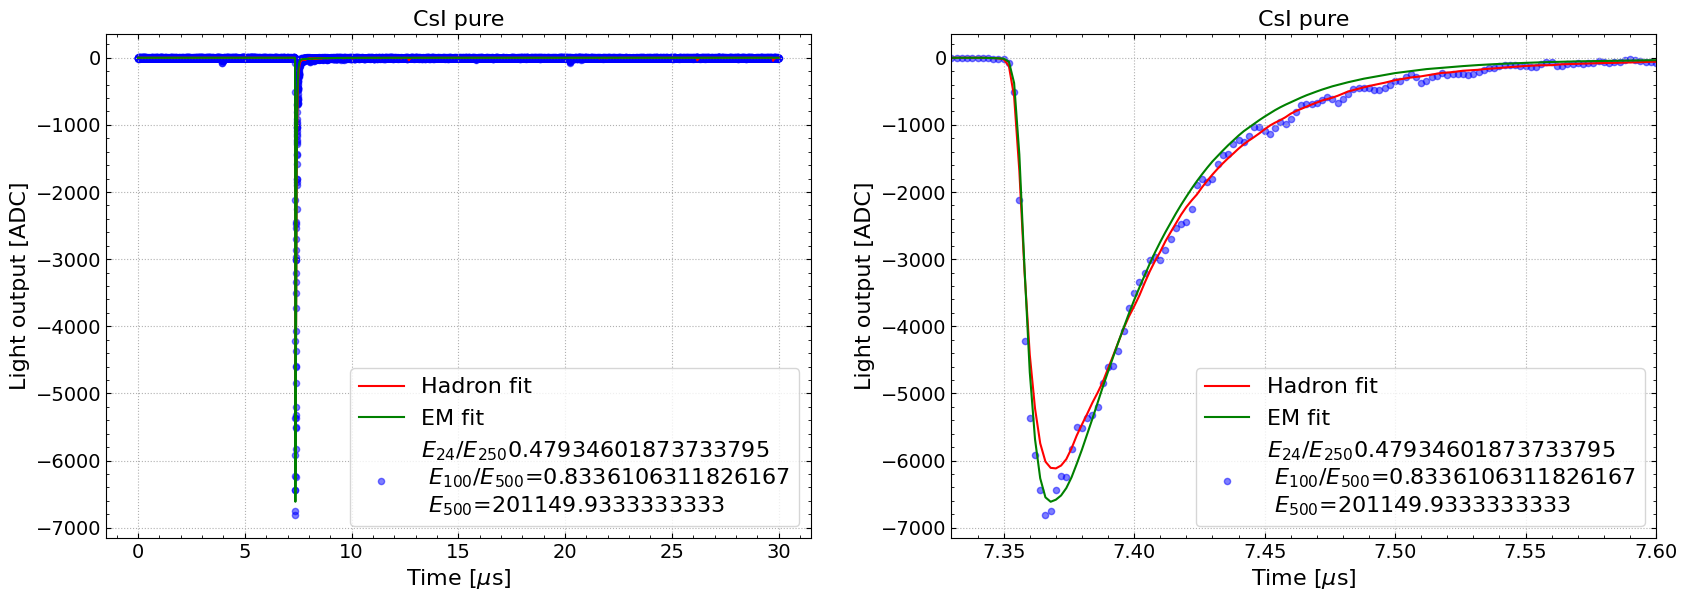

--------- 8 ---------------
-6934.601111111111
4778
delchi2 0.09239713418681919 chi2_EM 0.34512970554317535 chi2_Had 0.4375268397299945
wavedump_pure_XFELtesting_21-07-09_15-25-46


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_19-27-53.txt' mode='r' encoding='utf-8'>


-6934.601111111111 207691.0000000029


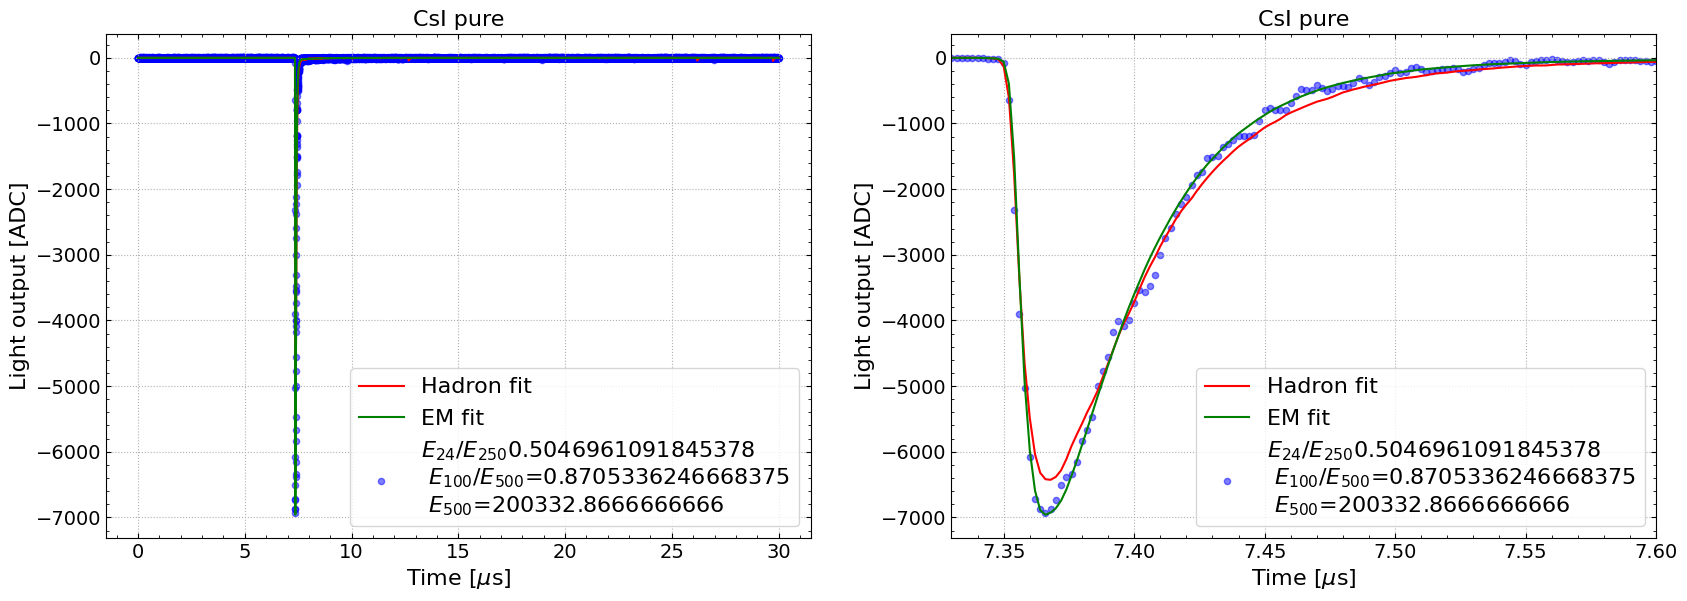

--------- 9 ---------------
-12145.09888888889
68991
delchi2 -0.07524431147563458 chi2_EM 1.3743768439804613 chi2_Had 1.2991325325048269
wavedump_pure_XFELtesting_21-07-10_17-27-44


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_15-25-46.txt' mode='r' encoding='utf-8'>


-12145.09888888889 359657.99999999744


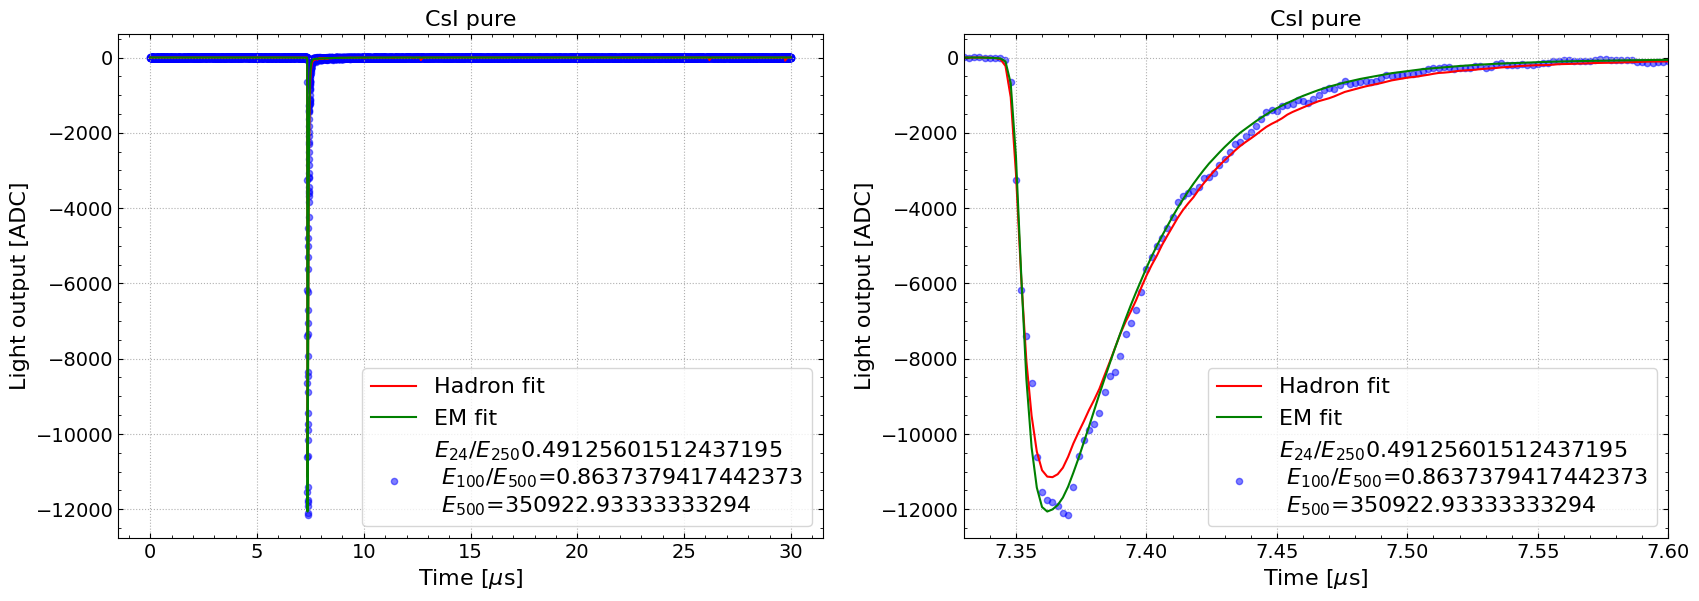

--------- 10 ---------------
-6676.246666666666
64436
delchi2 -0.1700018729480505 chi2_EM 0.4393877159801647 chi2_Had 0.2693858430321142
wavedump_pure_XFELtesting_21-07-10_07-26-58


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_17-27-44.txt' mode='r' encoding='utf-8'>


-6676.246666666666 201979.99999999464


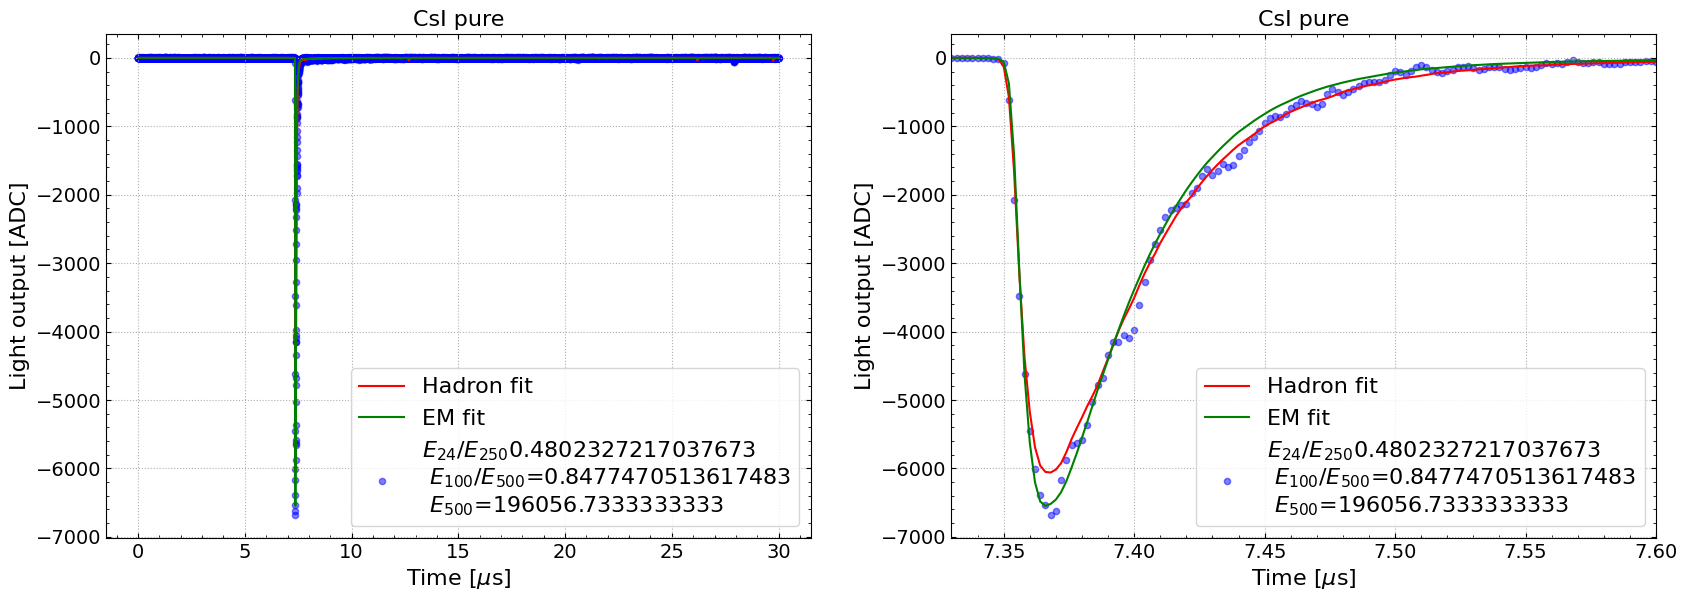

--------- 11 ---------------
-7735.738888888889
30999
delchi2 -0.04616710762737691 chi2_EM 0.5383880621838719 chi2_Had 0.49222095455649495
wavedump_pure_XFELtesting_21-07-10_13-27-26


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_07-26-58.txt' mode='r' encoding='utf-8'>


-7735.738888888889 221057.00000000963


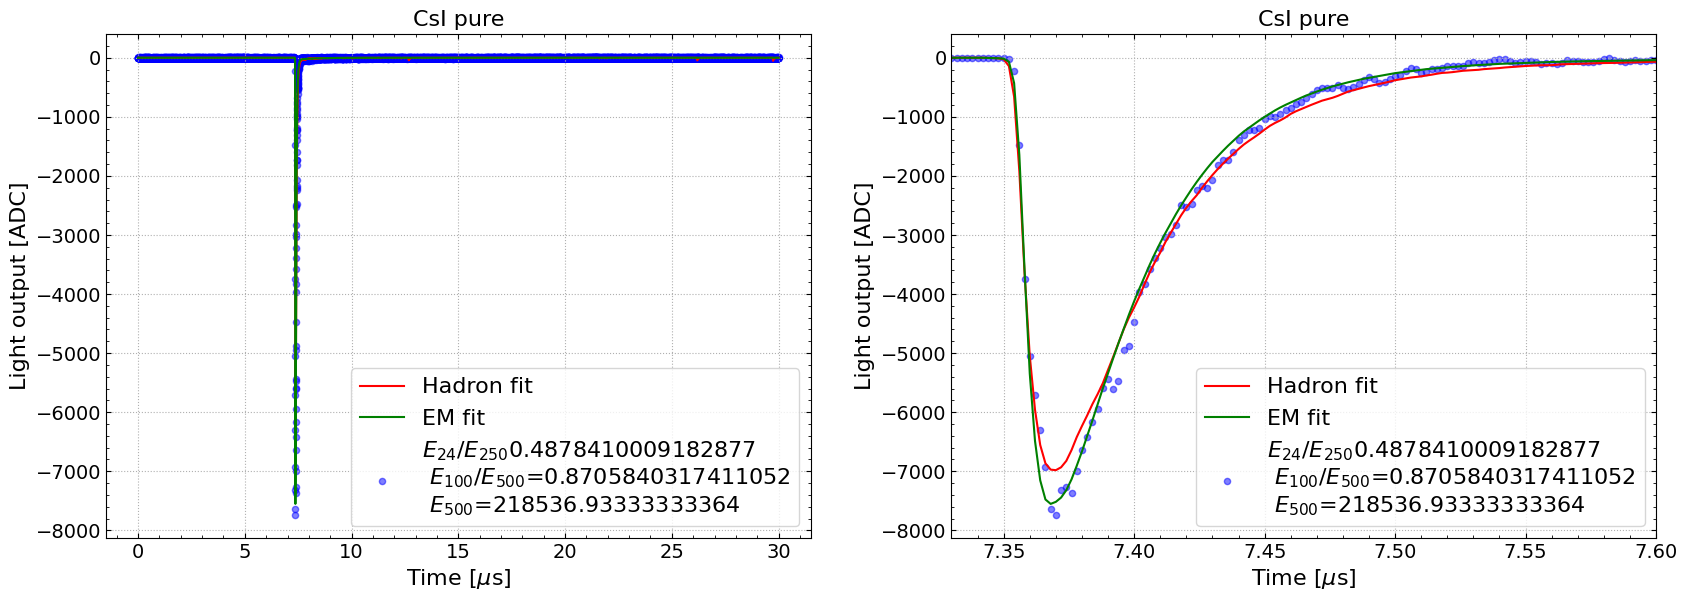

--------- 12 ---------------
-8524.412222222221
55251
delchi2 -0.1134960133534968 chi2_EM 0.7075557941598147 chi2_Had 0.5940597808063179
wavedump_pure_XFELtesting_21-07-10_15-27-35


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_13-27-26.txt' mode='r' encoding='utf-8'>


-8524.412222222221 247277.00000000876


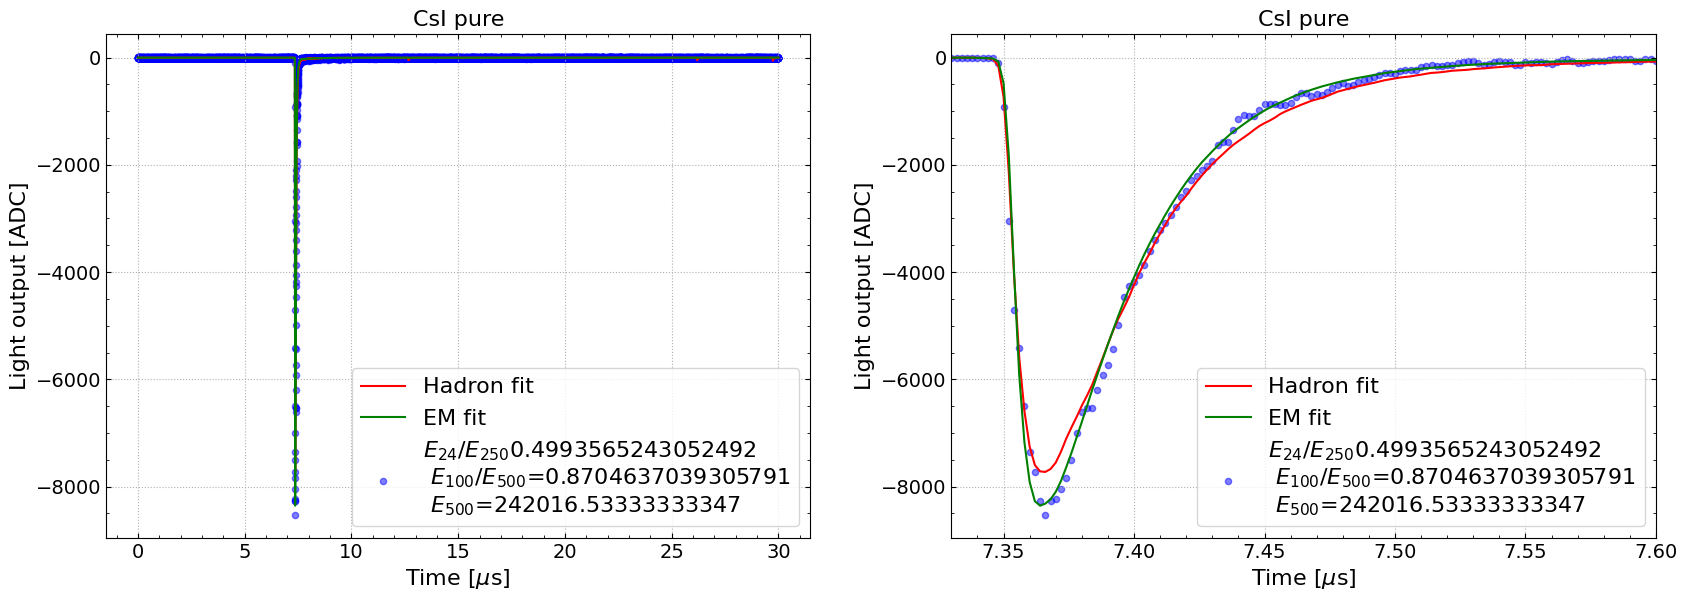

--------- 13 ---------------
-12495.347777777777
9326
delchi2 -0.06314648641890287 chi2_EM 1.4315958795697987 chi2_Had 1.3684493931508959
wavedump_pure_XFELtesting_21-07-10_17-27-44


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_15-27-35.txt' mode='r' encoding='utf-8'>


-12495.347777777777 396279.0000000016


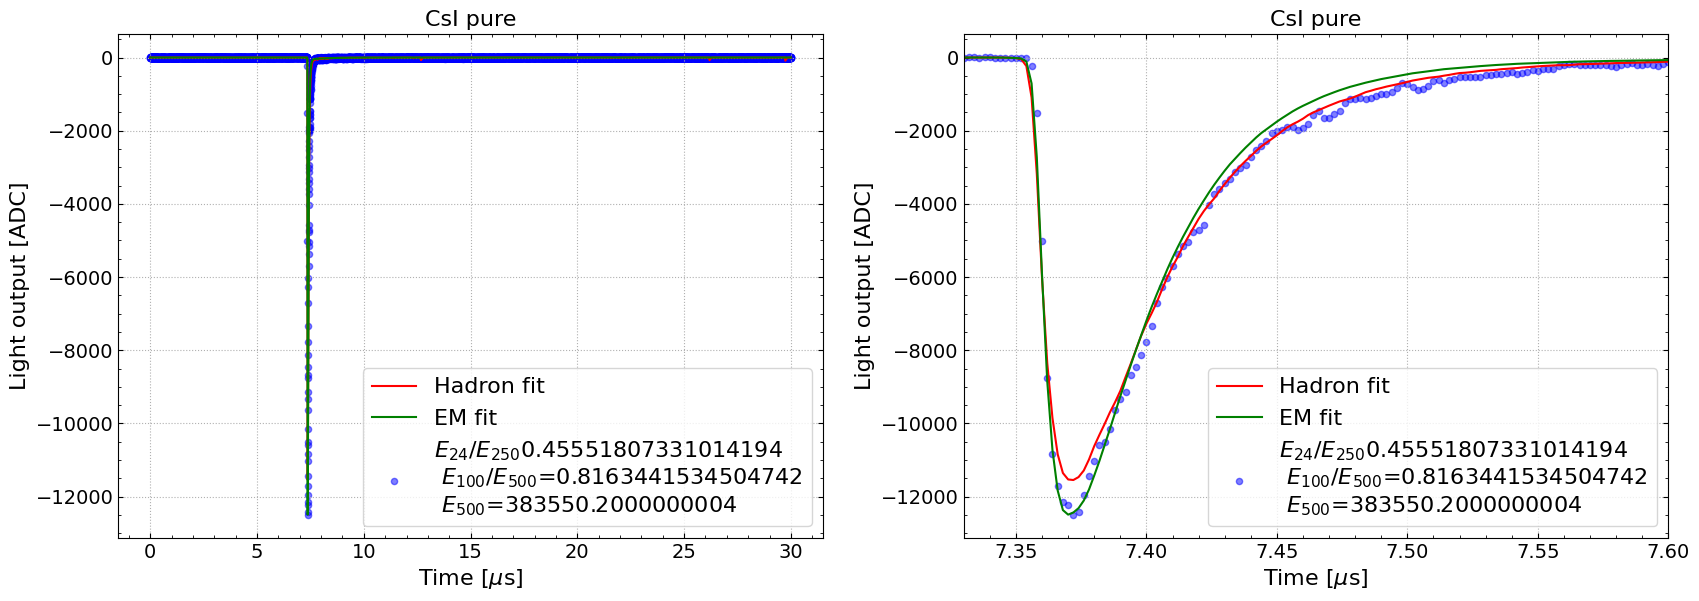

--------- 14 ---------------
-9350.548888888889
5969
delchi2 0.17662360464034974 chi2_EM 1.3297238158133329 chi2_Had 1.5063474204536826
wavedump_pure_XFELtesting_21-07-09_15-25-46


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_17-27-44.txt' mode='r' encoding='utf-8'>


-9350.548888888889 271726.9999999892


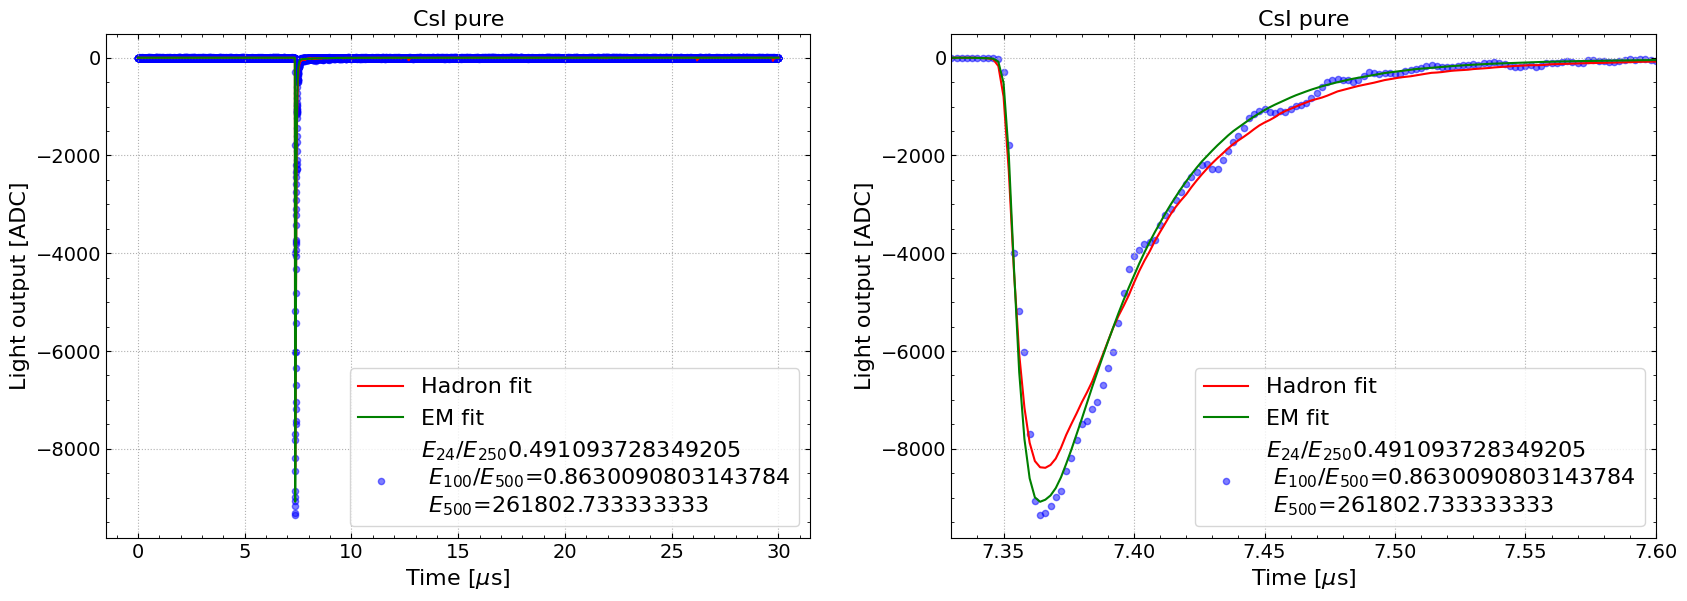

--------- 15 ---------------
-14325.055555555555
10711
delchi2 -0.18029723041969536 chi2_EM 1.4281290441536902 chi2_Had 1.247831813733995
wavedump_pure_XFELtesting_21-07-09_23-26-22


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_15-25-46.txt' mode='r' encoding='utf-8'>


-14325.055555555555 436106.00000000186


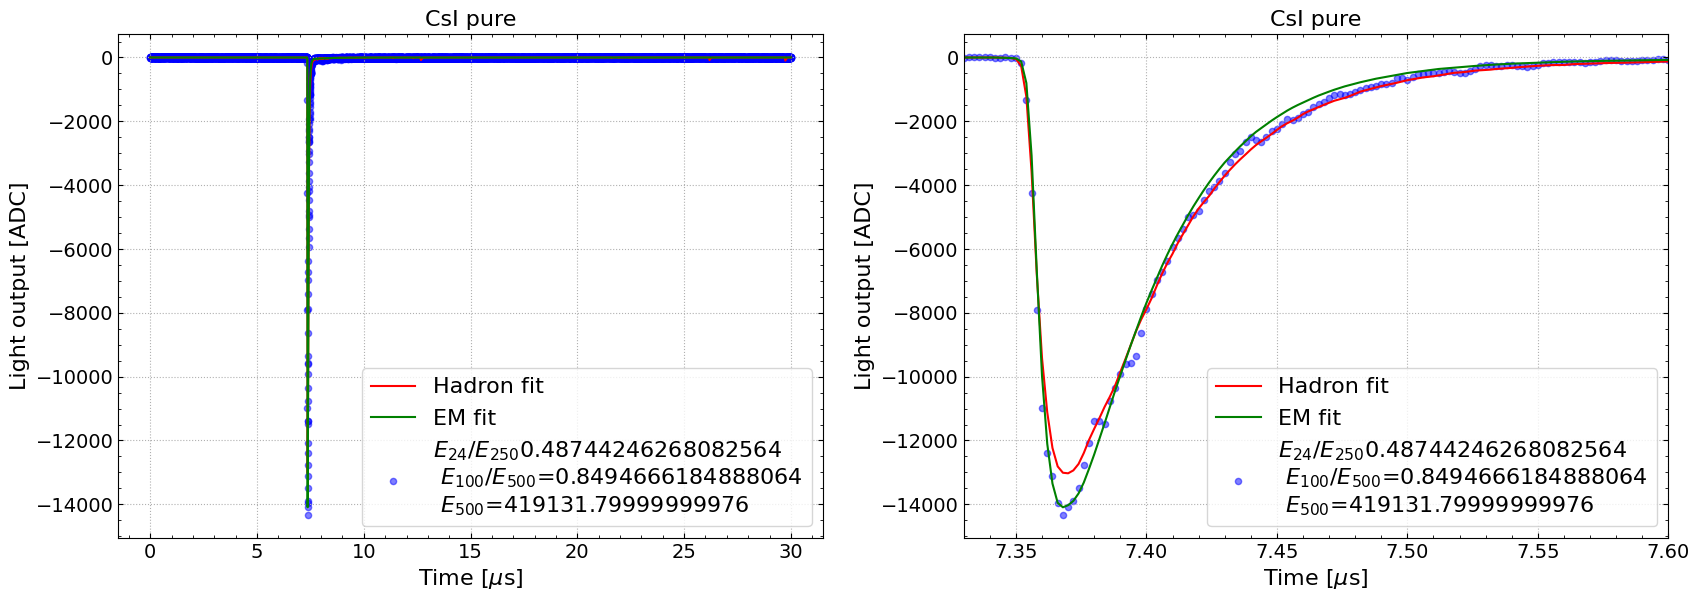

--------- 16 ---------------
-6871.681111111111
16655
delchi2 -0.17512552359932662 chi2_EM 0.5907495607211143 chi2_Had 0.4156240371217877
wavedump_pure_XFELtesting_21-07-10_03-26-40


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>


-6871.681111111111 211393.99999998696


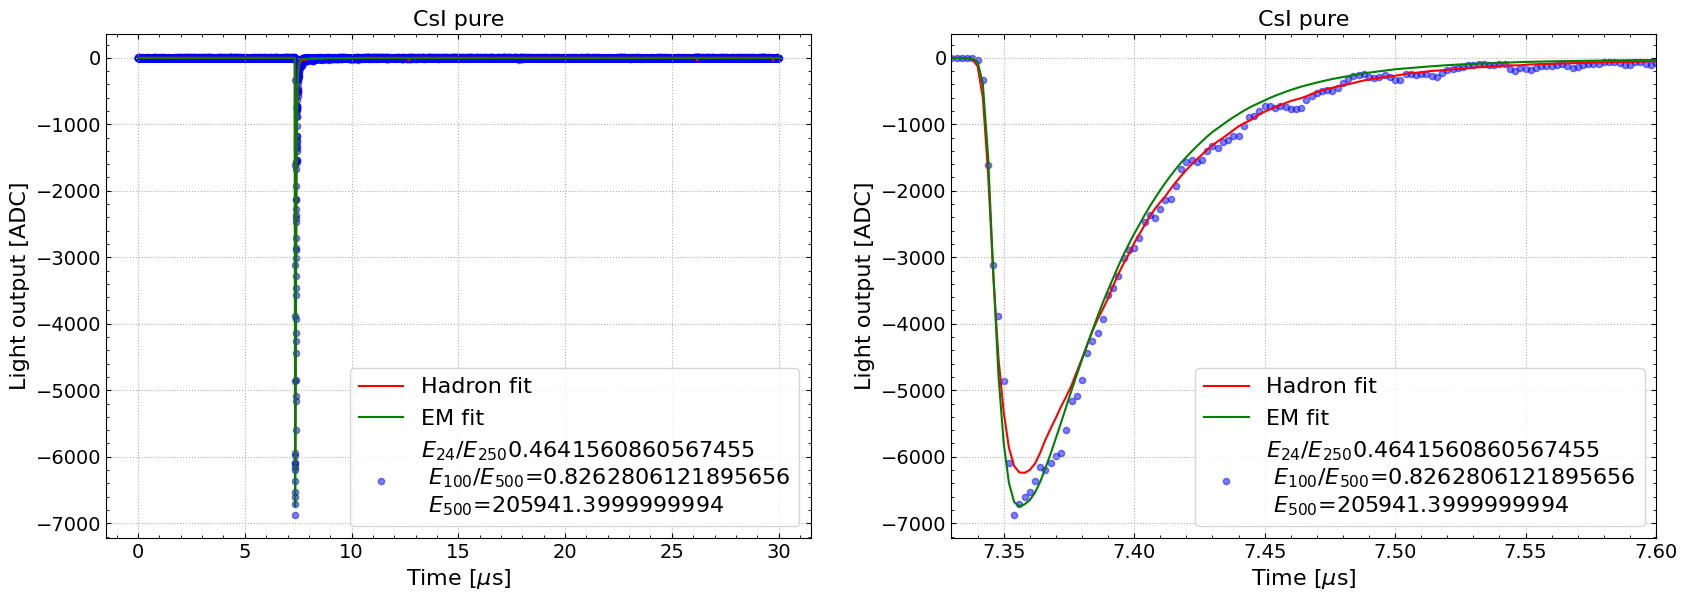

--------- 17 ---------------
-10074.277777777777
50333
delchi2 -0.05772782000666857 chi2_EM 0.5805855133225918 chi2_Had 0.5228576933159232
wavedump_pure_XFELtesting_21-07-09_23-26-22


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_03-26-40.txt' mode='r' encoding='utf-8'>


-10074.277777777777 313874.9999999918


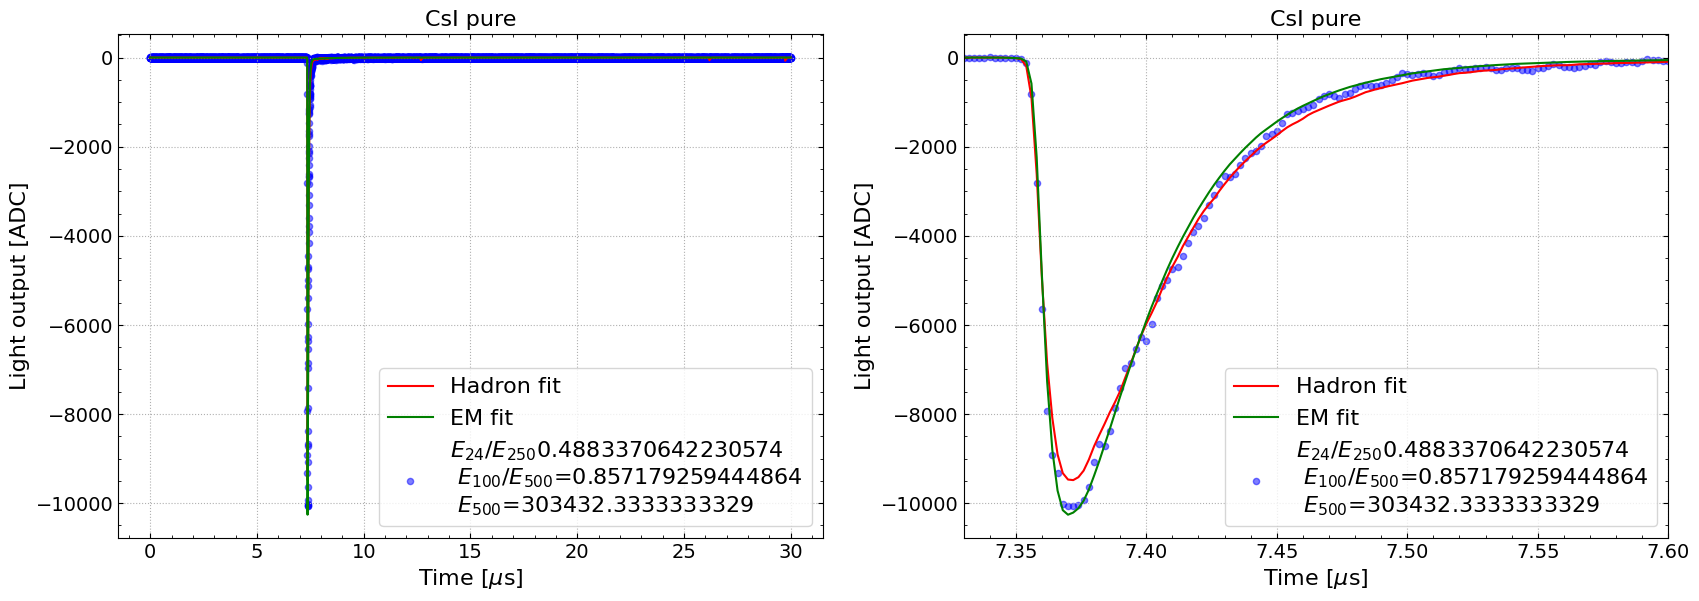

--------- 18 ---------------
-6760.853333333333
38609
delchi2 0.08703833589109779 chi2_EM 0.4637962142069489 chi2_Had 0.5508345500980467
wavedump_pure_XFELtesting_21-07-10_13-27-26


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>


-6760.853333333333 194067.99999999683


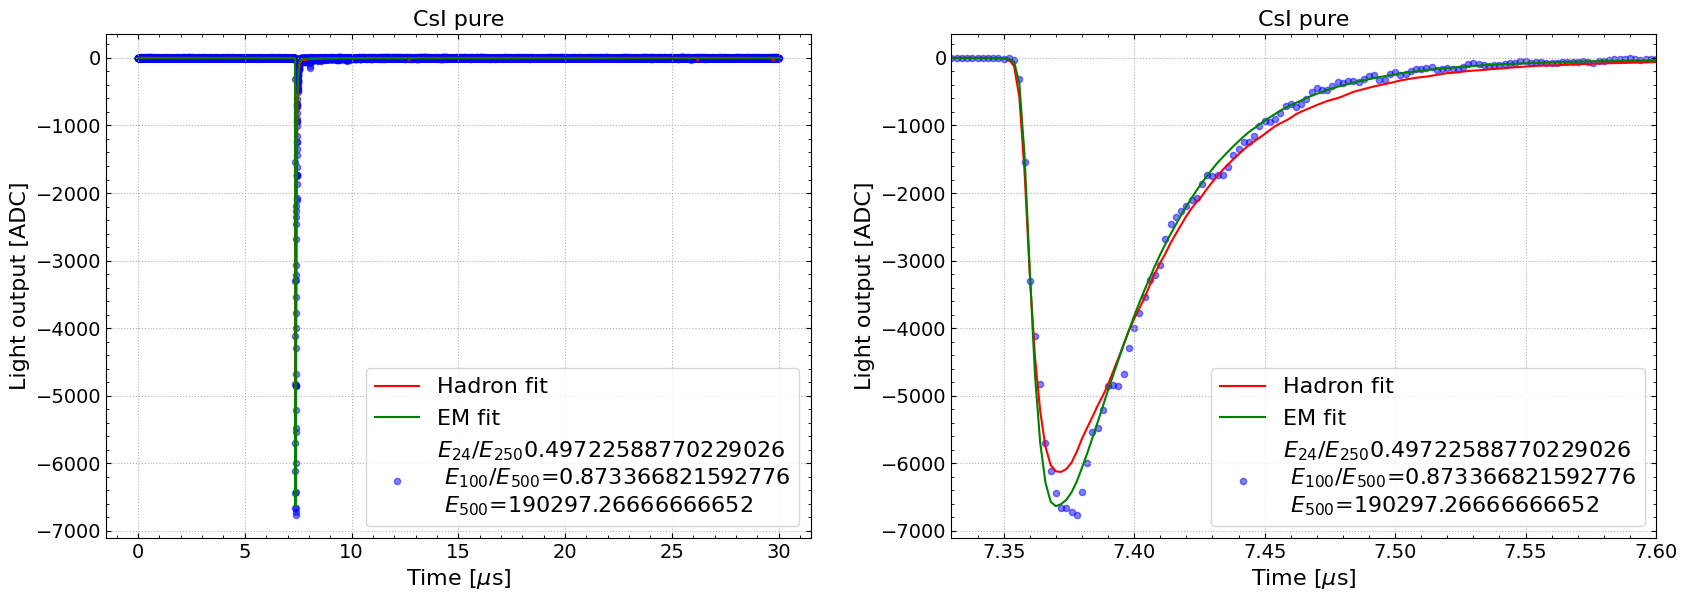

--------- 19 ---------------
-9403.104444444445
49053
delchi2 0.011683130079269409 chi2_EM 0.4710621738968492 chi2_Had 0.4827453039761186
wavedump_pure_XFELtesting_21-07-10_01-26-31


<string>:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_13-27-26.txt' mode='r' encoding='utf-8'>


-9403.104444444445 281044.00000000844


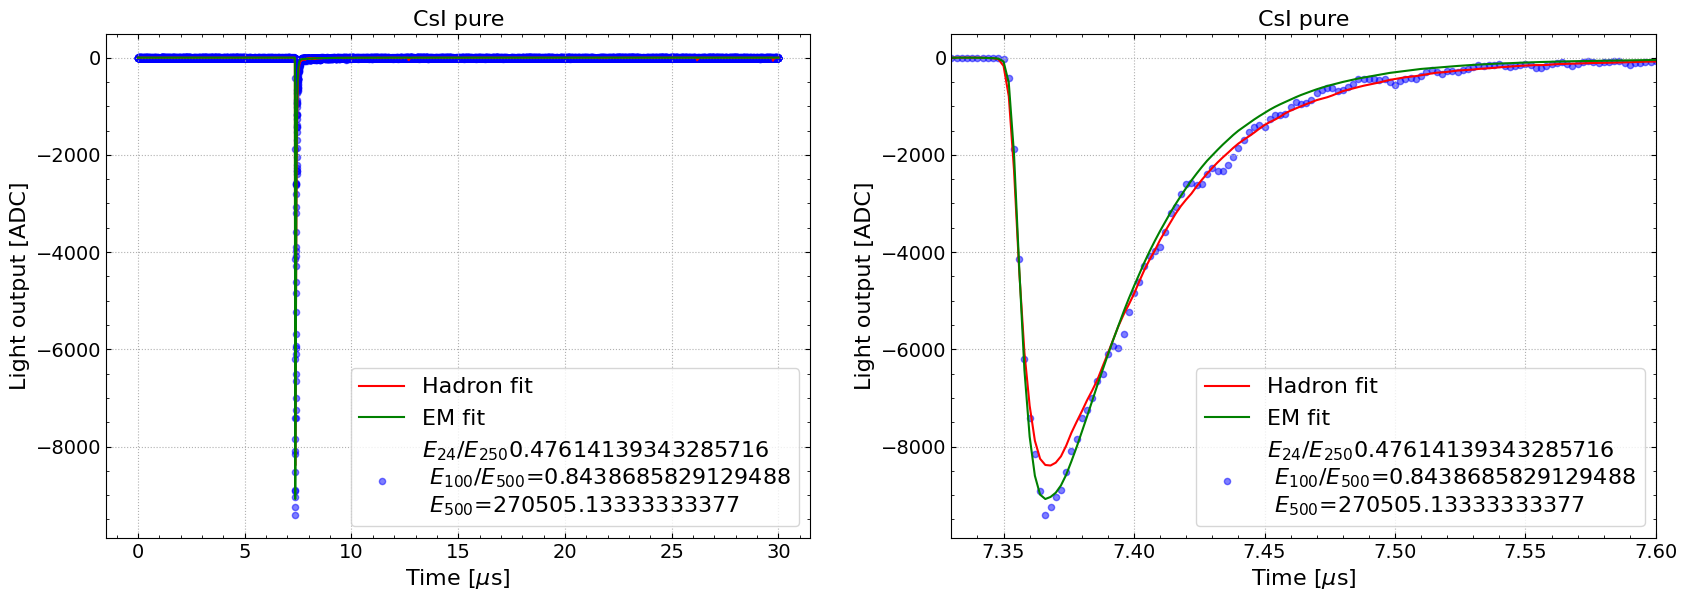

peak memory: 1026.00 MiB, increment: 29.70 MiB


In [18]:
%%memit
traces = np.zeros((20,15000))
j = random.sample(m, 20)
tem_arr = []
for n in range(len(j)): 
    print( '---------', n , '---------------')
    print(pure.data_min_PS_FT[j][n])
    wavenum = pure.waveform_number_PS_FT[j][n]-1
    print(wavenum)
#     print('HAD',pure.t0pil_Had_PS_FT[j][n]*fs,  pure.amppil_Had_PS_FT[j][n],   pure.chi2pil_Had_PS_FT[j][n]/1e7)
#     print('EM', pure.t0pil_EM_PS_FT[j][n]*fs,  pure.amppil_EM_PS_FT[j][n],   pure.chi2pil_EM_PS_FT[j][n]/1e7)
    print('delchi2', pure.deltachi2_PS_FT[j][n]/1e6, 'chi2_EM', pure.chi2_EM_PS_FT[j][n]/1e6,'chi2_Had', pure.chi2_Had_PS_FT[j][n]/1e6)
    print(pure.rundata_PS_FT[j][n].decode('utf-8'))
    if pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:20]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:19]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:25]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print(min(trace_3[0]), pure.Energy_MK_PS_FT[j][n])
#     print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1) , integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
#     print(trace_3.shape, min(trace_3[0]), pure.chi2_Had_PS_FT[j][n]/15000, pure.chi2_EM_PS_FT[j][n]/15000)
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
    lab= '$E_{24}/E_{250}$'+str(pure.CR_PS_FT[j][n])+'\n $E_{100}/E_{500}$='+str(pure.CR100_PS_FT[j][n])+'\n $E_{500}$='+str(pure.Energy_MK_500_PS_FT[j][n])
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label=lab, color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_PS_FT[j][n], color='blue' , alpha=0.5, s =20)
    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_PS_FT[j][n]*(1/2e-9))) , 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_PS_FT[j][n]*(1/2e-9))) , 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
#     plt.ylim(-1000,0)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(7.2/2e-3,7.6/2e-3)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.subplot(2,2,2)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label=lab, color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_PS_FT[j][n], color='blue' , alpha=0.5, s =20)
#     plt.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_PS_FT[j][n]*(1/2e-9))), 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_PS_FT[j][n]*(1/2e-9))), 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
    plt.xlim(7.33,7.6)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()
    traces[n]= trace_3


In [27]:
np.save('trace17.npy', traces[17])
# np.save('trace7_1.npy', traces[7])
# np.save('trace14.npy', traces[14])
# np.save('trace15.npy', traces[15])

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
np.savetxt('trace15.txt', traces[15])

In [44]:
np.savetxt('trace0.txt',trace_3[0])

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


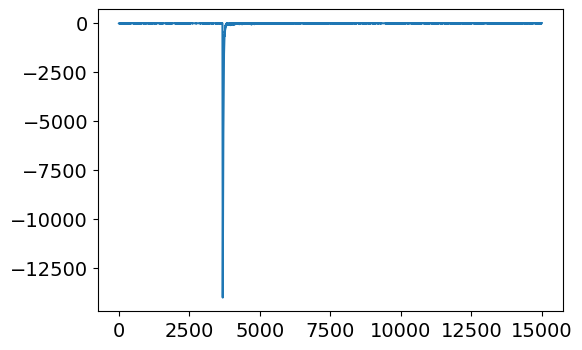

In [43]:
plt.plot(trace_3[0])

In [110]:
l , m = [], []


for i in range (len (pure.deltachi2_FT_removed)):
    if pure.deltachi2_FT_removed[i]<0:#-0.01e6 :
        l.append(i)
print(len(l))

        
for i in l:        
    if pure.amp_EM_FT_removed[i]>4000 and pure.amppil_Had_FT_removed[i] < 200 and pure.t0pil_Had_FT_removed[i]*fs < -4000:
        m.append(i)
print(len(l), len(m))
        
# for i in l:        
#     if pure.amp_EM_FT_removed[i]>4000 and pure.t0pil_Had_FT_removed[i]*fs < -4000:
#         m.append(i)
# print(len(l), len(m))

246945
246945 14055


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--------- 0 ---------------
4600 0.02133971796043071
HAD pileup -4128.0 118.39678402793037 0.01788807798554581
EM pileup 24.0 327.2634941983722 0.029600454242665157
delchi2 -0.2581598476942405 chi2_EM 0.4625654524307698 chi2_Had 0.2044056047365293
wavedump_pure_XFEL05_21-07-21_06-44-02


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL05/wavedump_pure_XFEL05_21-07-21_04-57-58.txt' mode='r' encoding='utf-8'>


-5962.407777777778


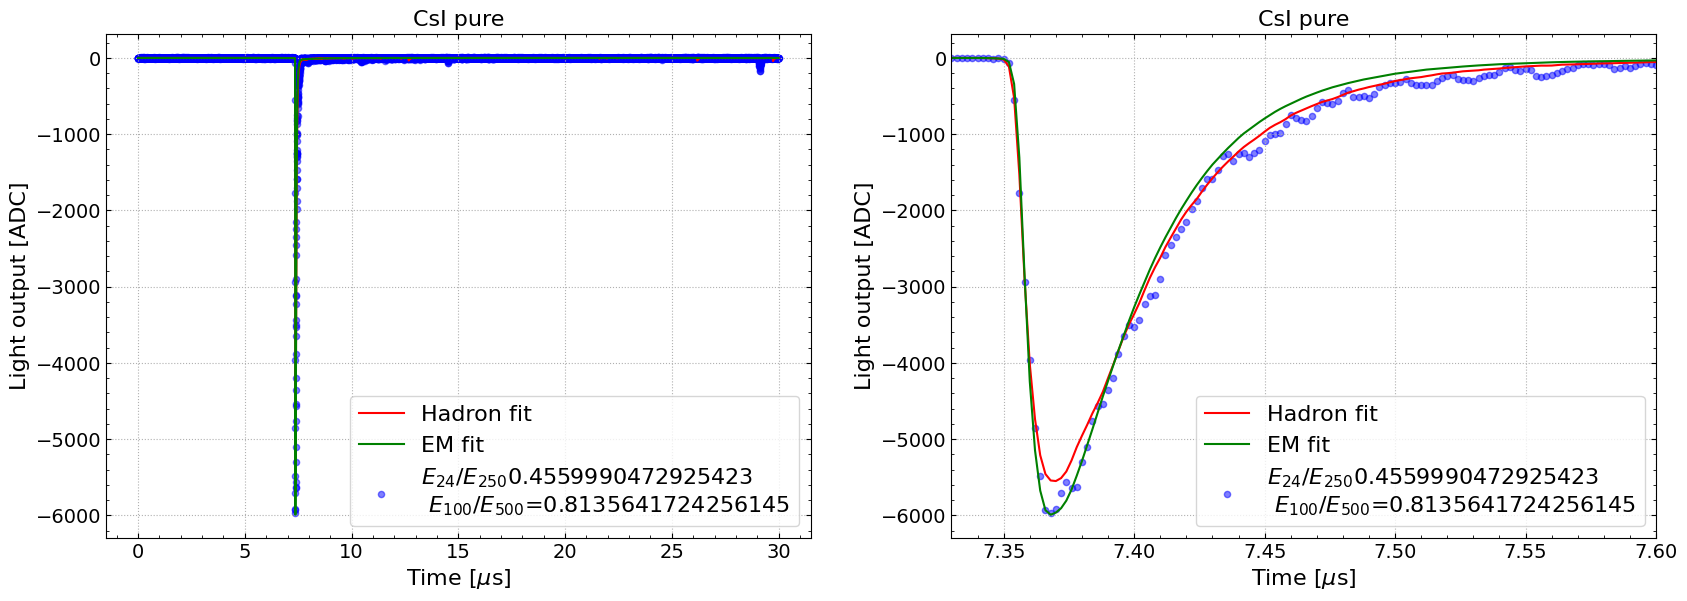

--------- 1 ---------------
839 0.024595374109082444
HAD pileup -4838.0 132.35552132021783 0.17006064186804531
EM pileup 18.0 314.1459972289208 0.18061918960235404
delchi2 -0.1177750067653805 chi2_EM 0.5199745819762498 chi2_Had 0.4021995752108693
wavedump_pure_XFEL06_21-07-26_17-33-11


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL05/wavedump_pure_XFEL05_21-07-21_06-44-02.txt' mode='r' encoding='utf-8'>


-6073.299999999999


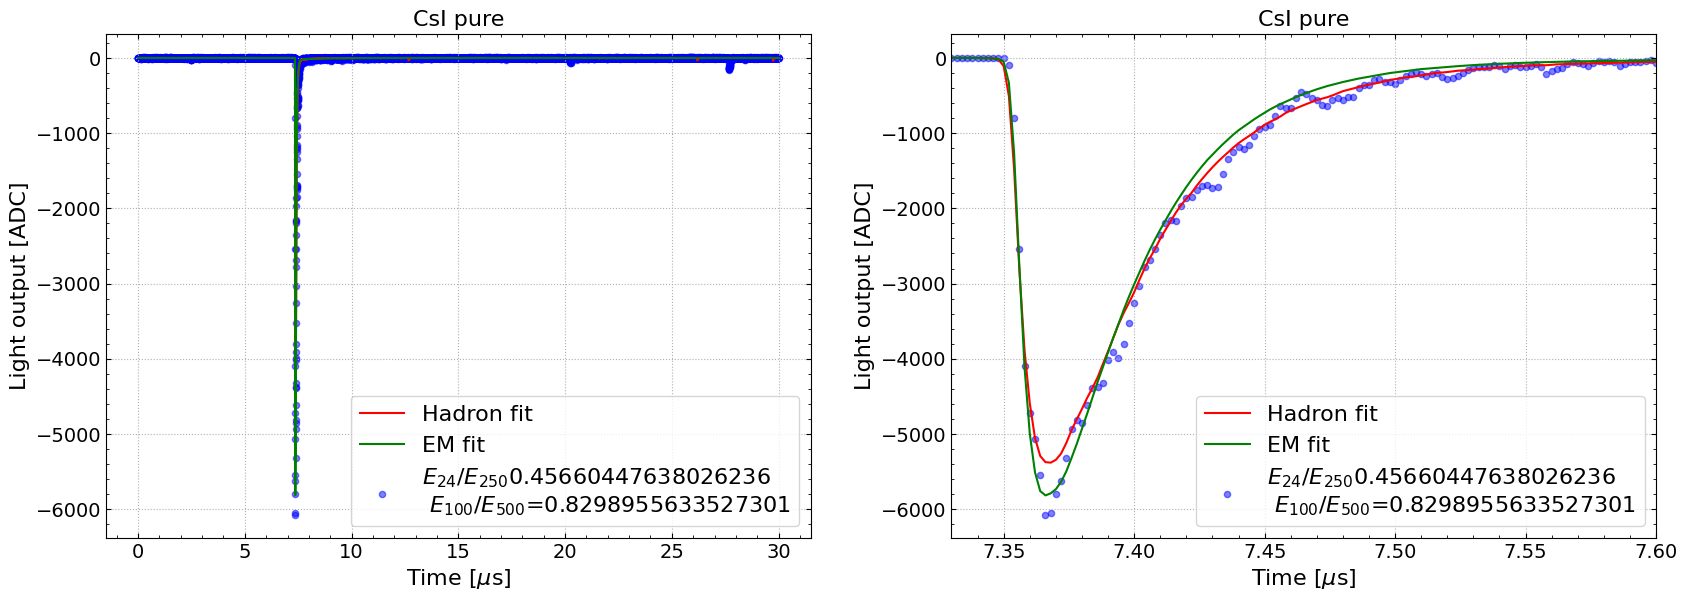

--------- 2 ---------------
2142 0.022968498366433544
HAD pileup -6118.0 183.93285560938153 0.03670301475280185
EM pileup 15.999999999999998 408.1947890898623 0.07249556436054473
delchi2 -0.5554496572076381 chi2_EM 0.984082765560612 chi2_Had 0.4286331083529741
wavedump_pure_XFEL04_21-07-17_08-57-37


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-26_17-33-11.txt' mode='r' encoding='utf-8'>


-8730.78


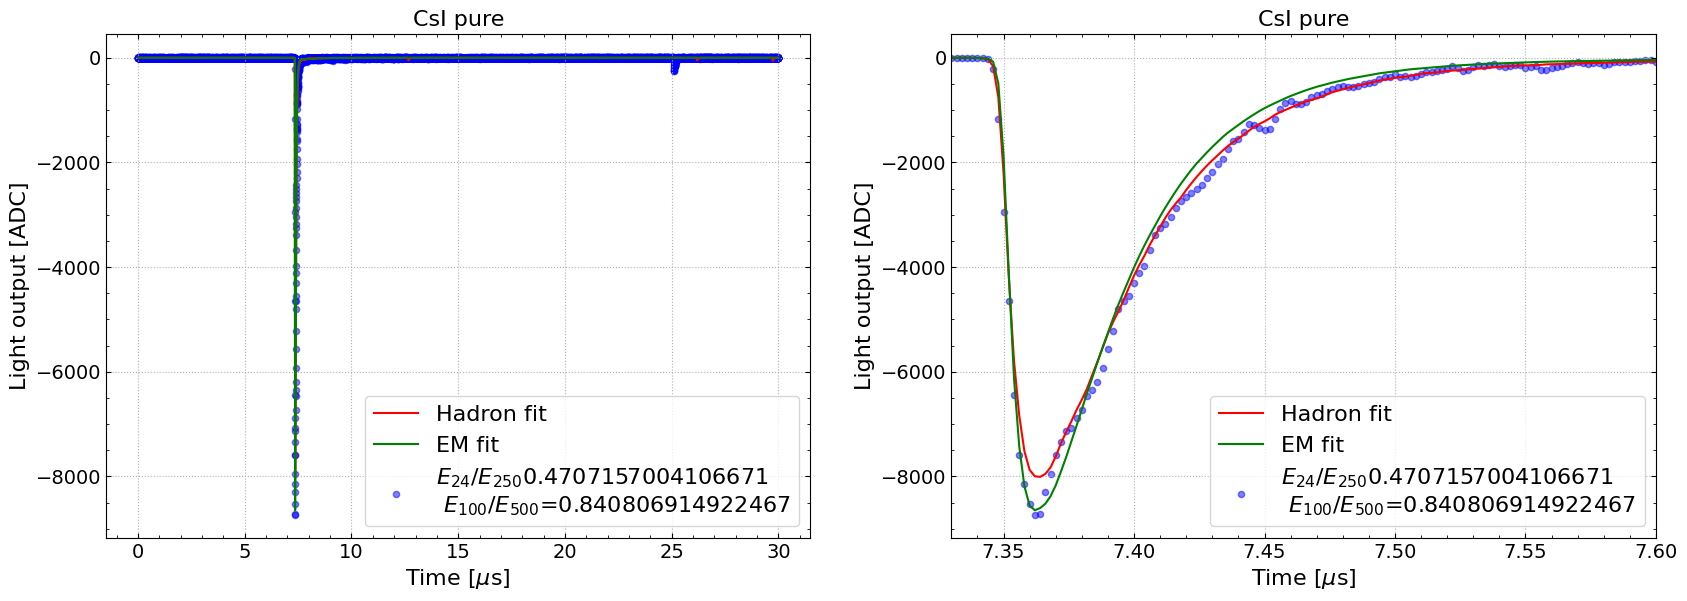

--------- 3 ---------------
4015 0.01929321328908101
HAD pileup -4147.0 156.83522279531456 0.3121739741927268
EM pileup 23.0 571.0065199029045 0.35739288907838307
delchi2 -0.5706450983653217 chi2_EM 1.1112056209004373 chi2_Had 0.5405605225351154
wavedump_pure_XFEL03_21-07-15_11-10-26


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL04/wavedump_pure_XFEL04_21-07-17_08-57-37.txt' mode='r' encoding='utf-8'>


-8864.083333333334


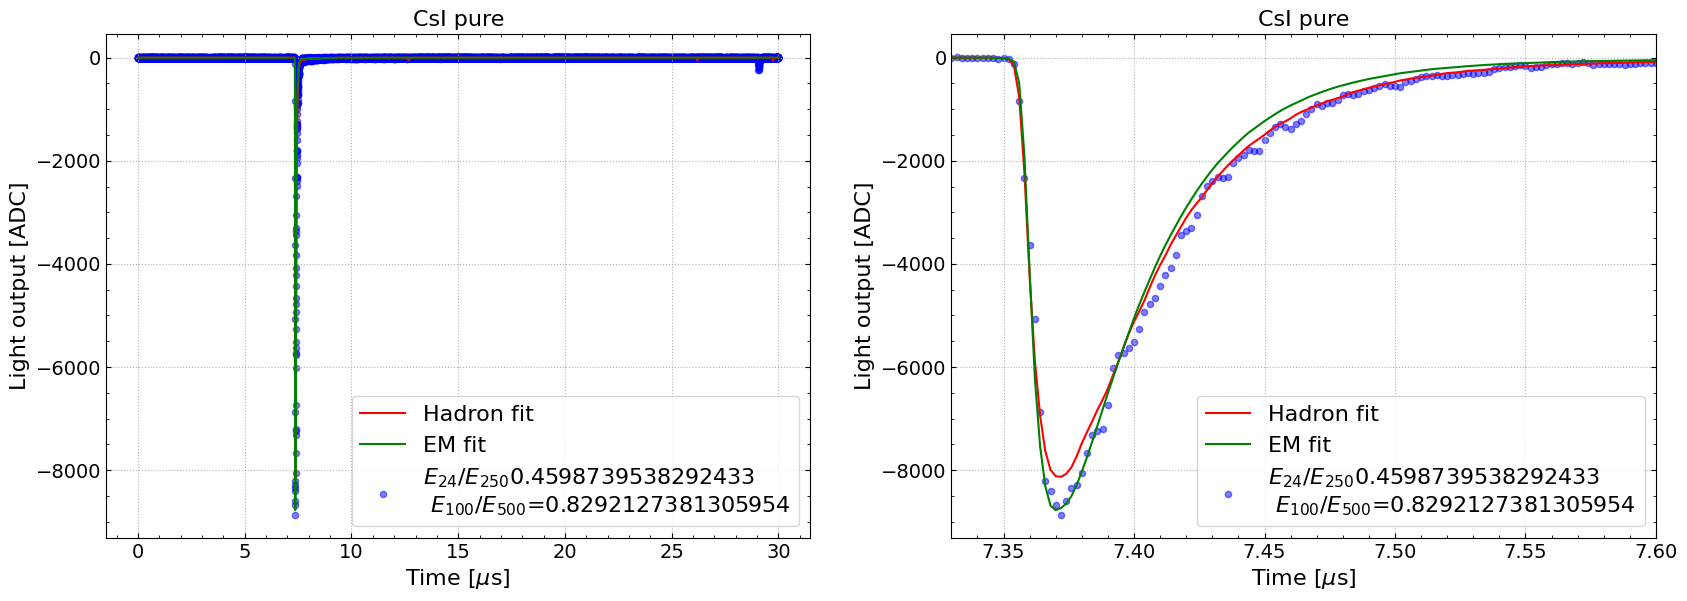

--------- 4 ---------------
963 0.029174002166410216
HAD pileup -4220.0 177.86583879026608 0.03327402782436807
EM pileup 22.0 305.3927009062289 0.042286555245464576
delchi2 -0.17756172655396163 chi2_EM 0.5679080484043211 chi2_Had 0.39034632185035945
wavedump_pure_XFEL05_21-07-20_18-36-48


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL03/wavedump_pure_XFEL03_21-07-15_11-10-26.txt' mode='r' encoding='utf-8'>


-6651.906666666666


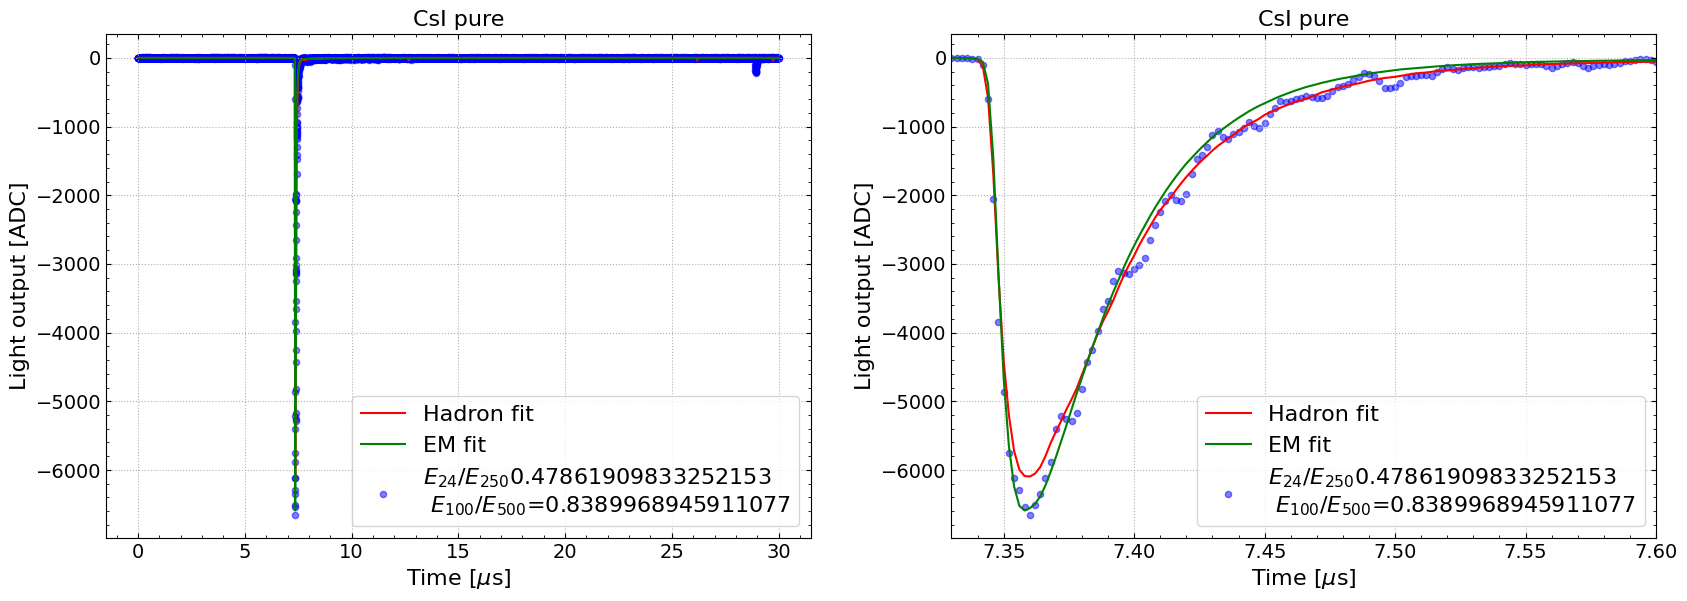

--------- 5 ---------------
3508 0.03484608128962488
HAD pileup -4164.0 137.4643690562019 0.05841010143954872
EM pileup 26.0 208.50364164425775 0.06126041466793397
delchi2 -0.049876816077895465 chi2_EM 0.2384077868354507 chi2_Had 0.1885309707575552
wavedump_pure_XFEL06_21-07-25_23-37-30


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL05/wavedump_pure_XFEL05_21-07-20_18-36-48.txt' mode='r' encoding='utf-8'>


-4369.357777777777


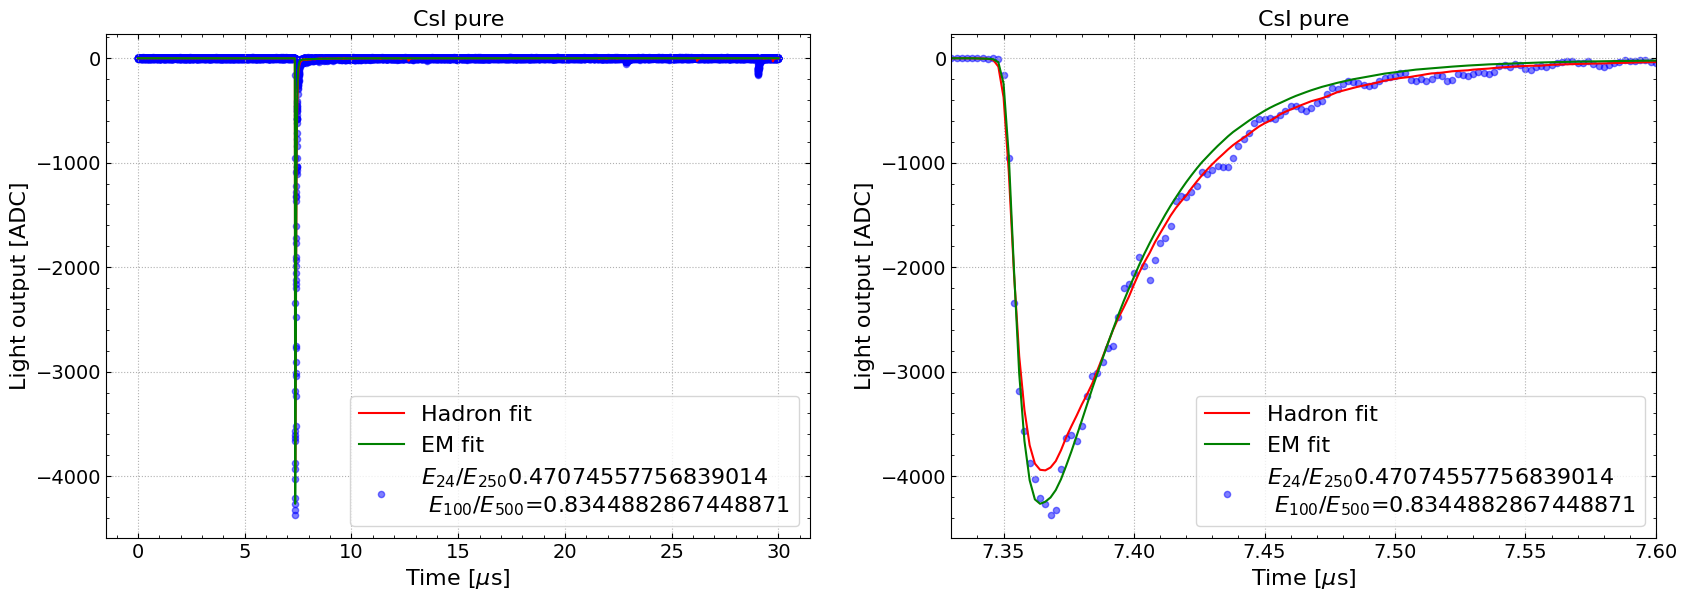

--------- 6 ---------------
4387 0.03755706337025251
HAD pileup -4254.0 197.1302729332292 0.035539215322338905
EM pileup 10.0 457.73678045747465 0.046671033916780166
delchi2 -0.36640178440642357 chi2_EM 0.7925542278854921 chi2_Had 0.42615244347906855
wavedump_pure_XFEL06_21-07-27_19-03-24


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-25_23-37-30.txt' mode='r' encoding='utf-8'>


-5638.381111111112


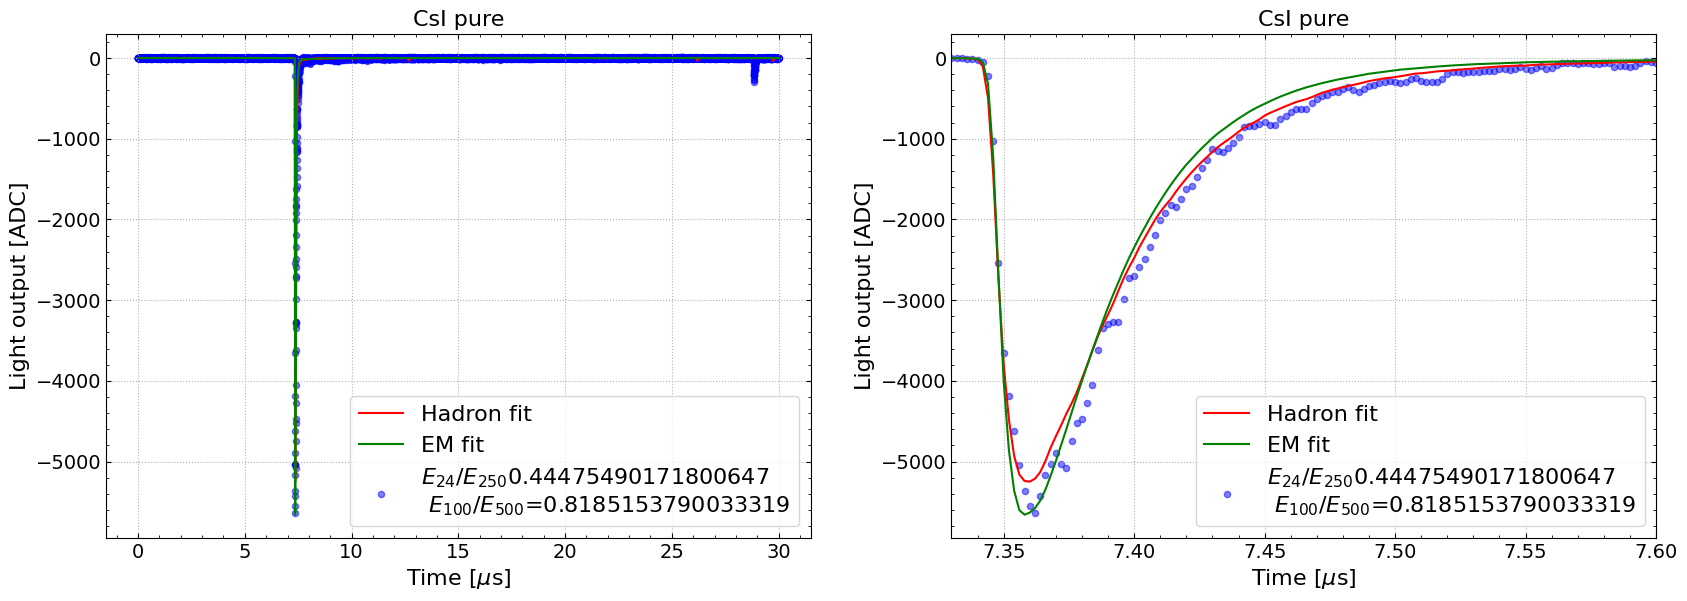

--------- 7 ---------------
720 0.021475222276198074
HAD pileup -5673.0 145.6659996943073 0.027111237686910514
EM pileup 30.0 434.3629917569377 0.0461954167263415
delchi2 -0.445621014386341 chi2_EM 0.755370030842498 chi2_Had 0.309749016456157
wavedump_pure_XFEL06_21-07-28_01-22-09


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-27_19-03-24.txt' mode='r' encoding='utf-8'>


-7206.2011111111115


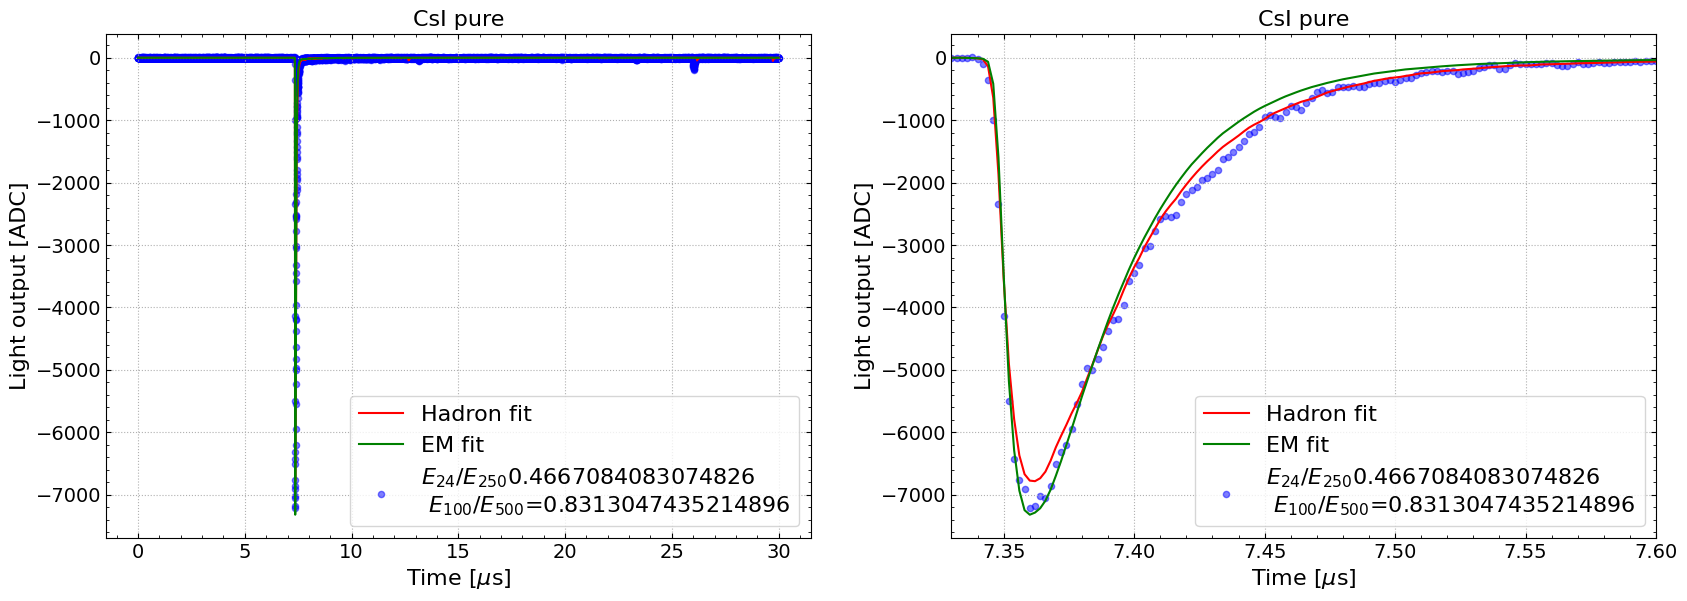

--------- 8 ---------------
1104 0.026914038192863133
HAD pileup -6109.0 136.74767480556173 0.029207245327084193
EM pileup 15.999999999999998 379.5319980078689 0.027799575776114315
delchi2 -0.17588664341104776 chi2_EM 0.5020095470388308 chi2_Had 0.32612290362778307
wavedump_pure_XFEL07_21-07-29_00-23-19


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-28_01-22-09.txt' mode='r' encoding='utf-8'>


-5400.082222222221


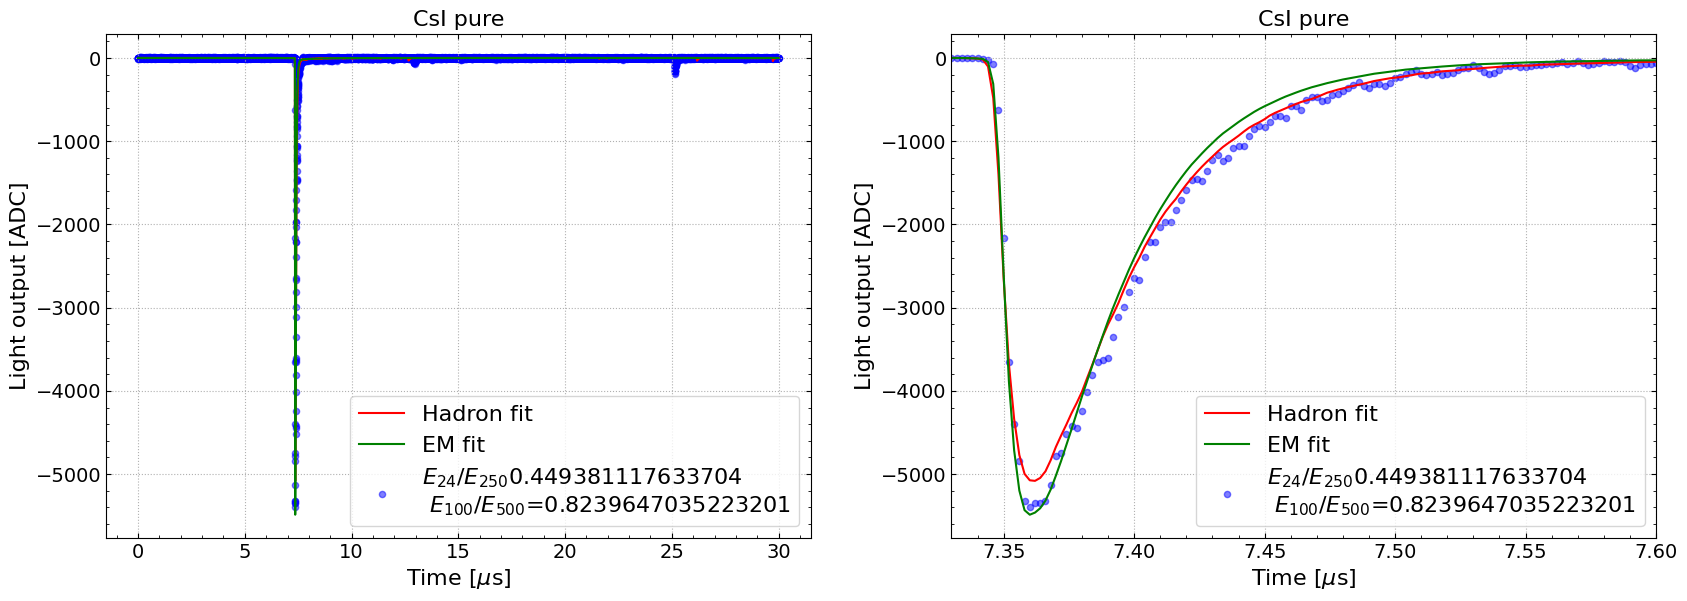

--------- 9 ---------------
427 0.009448402444248678
HAD pileup -7472.0 114.56046510200277 0.4389611145940492
EM pileup 23.0 673.2298645036049 0.4747304552177307
delchi2 -0.8372259014537037 chi2_EM 1.412928187283218 chi2_Had 0.5757022858295142
wavedump_pure_XFEL05_21-07-21_13-02-47


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL07/wavedump_pure_XFEL07_21-07-29_00-23-19.txt' mode='r' encoding='utf-8'>


-12741.531111111111


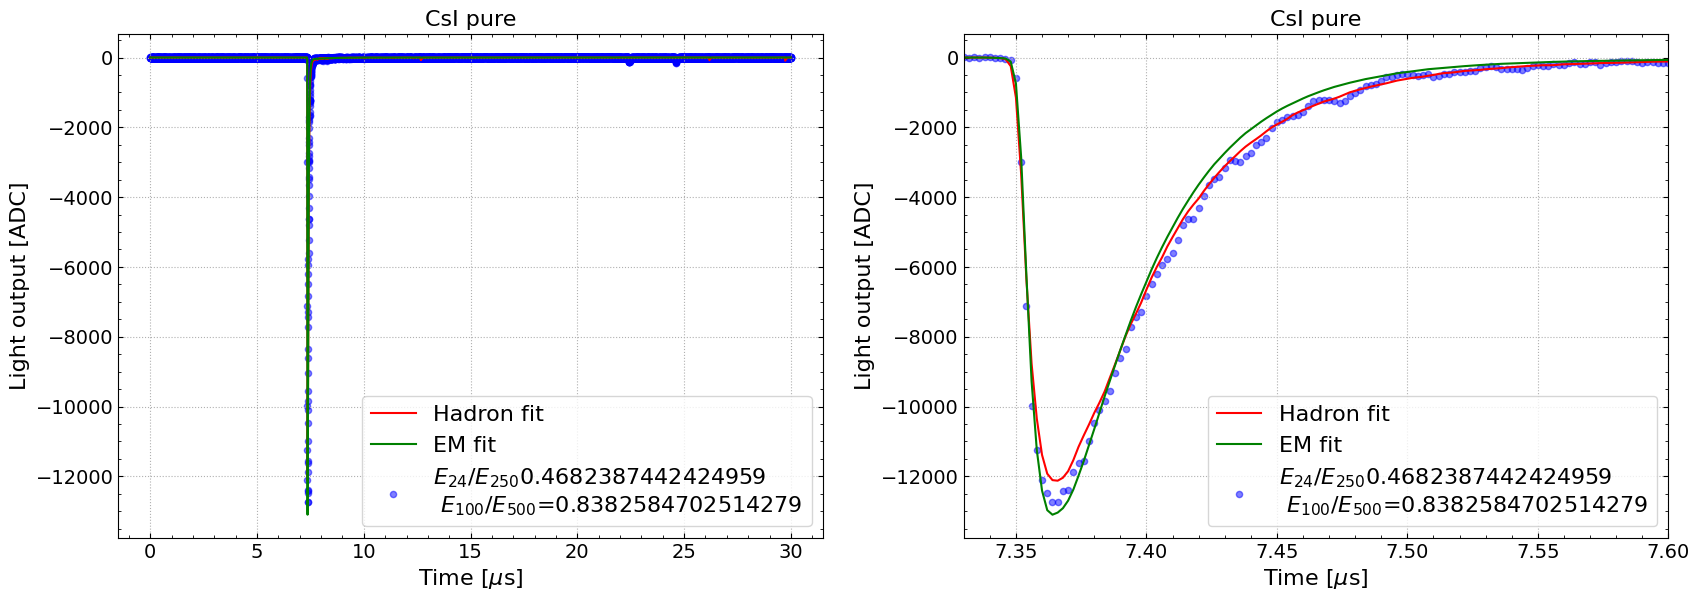

--------- 10 ---------------
3459 0.04341028053695525
HAD pileup -5463.0 181.34214175843425 0.014715861597020765
EM pileup 19.0 224.62534305420513 0.029698478656088618
delchi2 -0.16841487761846557 chi2_EM 0.3754533073170744 chi2_Had 0.2070384296986088
wavedump_pure_XFEL06_21-07-26_17-33-11


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL05/wavedump_pure_XFEL05_21-07-21_13-02-47.txt' mode='r' encoding='utf-8'>


-4535.1833333333325


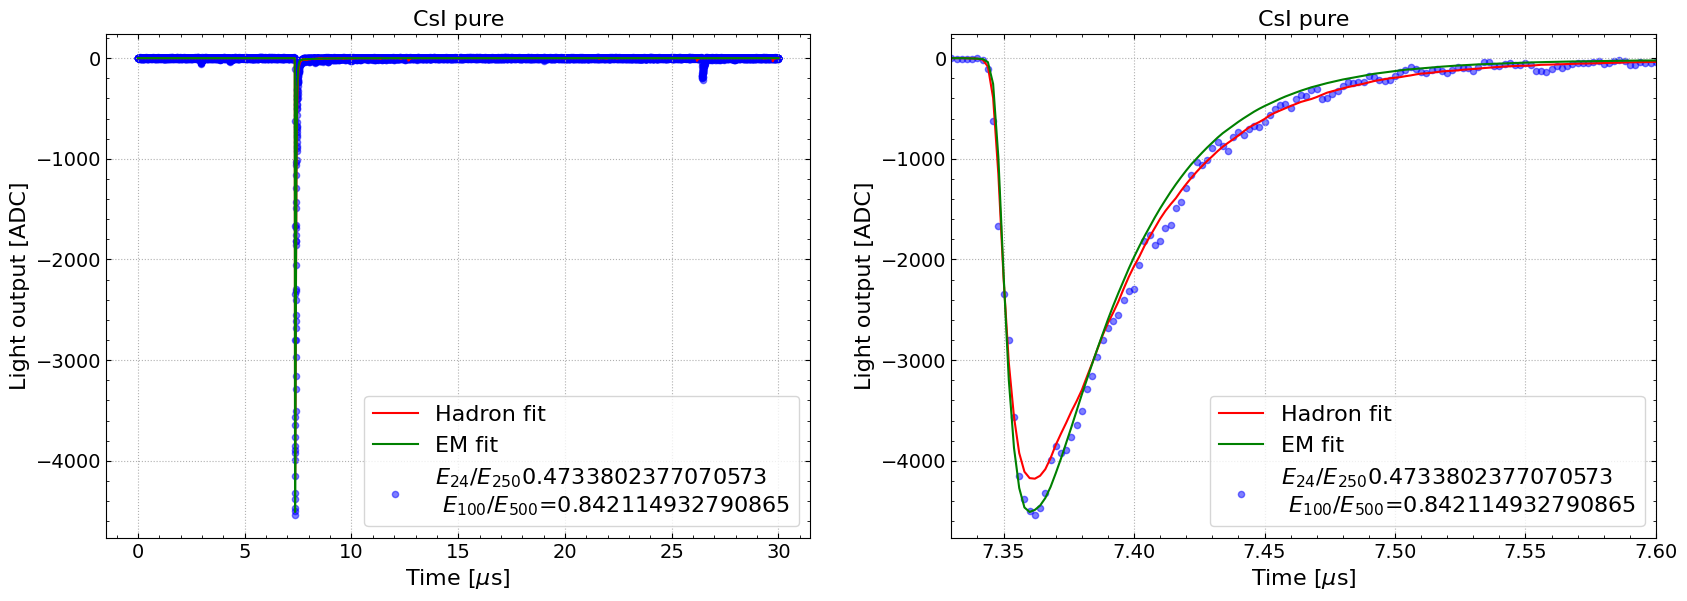

--------- 11 ---------------
4671 0.023012556993634282
HAD pileup -5026.0 164.17586069007876 0.13848953276791656
EM pileup 20.0 461.86800581610714 0.1892543544576248
delchi2 -0.6599049586976766 chi2_EM 1.0987428116652667 chi2_Had 0.4388378529675901
wavedump_pure_XFEL04_21-07-17_23-21-12


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-26_17-33-11.txt' mode='r' encoding='utf-8'>


-8079.892222222223


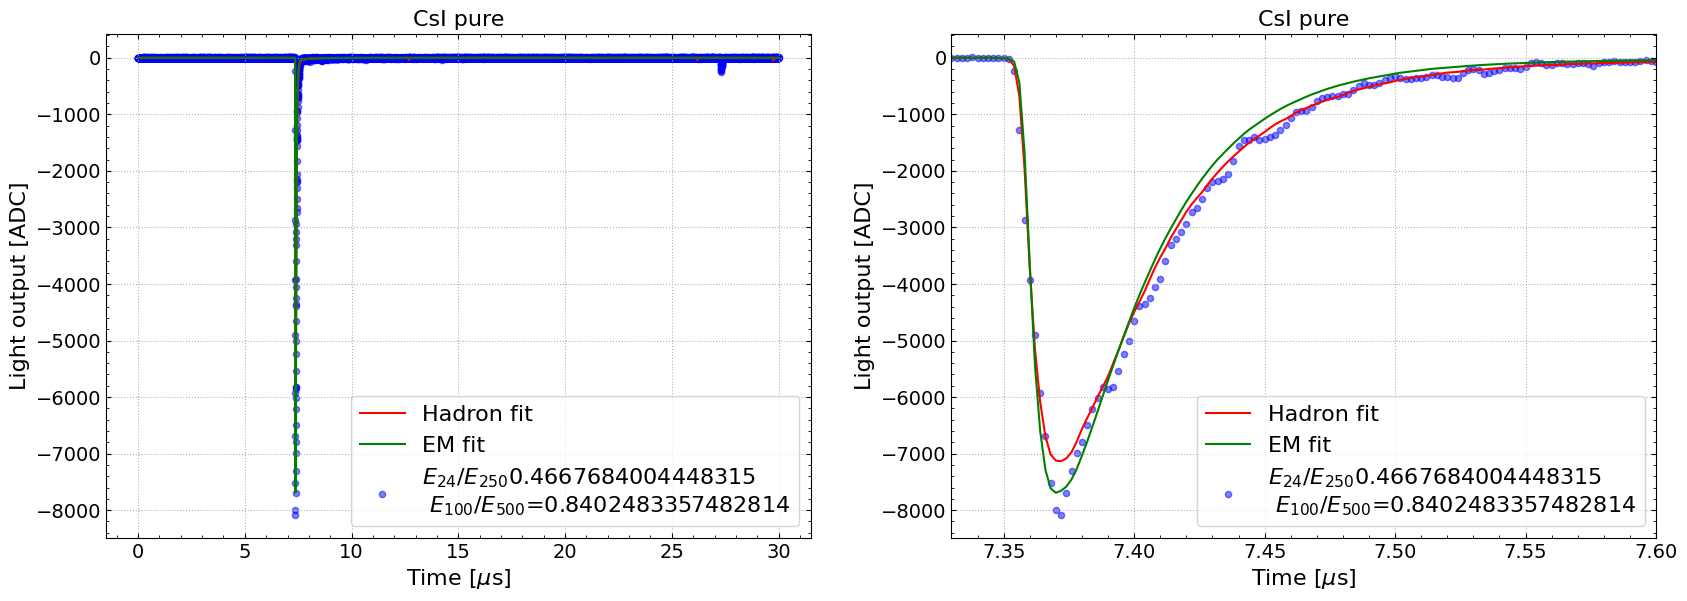

--------- 12 ---------------
4432 0.03411308521712282
HAD pileup -4257.0 171.2182621271042 0.16513188565720813
EM pileup 18.0 391.06059841047863 0.18261646357298777
delchi2 -0.2403774131802842 chi2_EM 0.5839019688917696 chi2_Had 0.34352455571148544
wavedump_pure_XFEL04_21-07-18_22-19-54


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL04/wavedump_pure_XFEL04_21-07-17_23-21-12.txt' mode='r' encoding='utf-8'>


-5392.583333333334


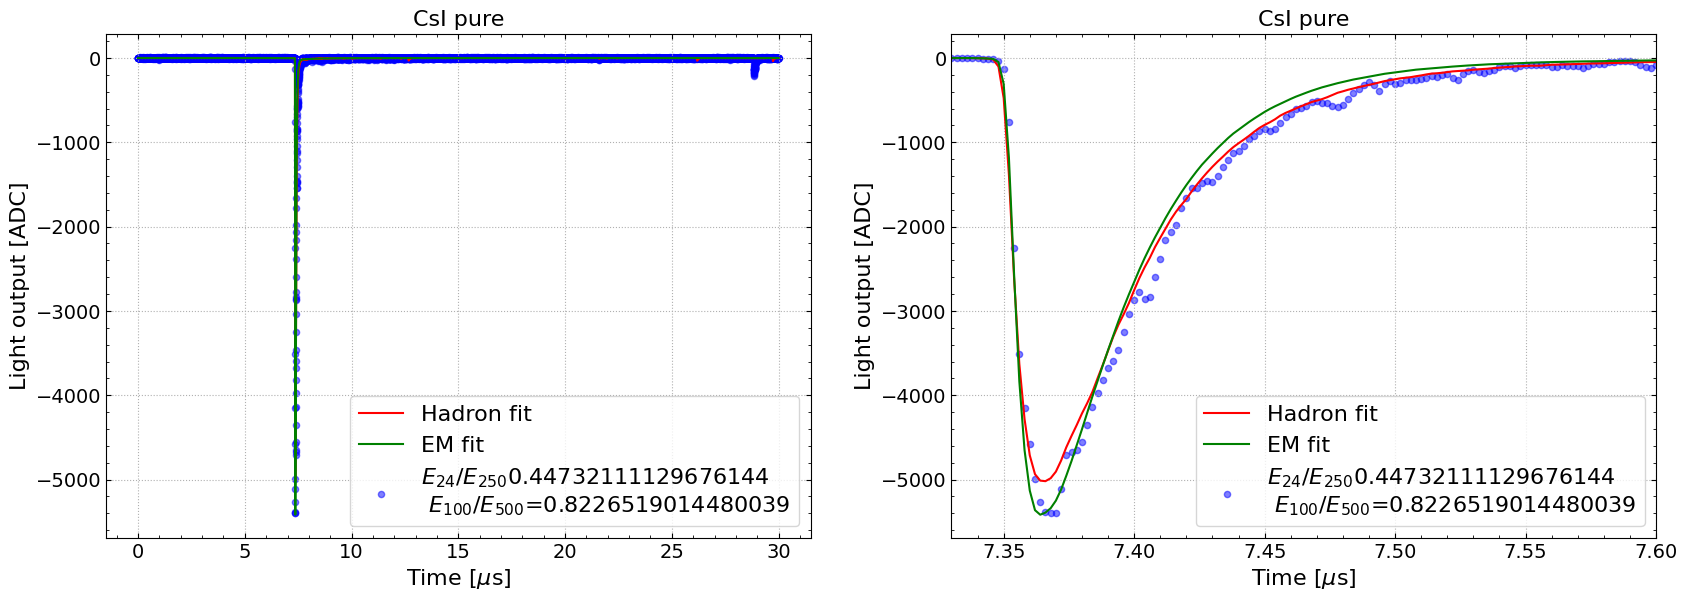

--------- 13 ---------------
28582 0.02242241427457471
HAD pileup -5248.0 86.12009970343418 0.03981291405468058
EM pileup 20.0 186.33094165994703 0.04936830127873034
delchi2 -0.08490527168811113 chi2_EM 0.274652852639433 chi2_Had 0.18974758095132188
wavedump_pure_XFELtesting_21-07-10_09-27-08


<string>:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL04/wavedump_pure_XFEL04_21-07-18_22-19-54.txt' mode='r' encoding='utf-8'>


-4305.127777777778


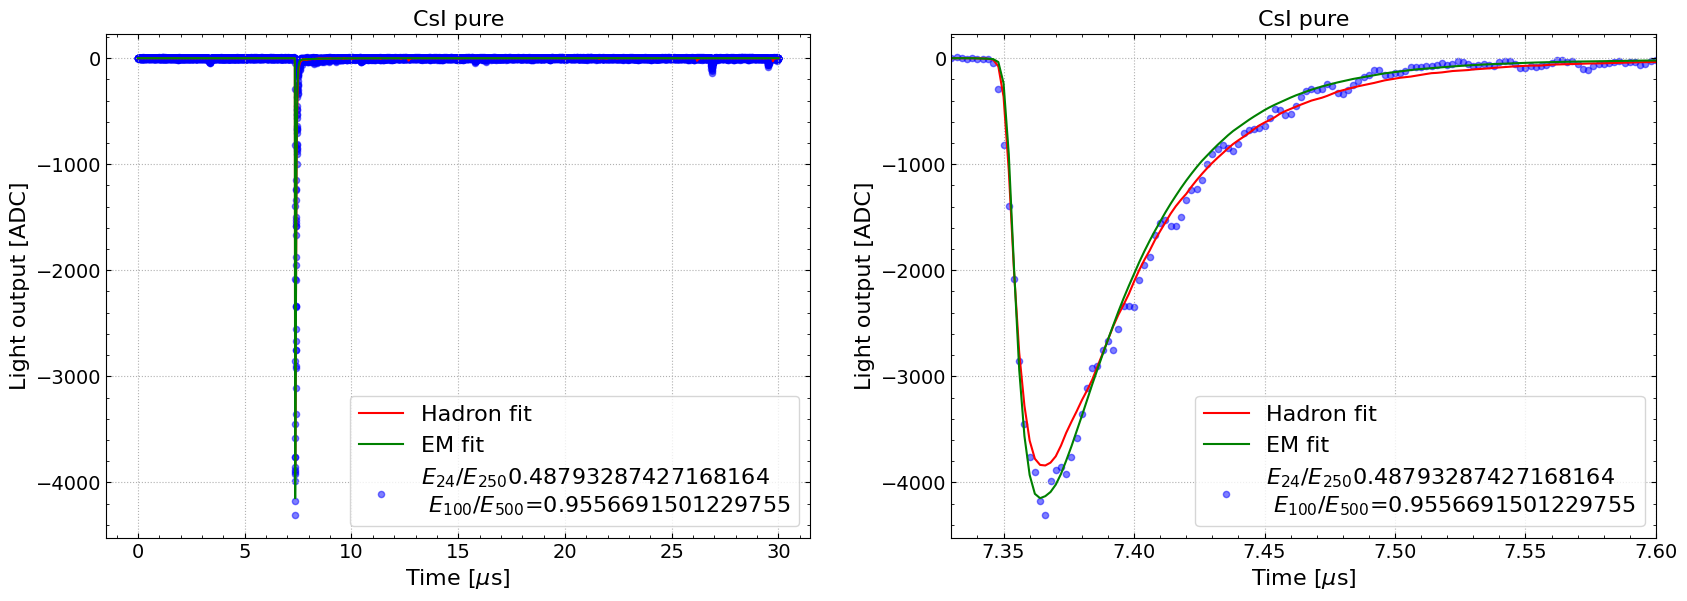

--------- 14 ---------------
2934 0.017972602266638143
HAD pileup -6563.0 135.2848283197212 0.05486650177181289
EM pileup -6565.0 485.21457009017627 0.09146460312076168
delchi2 -0.6987938621163815 chi2_EM 1.2807847232171745 chi2_Had 0.5819908611007929
wavedump_pure_XFEL06_21-07-28_04-54-16


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-10_09-27-08.txt' mode='r' encoding='utf-8'>


-7886.962222222222


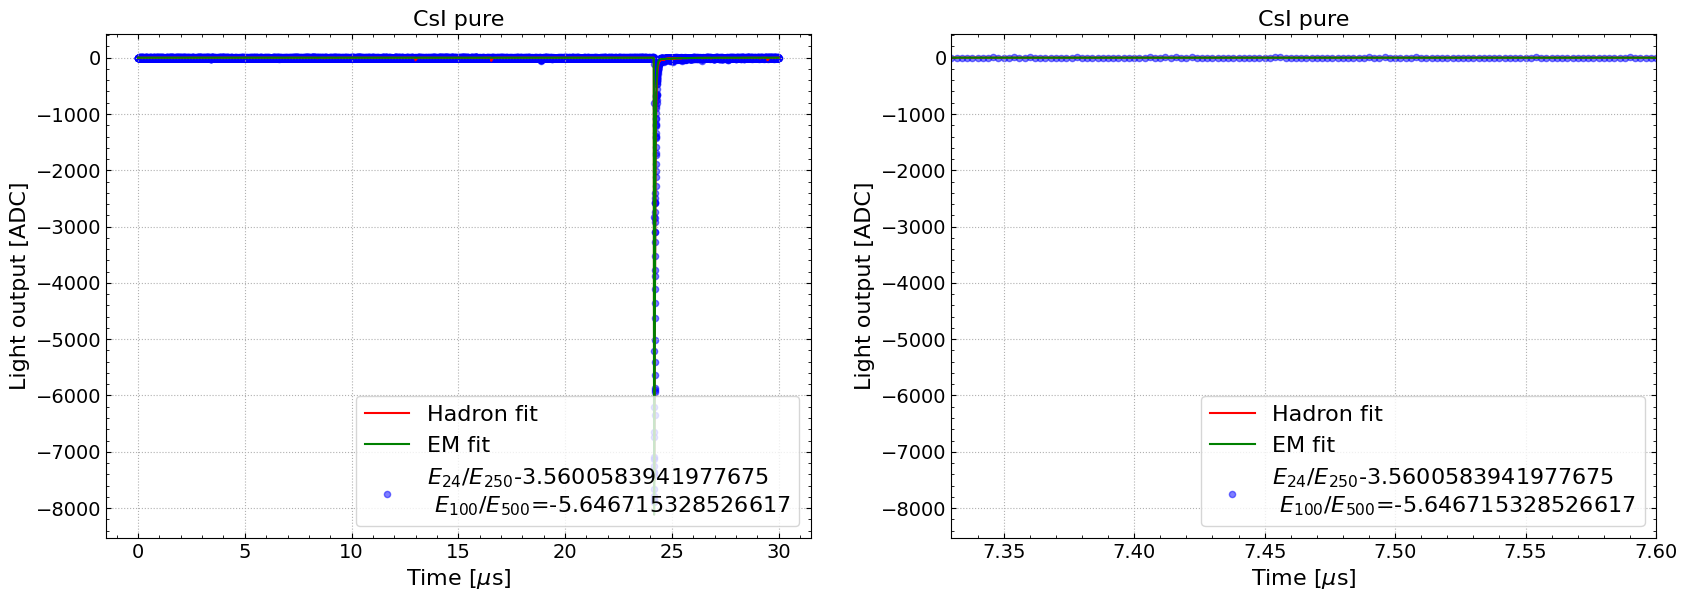

--------- 15 ---------------
1106 0.032837994807721524
HAD pileup -5779.0 189.09273446865646 0.11787022430157676
EM pileup 39.0 338.04492502020554 0.16757503533650173
delchi2 -0.4932309951070249 chi2_EM 0.9958742382035628 chi2_Had 0.5026432430965379
wavedump_pure_XFEL07_21-07-30_20-49-49


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-28_04-54-16.txt' mode='r' encoding='utf-8'>


-6229.602222222222


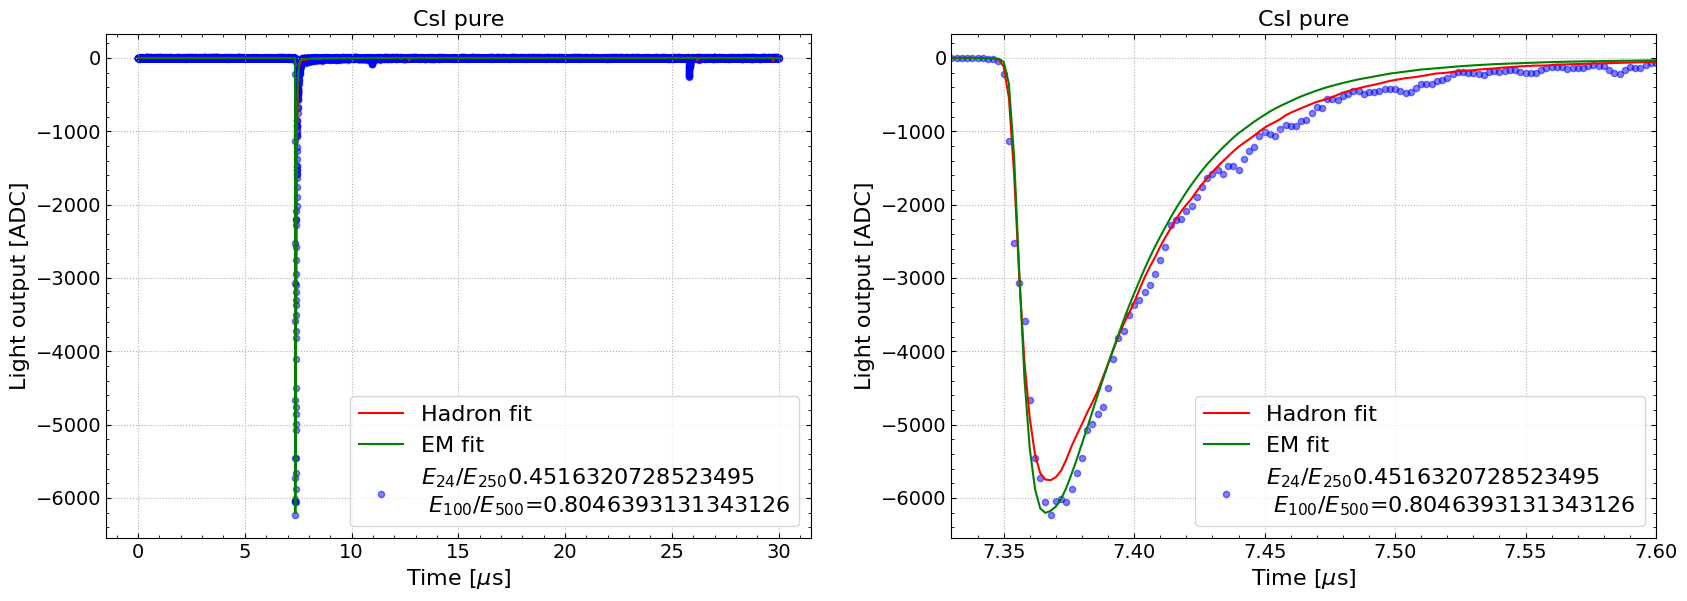

--------- 16 ---------------
54674 0.03876119157284162
HAD pileup -7006.0 187.76179050521006 0.1514510302952512
EM pileup 18.0 397.2834023188543 0.17086092827353497
delchi2 -0.2548063428444639 chi2_EM 0.6619444458102509 chi2_Had 0.40713810296578706
wavedump_pure_XFELtesting_21-07-09_17-25-55


<string>:20: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL07/wavedump_pure_XFEL07_21-07-30_20-49-49.txt' mode='r' encoding='utf-8'>


-5151.84


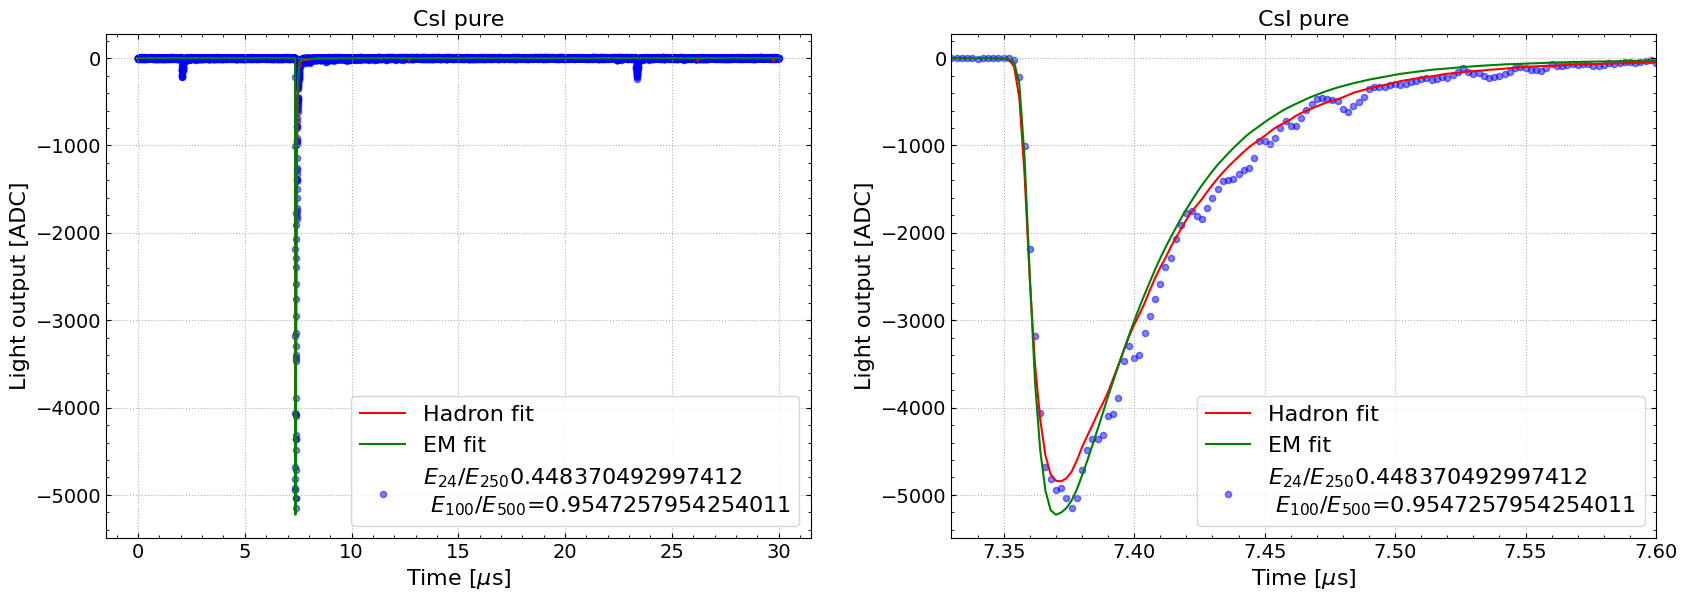

--------- 17 ---------------
436 0.03224134132692025
HAD pileup -6293.0 162.05504709002184 0.020386972517583153
EM pileup 23.0 263.61406858765645 0.02099278332409016
delchi2 -0.06631075441568345 chi2_EM 0.31800031555665287 chi2_Had 0.2516895611409694
wavedump_pure_XFEL06_21-07-27_01-38-01


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFELtesting/wavedump_pure_XFELtesting_21-07-09_17-25-55.txt' mode='r' encoding='utf-8'>


-5301.805555555555


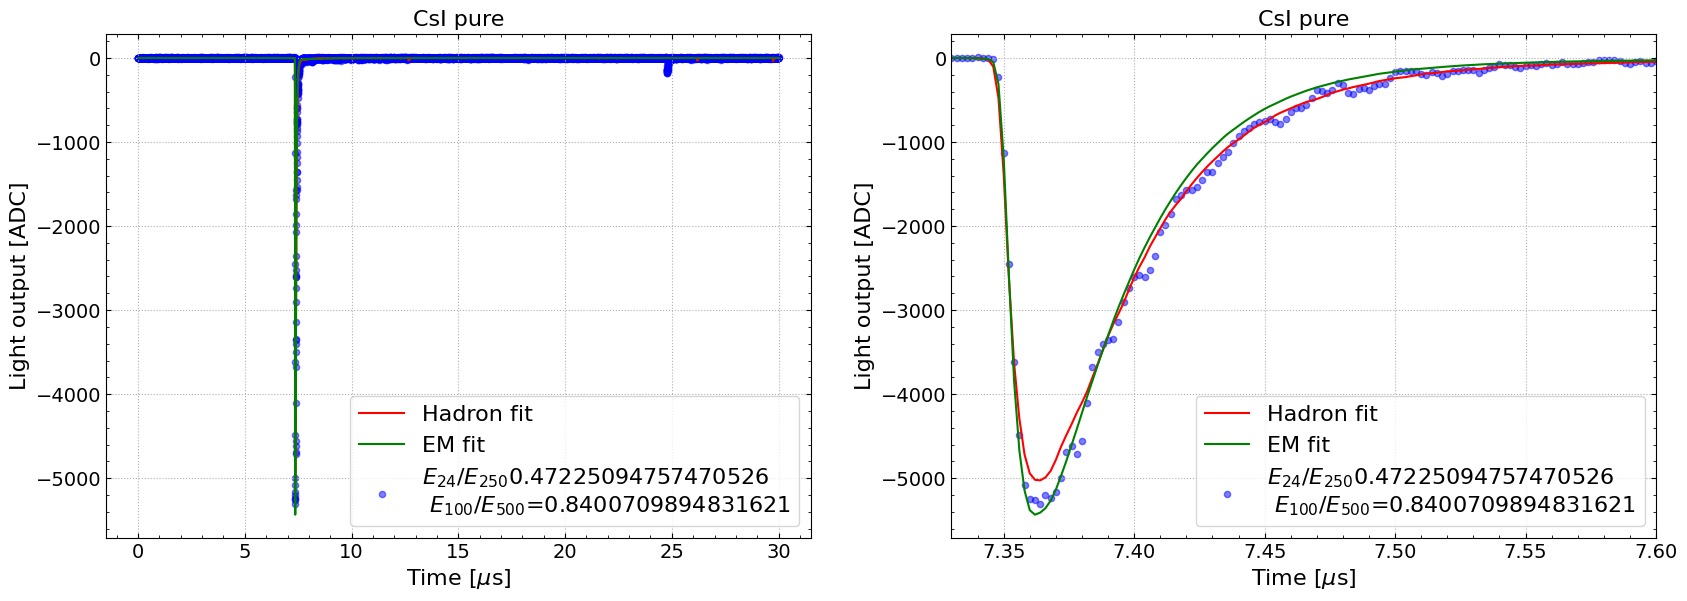

--------- 18 ---------------
4042 0.017829567870367956
HAD pileup -6564.0 172.19654023982812 0.06586229287765193
EM pileup 14.0 638.5300951140875 0.09553287529000398
delchi2 -0.8767886308224201 chi2_EM 1.589403856346935 chi2_Had 0.712615225524515
wavedump_pure_XFEL05_21-07-21_23-23-58


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL06/wavedump_pure_XFEL06_21-07-27_01-38-01.txt' mode='r' encoding='utf-8'>


-10302.201111111111


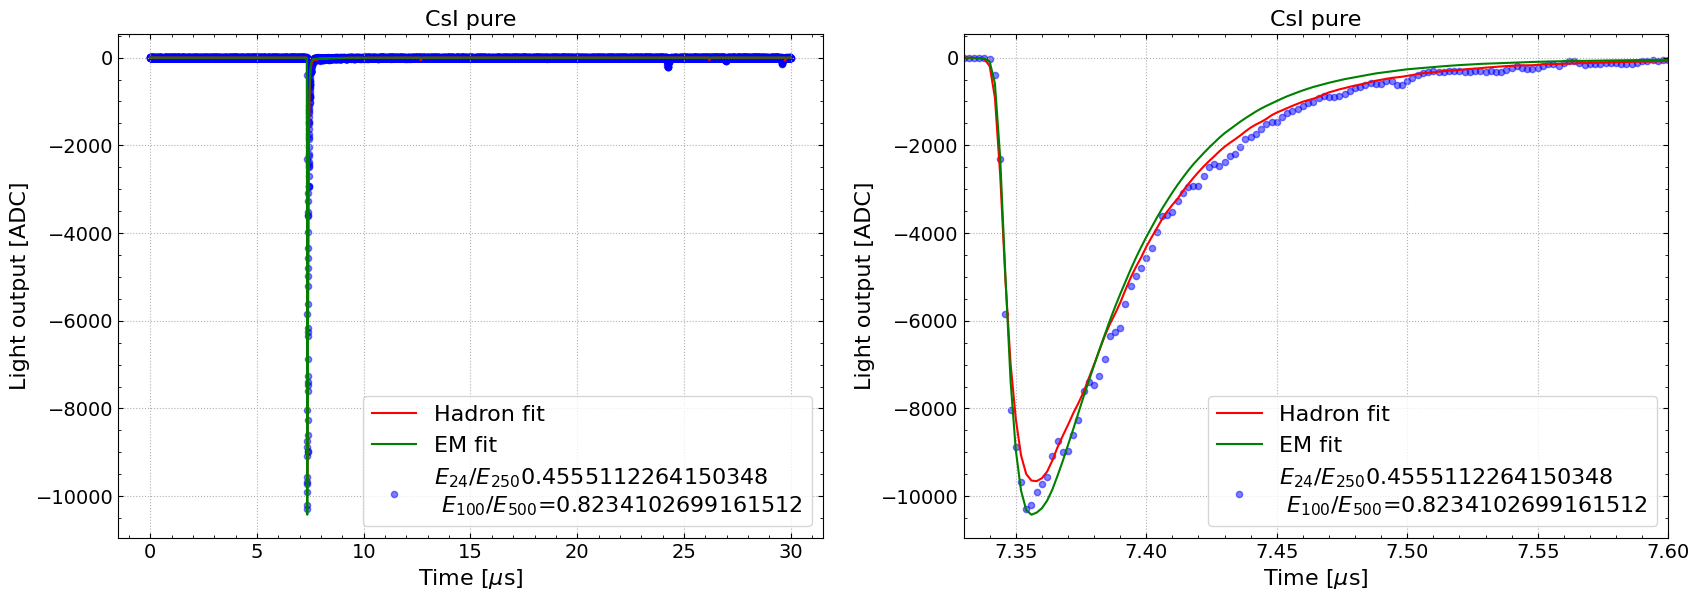

--------- 19 ---------------
391 0.03770554935383782
HAD pileup -4145.0 140.58510664520233 0.05835312291509449
EM pileup 34.0 259.87853752742774 0.07045691185122696
delchi2 -0.15895916606368496 chi2_EM 0.3537078471834287 chi2_Had 0.19474868111974372
wavedump_pure_XFEL06_21-07-26_07-27-10


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/wavedumpdata/XFEL05/wavedump_pure_XFEL05_21-07-21_23-23-58.txt' mode='r' encoding='utf-8'>


-4053.9577777777777


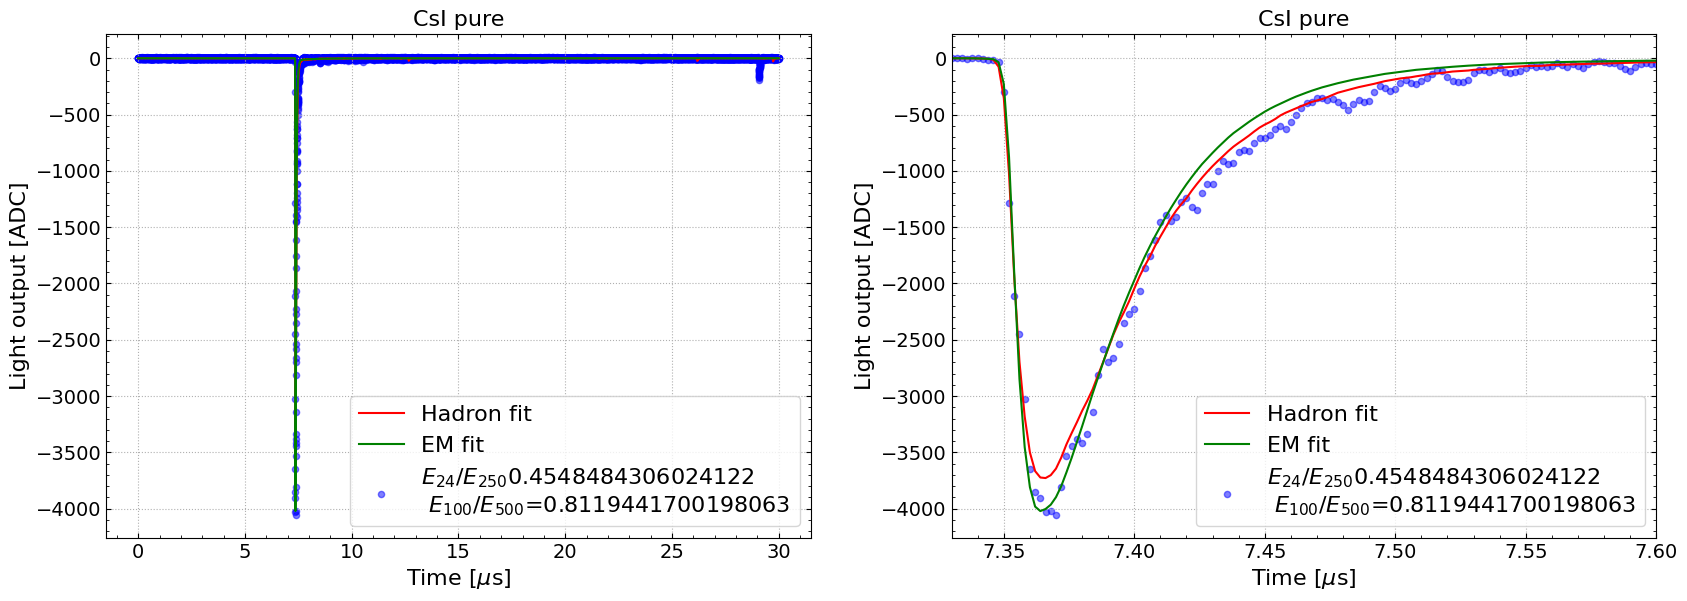

peak memory: 5068.47 MiB, increment: 0.00 MiB


In [111]:
%%memit
traces = np.zeros((20,15000))
j = random.sample(m, 20)
tem_arr = []
for n in range(len(j)): 
    print( '---------', n , '---------------')
    wavenum = pure.waveform_number_FT_removed[j][n]-1
    print(wavenum, pure.amppil_Had_FT_removed[j][n]/pure.amp_Had_FT_removed[j][n])
    print('HAD pileup',pure.t0pil_Had_FT_removed[j][n]*fs,  pure.amppil_Had_FT_removed[j][n],   pure.chi2pil_Had_FT_removed[j][n]/1e7)
    print('EM pileup', pure.t0pil_EM_FT_removed[j][n]*fs,  pure.amppil_EM_FT_removed[j][n],   pure.chi2pil_EM_FT_removed[j][n]/1e7)
    print('delchi2', pure.deltachi2_FT_removed[j][n]/1e6, 'chi2_EM', pure.chi2_EM_FT_removed[j][n]/1e6,'chi2_Had', pure.chi2_Had_FT_removed[j][n]/1e6)
    print(pure.rundata_FT_removed[j][n].decode('utf-8'))
    if pure.rundata_FT_removed[j][n].decode('utf-8')[14:19] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_FT_removed[j][n].decode('utf-8')[14:20]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif pure.rundata_FT_removed[j][n].decode('utf-8')[14:19] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_FT_removed[j][n].decode('utf-8')[14:19]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/wavedumpdata/'+pure.rundata_FT_removed[j][n].decode('utf-8')[14:25]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print(min(trace_3[0]))
#     print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1) , integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
#     print(trace_3.shape, min(trace_3[0]), pure.chi2_Had_FT_removed[j][n]/15000, pure.chi2_EM_FT_removed[j][n]/15000)
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
    lab= '$E_{24}/E_{250}$'+str(pure.CR_FT_removed[j][n])+'\n $E_{100}/E_{500}$='+str(pure.CR100_FT_removed[j][n])
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label=lab, color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_FT_removed[j][n], color='blue' , alpha=0.5, s =20)
    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_FT_removed[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_FT_removed[j][n]*(1/2e-9))) , 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_FT_removed[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_FT_removed[j][n]*(1/2e-9))) , 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
#     plt.ylim(-1000,0)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(7.2/2e-3,7.6/2e-3)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.subplot(2,2,2)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Signal %s'%m[n], color='blue' , alpha=0.5, s =20)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label=lab, color='blue' , alpha=0.5, s =20)
#     plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Charge ratio %0.4f'% pure.CR_FT_removed[j][n], color='blue' , alpha=0.5, s =20)
#     plt.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
    plt.plot(np.arange(15000)*2e-3, pure.amp_Had_FT_removed[j][n]*np.roll(TemplateHAD_p, round(pure.t0_Had_FT_removed[j][n]*(1/2e-9))), 
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, pure.amp_EM_FT_removed[j][n]*np.roll(TemplateEM_p, round(pure.t0_EM_FT_removed[j][n]*(1/2e-9))), 
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI pure',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
    plt.xlim(7.33,7.6)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()
    traces[n]= trace_3


In [ ]:
plt.hist( pure.amppil_Had_FT_removed[l]/  pure.amp_Had_FT_removed[l], bins =100)
plt.yscale('log')
plt.show()

In [13]:
np.save('trace13.npy', traces[13])


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Template

In [12]:
l , m = [], []
for n in range (len (pure.amp_EM_PS_FT)):
    if pure.amp_EM_PS_FT[n]>6000:
        l.append(n)

for i in l:        
    if pure.deltachi2_PS_FT[i]<-0.5e6:
        m.append(i)
print(len(l), len(m))

2135339 390123


<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_pure_XFELtesting_21-07-10_17-27-44.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-18_08-41-46.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_06-26-34.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-31_01-07-22.txt' mode='r' encoding='utf-8'>
<string>:15: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-28_17-49-24.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.T

<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_01-56-10.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-19_08-41-04.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_pure_XFEL05_21-07-21_17-50-39.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_12-45-00.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-18_21-04-08.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrappe

<string>:15: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_pure_XFEL03_21-07-16_05-06-07.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_pure_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_pure_XFEL06_21-07-26_00-07-48.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_pure_XFEL04_21-07-17_11-59-25.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_pure_XFEL07_21-07-30_05-25-38.txt' mode='r' encoding='utf-8'>
<string>:9: ResourceWarning: unclosed file <_io.T

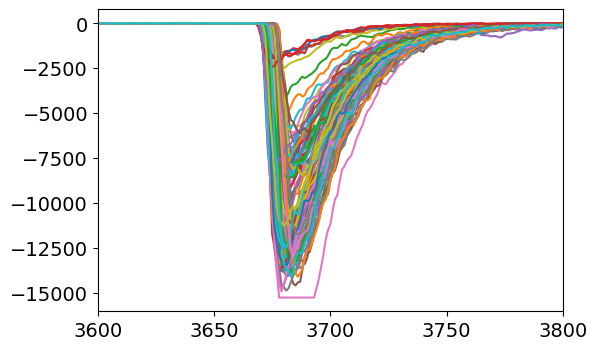

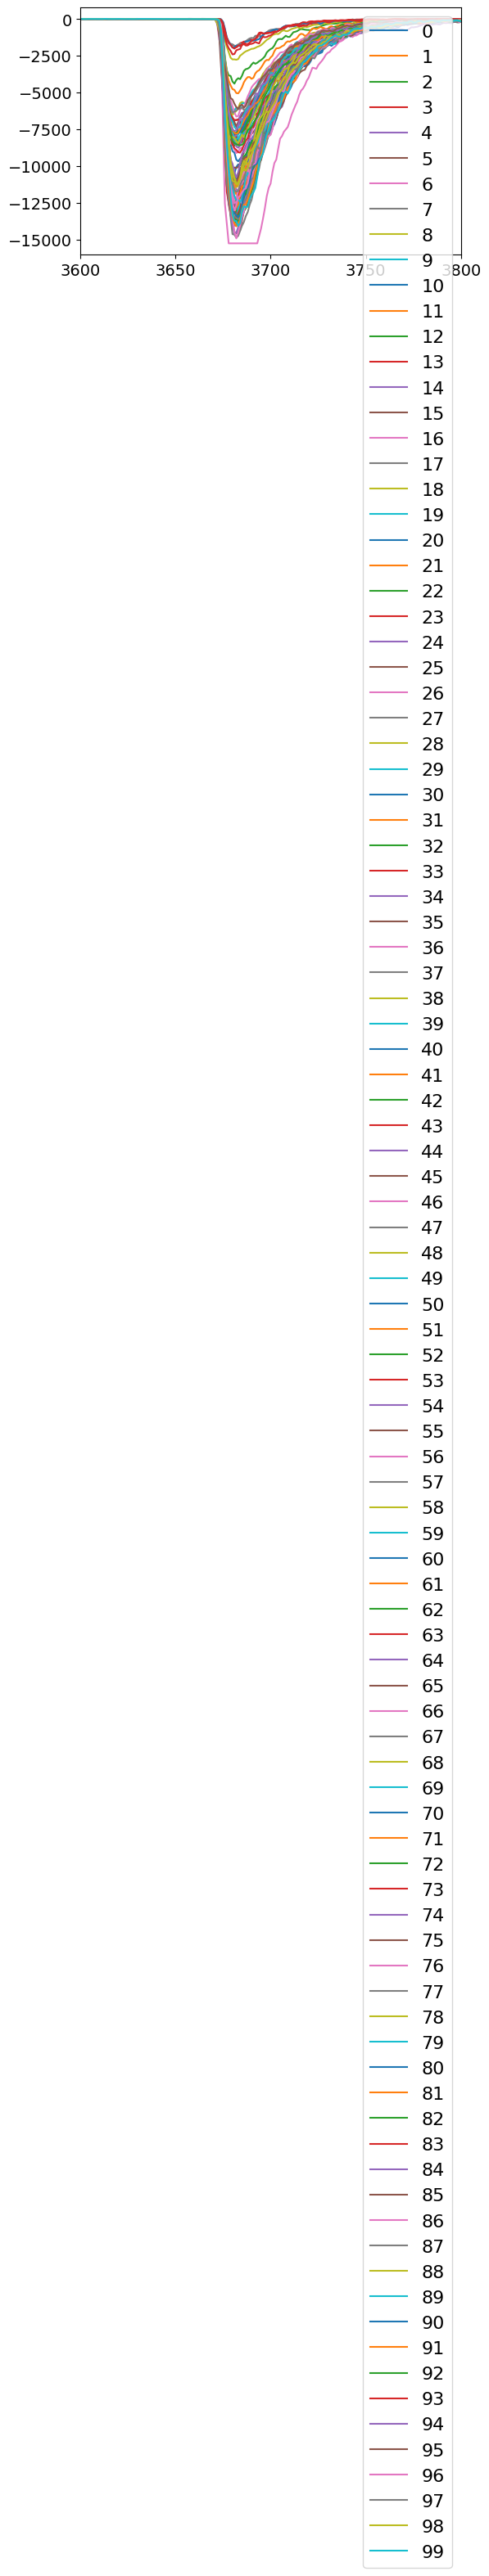

peak memory: 4507.88 MiB, increment: 0.34 MiB


In [14]:
%%memit
j = random.sample(m, 100)
tem_arr = []
for n in range(len(j)):    
    wavenum = pure.waveform_number_PS_FT[j][n]-1
#     print(pure.t0pil_Had_PS_FT[j][n]*fs,  pure.amppil_Had_PS_FT[j][n],   pure.chi2pil_Had_PS_FT[j][n]/1e7)
#     print(pure.rundata_PS_FT[j][n].decode('utf-8'))
    if pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:20]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif pure.rundata_PS_FT[j][n].decode('utf-8')[14:19] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:19]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+pure.rundata_PS_FT[j][n].decode('utf-8')[14:25]+'/'
        chunks = pd.read_csv(infolder+pure.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T

    try: tem_arr = np.append(tem_arr, trace_3, axis = 0)
    except: tem_arr = trace_3
#     print(tem_arr.shape)
amp, t0, chi2 = OF_calct0(signal = tem_arr, 
                    template_norm = TemplateEM_p, 
                    psd_noise =np.load('./saved_outputs/psd_noise_pure.npy')[1], 
                    fs=1/2e-9,  
                    recordlength=15000)
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.show()
for i in range(len(tem_arr)):  
    tem_arr[i] = np.roll(tem_arr[i], int(t0[i]*1/2e-9)*-1)
    
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.legend()
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


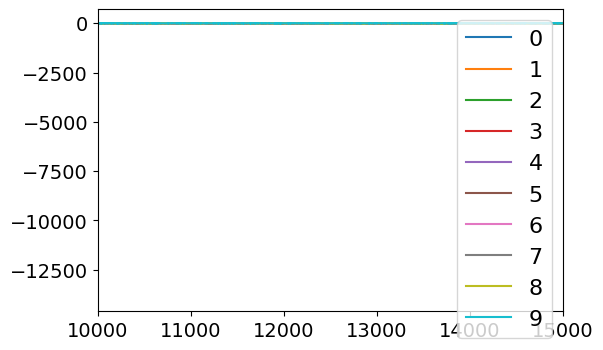

10


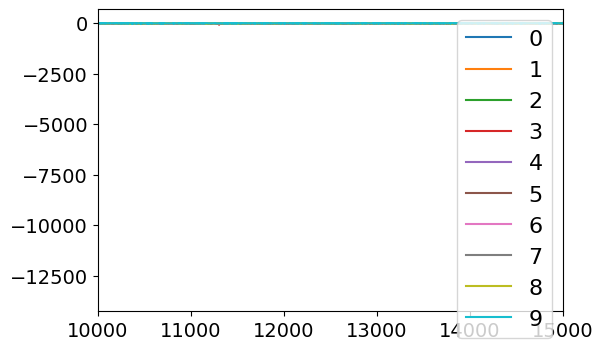

20


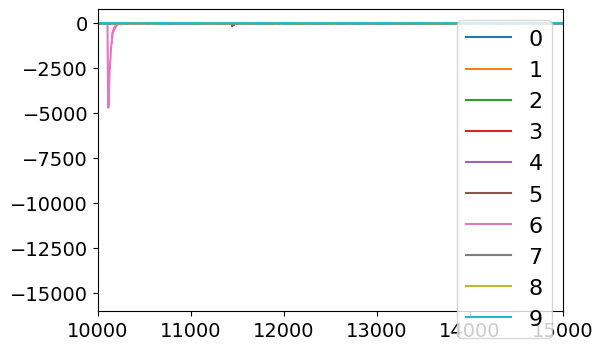

30


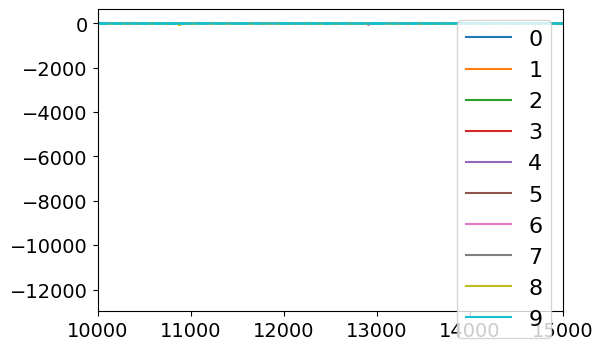

40


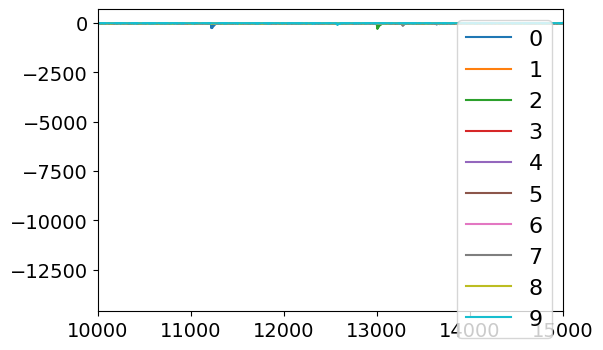

50


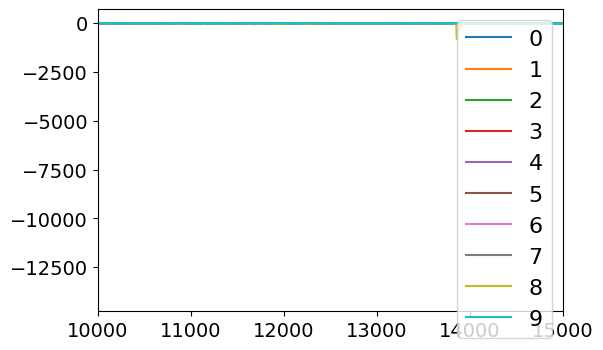

60


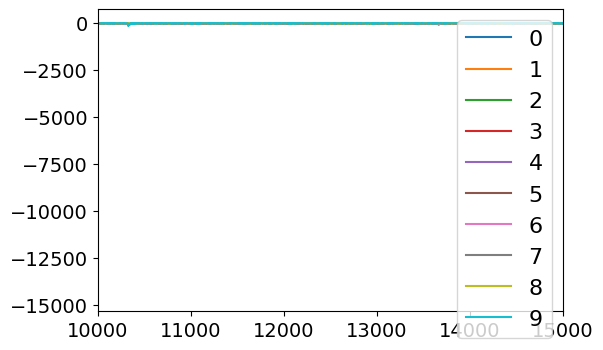

70


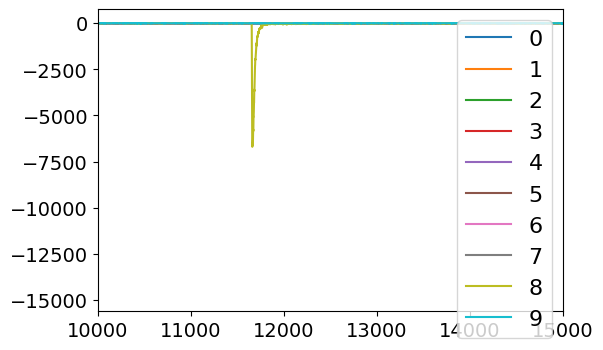

80


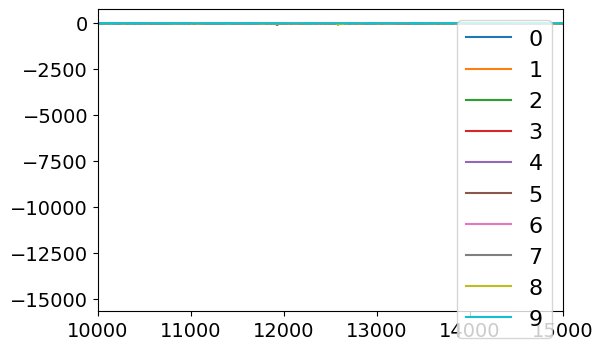

90


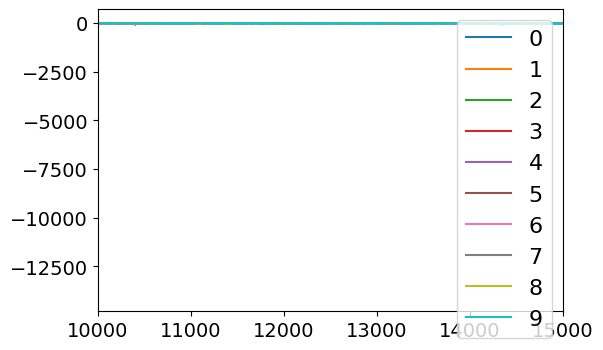

In [29]:
for n in np.arange(0,100,10):
    print(n)
    for i, x in enumerate(tem_arr[n:n+10]):
        plt.plot(range(15000), x, label = i)
        plt.xlim(10000,15000)
        plt.legend()
    plt.show()

In [31]:
re = [26,58,34,31,48,58,61,91,1, 7, 29, 30, 47, 83, 26, 42, 58, 78]
print(len(re), len(set(re)))

18 15


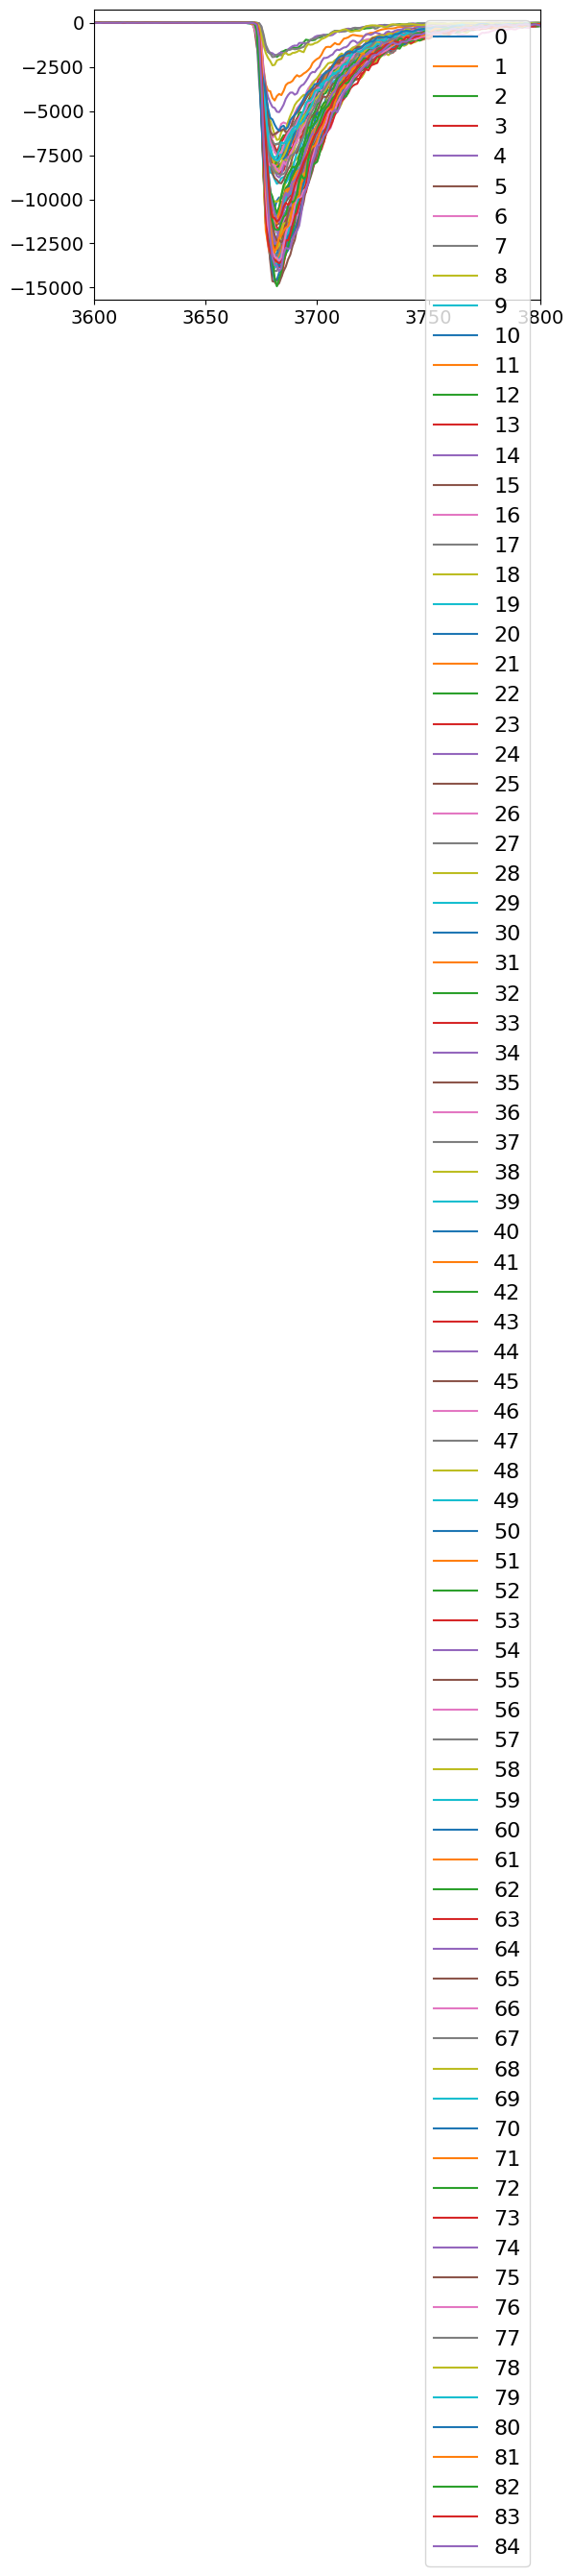

In [33]:


t = np.delete(tem_arr, list(set(re)), axis = 0)
for i, x in enumerate(t):
    plt.plot(range(15000), x, label = i)
    plt.xlim(3600,3800)
plt.legend()
plt.show()

In [44]:
np.save('templates/pure_neutron_all_amplitude_pulses_normalized.npy', tt)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
tt = t
for i, x in enumerate(tt):
    tt[i] = -x/min(x)

In [38]:
te, Te = create_template(tt)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3650.0, 3750.0)

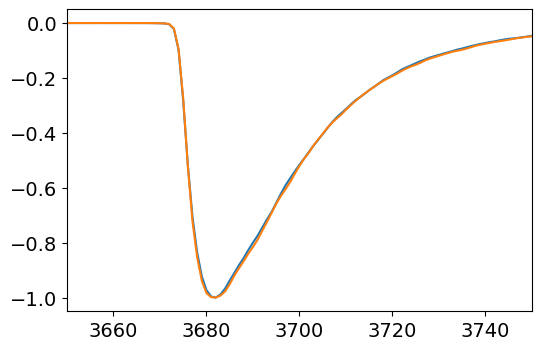

In [43]:
plt.plot(Te)
plt.plot(TemplateHAD_p)
plt.xlim(3650,3750)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3650.0, 3750.0)

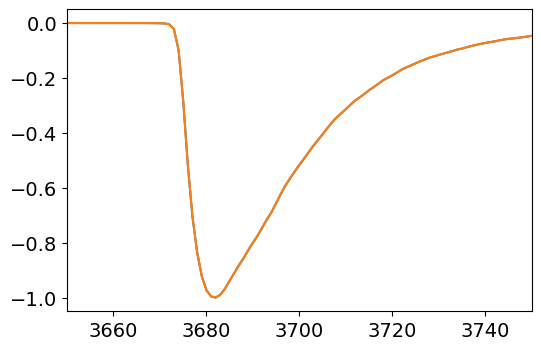

In [48]:
plt.plot(np.load('templates/pure_neutron_all_amplitude_template_normalized.npy'))
plt.plot(Te)
plt.xlim(3650,3750)